<a href="https://colab.research.google.com/github/StickMonkey615/JHCSMod4/blob/main/ANN%20v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Guidance

This notebook is a template for module 4b and 4c, which will be tested in Google Colab, your code needs to run there.
The structure has been provided to improve consistency and make it easier for markers to understand your code but still give students the flexibility to be creative.  You need to populate the required functions to solve this problem.  All dependencies should be documented in the next cell.

You can:
    add further cells or text blocks to extend or further explain your solution
    add further functions

Dont:
    rename functions
   

In [1]:
# Fixed dependencies - do not remove or change.
import pytest
import pandas as pd
import numpy as np
from google.colab import drive
# drive.mount('/content/gdrive/')
# Import your dependencies
!pip install --upgrade xlrd > 1.2.0
import xlrd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
import keras
!pip install keras-tuner --upgrade
import keras_tuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import data

def import_local_data(file_path):
    """This function needs to import the data file into collab and return a pandas dataframe
    """
    raw_df = pd.read_excel(file_path)
    return raw_df

In [3]:
local_file_path = "breast-cancer.xls"

In [4]:
# Dont change
raw_data = import_local_data(local_file_path)

### Conduct exploratory data analysis and explain your key findings - Examine the data, explain its key features and what they look like.  Highlight any fields that are anomalous.

In [5]:
# Look at the different dataframe column headings
print(raw_data.columns)

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')


In [6]:
# Determine data types for each column
for i in range(0, len(raw_data.columns)):
    print(type(raw_data.values[1][i]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [7]:
#Look at the range of values for each field
from collections import Counter
rng_vals=[]
for i in range(0,len(raw_data.columns)):
    rng_vals.append(Counter(raw_data.iloc[:,i].values))
    print(f"{raw_data.columns[i]}: {rng_vals[i]}")
del rng_vals, i

age: Counter({'50-59': 96, '40-49': 90, '60-69': 57, '30-39': 36, '70-79': 6, '20-29': 1})
menopause: Counter({'premeno': 150, 'ge40': 129, 'lt40': 7})
tumor-size: Counter({'30-34': 60, '25-29': 54, '20-24': 50, '15-19': 30, datetime.datetime(2014, 10, 1, 0, 0): 28, '40-44': 22, '35-39': 19, '0-4': 8, '50-54': 8, datetime.datetime(2019, 9, 5, 0, 0): 4, '45-49': 3})
inv-nodes: Counter({'0-2': 213, datetime.datetime(2019, 5, 3, 0, 0): 36, datetime.datetime(2019, 8, 6, 0, 0): 17, datetime.datetime(2019, 11, 9, 0, 0): 10, '15-17': 6, datetime.datetime(2014, 12, 1, 0, 0): 3, '24-26': 1})
node-caps: Counter({'no': 222, 'yes': 56, '?': 8})
deg-malig: Counter({2: 130, 3: 85, 1: 71})
breast: Counter({'left': 152, 'right': 134})
breast-quad: Counter({'left_low': 110, 'left_up': 97, 'right_up': 33, 'right_low': 24, 'central': 21, '?': 1})
irradiat: Counter({'no': 218, 'yes': 68})
Class: Counter({'no-recurrence-events': 201, 'recurrence-events': 85})


**All fields look to contain data that is catagorical in nature.**

**Some contain data that appears erroneous:**
 
*   **'tumor-size' and 'inv-nodes' appear to contain some data in a datetime format and some in string.**
*   **'node-caps' and 'breast-quad' contain Question Marks.**

**Need a way to address these erroneous data inputs.**



In [8]:
# Look in more detail at the columns with datetime data.
print(raw_data.iloc[:, 2].values)

['15-19' '15-19' '35-39' '35-39' '30-34' '25-29' '40-44'
 datetime.datetime(2014, 10, 1, 0, 0) '0-4' '40-44' '25-29' '15-19'
 '30-34' '25-29' '25-29' '20-24' datetime.datetime(2014, 10, 1, 0, 0)
 '15-19' '40-44' '20-24' '20-24' '40-44' '15-19'
 datetime.datetime(2014, 10, 1, 0, 0) '15-19' '20-24'
 datetime.datetime(2014, 10, 1, 0, 0) datetime.datetime(2014, 10, 1, 0, 0)
 '30-34' '15-19' '30-34' '25-29' '25-29' '20-24' '30-34' '15-19'
 datetime.datetime(2014, 10, 1, 0, 0) '45-49' '20-24'
 datetime.datetime(2014, 10, 1, 0, 0) '35-39' '35-39' '25-29' '20-24'
 '15-19' '30-34' datetime.datetime(2014, 10, 1, 0, 0) '35-39' '50-54'
 '40-44' '15-19' '30-34' '0-4' '40-44' '25-29' '25-29' '20-24' '35-39'
 '50-54' '0-4' '40-44' '30-34' '20-24' '30-34' '20-24' '15-19' '25-29'
 '15-19' '50-54' datetime.datetime(2014, 10, 1, 0, 0) '25-29' '25-29'
 datetime.datetime(2014, 10, 1, 0, 0) '30-34' '25-29'
 datetime.datetime(2014, 10, 1, 0, 0) '15-19' '25-29' '25-29' '30-34'
 '15-19' '25-29' '30-34' '15-19'

In [9]:
# Look at output data
raw_data['Class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

Only 2 possible outputs, thus needs converting to binary format for use in classifier models.

In [10]:
# Check output balance
out = raw_data.iloc[:, -1].values
no_rows = len(raw_data)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
code_rows = le.fit_transform(out)
print("True outputs: {:.2f} %".format(sum(code_rows)/len(raw_data)*100))
pos = sum(code_rows)
neg = len(raw_data)-sum(code_rows)
del out, no_rows, le, code_rows

True outputs: 29.72 %


Clear imbalance between output data. Some degree of bias/weighting/sampling will be required to ensure that results accurately predict outcomes for both True and False outcomes.

In [11]:
# Explain your key findings

**Data set is made up of 9 independent variables all of which appear catagorical in nature. Although stored as an integer, 'deg-malig' can be viewed as  catagorical data as it can only contain 3 discrete values.**

**The inclusion of datetime data entries in both the 'tumor-size' and 'inv-nodes' fields appears to be caused by a formatting entry within Excel. For example, '10-14' being input erroneously as 10/14 thus Excel has interpreted (and converted) it to the datetime field 01/10/2014. A function will need to be written within the model to convert these back to correct format.**

**How to deal with '?' entries in fields that are otherwise boolean poses an interesting dilemma. If these are infact meant to signify that the presence is unknown because no diagnostic work has been conducted, then this woiuld signify a valid dat entry. If it is however just an incomplete data entry then there is a risk its inclusion could skew the model results. Without knowing which it seems wisest to remove this data from the dataset. Removal of the entire field could well deprive the model of important information, thus just removing these specific entries (rows) appears the most sensible option, particularly noting that there are relatively few occurences.**

**Data set is imbalanced, with dependent variable outputs only True in 30% of instances. The model applied will require this imbalance to be taken into account so as not to sacrifice results predicting this smaller class (surely the aim of cancer diagnosis) so as to achieve a high accuracy figure.**

**Output variable will need converting into binary output for use with a binary classification model.**

Create any data pre-processing that you will conduct on seen and unseen data.  Regardless of the model you use, this dataframe must contain only numeric features and have a strategy for any expected missing values. Any objects can that are needed to handle the test data that are dependent on the training data can be stored in the model class.  You are recommended to use sklearn Pipelines or similar functionality to ensure reproducibility.

In [12]:
# Correct date types in 'tumor-size' and 'inv-nodes' variables
for i in range(0, len(raw_data)):
    if type(raw_data['tumor-size'][i]) is not str:
        if raw_data['tumor-size'][i].day == 1:
            raw_data['tumor-size'][i] = str(raw_data['tumor-size'][i].month) +'-' + str(raw_data['tumor-size'][i].year-2000)
        else:
            raw_data['tumor-size'][i] = str(raw_data['tumor-size'][i].day) + '-' + str(raw_data['tumor-size'][i].month)
    if type(raw_data['inv-nodes'][i]) is not str:
        if raw_data['inv-nodes'][i].day == 1:
            raw_data['inv-nodes'][i] = str(raw_data['inv-nodes'][i].month) + '-' + str(raw_data['inv-nodes'][i].year-2000)
        else:
            raw_data['inv-nodes'][i] = str(raw_data['inv-nodes'][i].day) + '-' + str(raw_data['inv-nodes'][i].month)        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Settin

In [13]:
# Remove all rows containing ? data
indx = raw_data[raw_data.isin(['?'])].stack(dropna=True).unstack().index
print(f"indx: {indx}")
raw_data = raw_data.drop(index=indx)

indx: Int64Index([20, 31, 50, 54, 71, 92, 149, 240, 264], dtype='int64')


In [14]:
# Split your data so that you can test the effectiveness of your model
# Split the data into a Training set and a Test set
dfs = np.split(raw_data, [len(raw_data.columns)-1], axis=1)
X = dfs[0]
y = dfs[1]

# Handle categorical values and drop dummy variable
# Remove non-categorical data
dm = X.pop('deg-malig')
# Encode the catagorical data (dummy variables)
proc_X = pd.get_dummies(data=X, prefix_sep='_', drop_first=True)
# Add back in non-categorical data
proc_X.insert(0, 'deg-malig', dm)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(proc_X, y, test_size = 0.25, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [15]:
# Calculate class weights
weight_0 = (1 / neg) * ((pos + neg) / 2)
weight_1 = (1 / pos) * ((pos + neg) / 2)
class_weight = {0: weight_0, 1: weight_1}
print(f"Weight for 0: {weight_0}")
print(f"Weight for 1: {weight_1}")

Weight for 0: 0.7114427860696517
Weight for 1: 1.6823529411764706


In [16]:
# Populate preprocess_training_data and preprocess_test_data to preprocess data.
# You must process test and train separately so your model does not accidently gain information that a model wouldnt have in reality and therefore get better predictions

In [17]:
class Module4_Model:
    
    def __init__(self):
        self.model = None
        self.metrics = [
            keras.metrics.TruePositives(name='tp'),
            keras.metrics.FalsePositives(name='fp'),
            keras.metrics.TrueNegatives(name='tn'),
            keras.metrics.FalseNegatives(name='fn'),
            keras.metrics.BinaryAccuracy(name='accuracy'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.Precision(name='precision'),
        ]
        self.EPOCHS = 500
        self.BATCH = 100
        self.THR = 0.3
        self.stop_crit = keras.callbacks.EarlyStopping(
            monitor='val_prc',
            verbose=1,
            patience=10,
            mode='max',
            restore_best_weights=True)

    def preprocess_training_data(self, training_df):
        """
        This function should process the training data and store any features
        required in the class
        """         
        # Apply feature scaling
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        processed_df = sc.fit_transform(training_df)
        return processed_df, sc

    def preprocess_test_data(self, test_df):
        """
        This function should process the test data and store any features
        required in the class
        """
        # Apply feature scaling
        processed_df = self.scalar.transform(test_df)
        return processed_df

    def make_model(self,hp,output_bias=class_weight):
        #msle = MeanSquaredLogarithmicError()
        model = keras.Sequential()

        if output_bias is not None:
            output_bias = keras.initializers.Constant(output_bias)
        # Tune the number of units in each layer
        hp_units1 = hp.Int('units1',min_value=32,max_value=512,step=32)
        hp_units2 = hp.Int('units2',min_value=32,max_value=512,step=32)
        hp_units3 = hp.Int('units3',min_value=32,max_value=512,step=32)

        #self.model = keras.Sequential()
        model.add(Dense(hp_units1,activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(hp_units2,activation='relu'))
        model.add(Dense(hp_units3,activation='relu'))
        model.add(Dense(1,kernel_initializer='normal',activation='sigmoid',bias_initializer=output_bias))
        hp_learning_rate = hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])

        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss=msle,
            metrics=self.metrics)
        
        return model


In [18]:
# Dont change
my_model = Module4_Model()

In [19]:
# Dont change
x_train_processed, my_model.scalar = my_model.preprocess_training_data(X_train)
x_val_processed = my_model.preprocess_test_data(X_val)

In [20]:
# Encode the output data
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = pd.DataFrame(lb.fit_transform(y_train))
y_val = pd.DataFrame(lb.transform(y_val))
y_test = pd.DataFrame(lb.transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
# Create a model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,ELU,PReLU,Dropout
from keras.losses import MeanSquaredLogarithmicError
msle = MeanSquaredLogarithmicError()

#classifier = Sequential()
#first hidden layer
#classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=31))
#second hidden layer
#classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
#classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [22]:
#classifier.summary()

In [23]:
#compiling the ANN
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#my_model.make_model(x_train_processed,np.log([pos/neg]))
#my_model.model.summary()

In [24]:
# Utilise HyperBand algorithm from keras tuner to construct model
tuner = kt.Hyperband(
    my_model.make_model,
    objective='val_loss',
    max_epochs=10,
    directory='keras_tuner_dir',
    project_name='keras_tuner'
)
tuner.search(x_train_processed,y_train,epochs=10,validation_split=0.2)

In [25]:
# Dont change
x_test_processed = my_model.preprocess_test_data(X_test)

In [26]:
for h_param in [f"units{i}" for i in range(1,4)] + ['learning_rate']:
    print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))

units1 224
units2 448
units3 64
learning_rate 0.01


In [27]:
my_model.best_model = tuner.get_best_models()[0]
my_model.best_model.build(x_train_processed.shape)
my_model.best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (165, 224)                7168      
                                                                 
 dropout (Dropout)           (165, 224)                0         
                                                                 
 dense_1 (Dense)             (165, 448)                100800    
                                                                 
 dense_2 (Dense)             (165, 64)                 28736     
                                                                 
 dense_3 (Dense)             (165, 1)                  65        
                                                                 
Total params: 136,769
Trainable params: 136,769
Non-trainable params: 0
_________________________________________________________________


In [28]:
my_model.best_model.fit(
    x_train_processed,
    y_train,
    epochs=10,
    batch_size=64
)

Epoch 1/10
3/3 [==============================] - 2s 9ms/step - loss: 0.1188 - tp: 6.0000 - fp: 13.0000 - tn: 105.0000 - fn: 41.0000 - accuracy: 0.6727 - recall: 0.1277 - precision: 0.3158
Epoch 2/10
3/3 [==============================] - 0s 7ms/step - loss: 0.0989 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 118.0000 - fn: 47.0000 - accuracy: 0.7152 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 7ms/step - loss: 0.0847 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 118.0000 - fn: 47.0000 - accuracy: 0.7152 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 8ms/step - loss: 0.0751 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 118.0000 - fn: 47.0000 - accuracy: 0.7152 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 7ms/step - loss: 0.0665 - tp: 1.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 46.0000 - accuracy: 0.7212 - recall: 0.0213 - precision: 1.0000       


In [29]:
# Train your model
# Fitting the ANN to the training set
my_model.best_model.fit(x_train_processed,
                   y_train,
                   batch_size=my_model.BATCH,
                   epochs=my_model.EPOCHS,
                   callbacks=[my_model.stop_crit],
                   validation_data=(x_val_processed,y_val))

Epoch 1/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0374 - tp: 23.0000 - fp: 6.0000 - tn: 67.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8519 - precision: 0.7931

2/2 [==============================] - 1s 1s/step - loss: 0.0332 - tp: 42.0000 - fp: 9.0000 - tn: 109.0000 - fn: 5.0000 - accuracy: 0.9152 - recall: 0.8936 - precision: 0.8235 - val_loss: 0.1481 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0260 - tp: 21.0000 - fp: 4.0000 - tn: 70.0000 - fn: 5.0000 - accuracy: 0.9100 - recall: 0.8077 - precision: 0.8400

2/2 [==============================] - 0s 64ms/step - loss: 0.0220 - tp: 40.0000 - fp: 4.0000 - tn: 114.0000 - fn: 7.0000 - accuracy: 0.9333 - recall: 0.8511 - precision: 0.9091 - val_loss: 0.1428 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0316 - tp: 22.0000 - fp: 1.0000 - tn: 68.0000 - fn: 9.0000 - accuracy: 0.9000 - recall: 0.7097 - precision: 0.9565

2/2 [==============================] - 0s 105ms/step - loss: 0.0317 - tp: 34.0000 - fp: 4.0000 - tn: 114.0000 - fn: 13.0000 - accuracy: 0.8970 - recall: 0.7234 - precision: 0.8947 - val_loss: 0.1502 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0378 - tp: 22.0000 - fp: 7.0000 - tn: 65.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7857 - precision: 0.7586

2/2 [==============================] - 0s 58ms/step - loss: 0.0401 - tp: 35.0000 - fp: 10.0000 - tn: 108.0000 - fn: 12.0000 - accuracy: 0.8667 - recall: 0.7447 - precision: 0.7778 - val_loss: 0.1571 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 5/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0399 - tp: 27.0000 - fp: 6.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8710 - precision: 0.8182

2/2 [==============================] - 0s 105ms/step - loss: 0.0333 - tp: 43.0000 - fp: 9.0000 - tn: 109.0000 - fn: 4.0000 - accuracy: 0.9212 - recall: 0.9149 - precision: 0.8269 - val_loss: 0.1456 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0331 - tp: 27.0000 - fp: 4.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.9200 - recall: 0.8710 - precision: 0.8710

2/2 [==============================] - 0s 59ms/step - loss: 0.0440 - tp: 38.0000 - fp: 11.0000 - tn: 107.0000 - fn: 9.0000 - accuracy: 0.8788 - recall: 0.8085 - precision: 0.7755 - val_loss: 0.1417 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 7/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0373 - tp: 20.0000 - fp: 5.0000 - tn: 69.0000 - fn: 6.0000 - accuracy: 0.8900 - recall: 0.7692 - precision: 0.8000

2/2 [==============================] - 0s 47ms/step - loss: 0.0379 - tp: 35.0000 - fp: 6.0000 - tn: 112.0000 - fn: 12.0000 - accuracy: 0.8909 - recall: 0.7447 - precision: 0.8537 - val_loss: 0.1496 - val_tp: 3.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 12.0000 - val_accuracy: 0.6190 - val_recall: 0.2000 - val_precision: 0.4286
Epoch 8/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0264 - tp: 20.0000 - fp: 1.0000 - tn: 72.0000 - fn: 7.0000 - accuracy: 0.9200 - recall: 0.7407 - precision: 0.9524

2/2 [==============================] - 0s 50ms/step - loss: 0.0291 - tp: 35.0000 - fp: 2.0000 - tn: 116.0000 - fn: 12.0000 - accuracy: 0.9152 - recall: 0.7447 - precision: 0.9459 - val_loss: 0.1472 - val_tp: 3.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 12.0000 - val_accuracy: 0.6190 - val_recall: 0.2000 - val_precision: 0.4286
Epoch 9/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0339 - tp: 19.0000 - fp: 3.0000 - tn: 71.0000 - fn: 7.0000 - accuracy: 0.9000 - recall: 0.7308 - precision: 0.8636

2/2 [==============================] - 0s 50ms/step - loss: 0.0296 - tp: 36.0000 - fp: 3.0000 - tn: 115.0000 - fn: 11.0000 - accuracy: 0.9152 - recall: 0.7660 - precision: 0.9231 - val_loss: 0.1483 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 10/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0231 - tp: 16.0000 - fp: 5.0000 - tn: 77.0000 - fn: 2.0000 - accuracy: 0.9300 - recall: 0.8889 - precision: 0.7619

2/2 [==============================] - 0s 79ms/step - loss: 0.0257 - tp: 44.0000 - fp: 9.0000 - tn: 109.0000 - fn: 3.0000 - accuracy: 0.9273 - recall: 0.9362 - precision: 0.8302 - val_loss: 0.1557 - val_tp: 8.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 7.0000 - val_accuracy: 0.6667 - val_recall: 0.5333 - val_precision: 0.5333
Epoch 11/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0305 - tp: 26.0000 - fp: 5.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9300 - recall: 0.9286 - precision: 0.8387

2/2 [==============================] - 0s 49ms/step - loss: 0.0334 - tp: 42.0000 - fp: 11.0000 - tn: 107.0000 - fn: 5.0000 - accuracy: 0.9030 - recall: 0.8936 - precision: 0.7925 - val_loss: 0.1510 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 12/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0225 - tp: 29.0000 - fp: 5.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9667 - precision: 0.8529

2/2 [==============================] - 0s 60ms/step - loss: 0.0211 - tp: 45.0000 - fp: 8.0000 - tn: 110.0000 - fn: 2.0000 - accuracy: 0.9394 - recall: 0.9574 - precision: 0.8491 - val_loss: 0.1313 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 13/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0204 - tp: 23.0000 - fp: 2.0000 - tn: 72.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.8846 - precision: 0.9200

2/2 [==============================] - 0s 70ms/step - loss: 0.0189 - tp: 42.0000 - fp: 3.0000 - tn: 115.0000 - fn: 5.0000 - accuracy: 0.9515 - recall: 0.8936 - precision: 0.9333 - val_loss: 0.1232 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 14/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0409 - tp: 19.0000 - fp: 5.0000 - tn: 70.0000 - fn: 6.0000 - accuracy: 0.8900 - recall: 0.7600 - precision: 0.7917

2/2 [==============================] - 0s 71ms/step - loss: 0.0364 - tp: 35.0000 - fp: 6.0000 - tn: 112.0000 - fn: 12.0000 - accuracy: 0.8909 - recall: 0.7447 - precision: 0.8537 - val_loss: 0.1210 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 15/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0300 - tp: 21.0000 - fp: 3.0000 - tn: 67.0000 - fn: 9.0000 - accuracy: 0.8800 - recall: 0.7000 - precision: 0.8750

2/2 [==============================] - 0s 69ms/step - loss: 0.0230 - tp: 35.0000 - fp: 3.0000 - tn: 115.0000 - fn: 12.0000 - accuracy: 0.9091 - recall: 0.7447 - precision: 0.9211 - val_loss: 0.1222 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 16/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0269 - tp: 23.0000 - fp: 3.0000 - tn: 70.0000 - fn: 4.0000 - accuracy: 0.9300 - recall: 0.8519 - precision: 0.8846

2/2 [==============================] - 0s 68ms/step - loss: 0.0206 - tp: 42.0000 - fp: 3.0000 - tn: 115.0000 - fn: 5.0000 - accuracy: 0.9515 - recall: 0.8936 - precision: 0.9333 - val_loss: 0.1235 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 17/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0230 - tp: 19.0000 - fp: 1.0000 - tn: 76.0000 - fn: 4.0000 - accuracy: 0.9500 - recall: 0.8261 - precision: 0.9500

2/2 [==============================] - 0s 110ms/step - loss: 0.0210 - tp: 42.0000 - fp: 2.0000 - tn: 116.0000 - fn: 5.0000 - accuracy: 0.9576 - recall: 0.8936 - precision: 0.9545 - val_loss: 0.1266 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 18/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0166 - tp: 24.0000 - fp: 3.0000 - tn: 69.0000 - fn: 4.0000 - accuracy: 0.9300 - recall: 0.8571 - precision: 0.8889

2/2 [==============================] - 0s 78ms/step - loss: 0.0179 - tp: 42.0000 - fp: 4.0000 - tn: 114.0000 - fn: 5.0000 - accuracy: 0.9455 - recall: 0.8936 - precision: 0.9130 - val_loss: 0.1297 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 19/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0157 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 60ms/step - loss: 0.0210 - tp: 42.0000 - fp: 5.0000 - tn: 113.0000 - fn: 5.0000 - accuracy: 0.9394 - recall: 0.8936 - precision: 0.8936 - val_loss: 0.1334 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 20/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0073 - tp: 23.0000 - fp: 0.0000e+00 - tn: 76.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9583 - precision: 1.0000

2/2 [==============================] - 0s 70ms/step - loss: 0.0099 - tp: 45.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 2.0000 - accuracy: 0.9879 - recall: 0.9574 - precision: 1.0000 - val_loss: 0.1380 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 21/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0246 - tp: 20.0000 - fp: 3.0000 - tn: 72.0000 - fn: 5.0000 - accuracy: 0.9200 - recall: 0.8000 - precision: 0.8696

2/2 [==============================] - 0s 64ms/step - loss: 0.0205 - tp: 41.0000 - fp: 4.0000 - tn: 114.0000 - fn: 6.0000 - accuracy: 0.9394 - recall: 0.8723 - precision: 0.9111 - val_loss: 0.1415 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 22/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0127 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 52ms/step - loss: 0.0123 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1453 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 23/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0109 - tp: 25.0000 - fp: 1.0000 - tn: 72.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9259 - precision: 0.9615

2/2 [==============================] - 0s 65ms/step - loss: 0.0135 - tp: 41.0000 - fp: 1.0000 - tn: 117.0000 - fn: 6.0000 - accuracy: 0.9576 - recall: 0.8723 - precision: 0.9762 - val_loss: 0.1466 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 24/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0155 - tp: 27.0000 - fp: 2.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.9000 - precision: 0.9310

2/2 [==============================] - 0s 57ms/step - loss: 0.0181 - tp: 43.0000 - fp: 5.0000 - tn: 113.0000 - fn: 4.0000 - accuracy: 0.9455 - recall: 0.9149 - precision: 0.8958 - val_loss: 0.1432 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 25/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0262 - tp: 24.0000 - fp: 5.0000 - tn: 67.0000 - fn: 4.0000 - accuracy: 0.9100 - recall: 0.8571 - precision: 0.8276

2/2 [==============================] - 0s 52ms/step - loss: 0.0187 - tp: 43.0000 - fp: 6.0000 - tn: 112.0000 - fn: 4.0000 - accuracy: 0.9394 - recall: 0.9149 - precision: 0.8776 - val_loss: 0.1388 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 26/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0097 - tp: 21.0000 - fp: 1.0000 - tn: 77.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9545 - precision: 0.9545

2/2 [==============================] - 0s 61ms/step - loss: 0.0111 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1354 - val_tp: 5.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 10.0000 - val_accuracy: 0.6905 - val_recall: 0.3333 - val_precision: 0.6250
Epoch 27/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0126 - tp: 24.0000 - fp: 2.0000 - tn: 72.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9231 - precision: 0.9231

2/2 [==============================] - 0s 97ms/step - loss: 0.0145 - tp: 40.0000 - fp: 2.0000 - tn: 116.0000 - fn: 7.0000 - accuracy: 0.9455 - recall: 0.8511 - precision: 0.9524 - val_loss: 0.1324 - val_tp: 5.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 10.0000 - val_accuracy: 0.6905 - val_recall: 0.3333 - val_precision: 0.6250
Epoch 28/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0093 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 85ms/step - loss: 0.0095 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1301 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 29/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0178 - tp: 24.0000 - fp: 3.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9600 - precision: 0.8889

2/2 [==============================] - 0s 155ms/step - loss: 0.0175 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1275 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 30/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0135 - tp: 28.0000 - fp: 3.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9655 - precision: 0.9032

2/2 [==============================] - 0s 76ms/step - loss: 0.0096 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1257 - val_tp: 6.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 9.0000 - val_accuracy: 0.7143 - val_recall: 0.4000 - val_precision: 0.6667
Epoch 31/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0147 - tp: 25.0000 - fp: 2.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9259 - precision: 0.9259

2/2 [==============================] - 0s 61ms/step - loss: 0.0107 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1272 - val_tp: 6.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 9.0000 - val_accuracy: 0.7143 - val_recall: 0.4000 - val_precision: 0.6667
Epoch 32/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0180 - tp: 25.0000 - fp: 1.0000 - tn: 69.0000 - fn: 5.0000 - accuracy: 0.9400 - recall: 0.8333 - precision: 0.9615

2/2 [==============================] - 0s 141ms/step - loss: 0.0136 - tp: 39.0000 - fp: 1.0000 - tn: 117.0000 - fn: 8.0000 - accuracy: 0.9455 - recall: 0.8298 - precision: 0.9750 - val_loss: 0.1295 - val_tp: 6.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 9.0000 - val_accuracy: 0.7143 - val_recall: 0.4000 - val_precision: 0.6667
Epoch 33/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0204 - tp: 23.0000 - fp: 2.0000 - tn: 72.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.8846 - precision: 0.9200

2/2 [==============================] - 0s 66ms/step - loss: 0.0165 - tp: 43.0000 - fp: 3.0000 - tn: 115.0000 - fn: 4.0000 - accuracy: 0.9576 - recall: 0.9149 - precision: 0.9348 - val_loss: 0.1339 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 34/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0140 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 104ms/step - loss: 0.0139 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1380 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 35/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0167 - tp: 26.0000 - fp: 4.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8667

2/2 [==============================] - 0s 77ms/step - loss: 0.0145 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1438 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 36/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0109 - tp: 27.0000 - fp: 2.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9643 - precision: 0.9310

2/2 [==============================] - 0s 65ms/step - loss: 0.0103 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1507 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 37/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - tp: 26.0000 - fp: 1.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9630

2/2 [==============================] - 0s 62ms/step - loss: 0.0103 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1513 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 38/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0185 - tp: 27.0000 - fp: 3.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9310 - precision: 0.9000

2/2 [==============================] - 0s 95ms/step - loss: 0.0163 - tp: 42.0000 - fp: 3.0000 - tn: 115.0000 - fn: 5.0000 - accuracy: 0.9515 - recall: 0.8936 - precision: 0.9333 - val_loss: 0.1475 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 39/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0152 - tp: 23.0000 - fp: 1.0000 - tn: 72.0000 - fn: 4.0000 - accuracy: 0.9500 - recall: 0.8519 - precision: 0.9583

2/2 [==============================] - 0s 83ms/step - loss: 0.0124 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1425 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 40/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0125 - tp: 27.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.9000 - precision: 1.0000

2/2 [==============================] - 0s 94ms/step - loss: 0.0150 - tp: 42.0000 - fp: 1.0000 - tn: 117.0000 - fn: 5.0000 - accuracy: 0.9636 - recall: 0.8936 - precision: 0.9767 - val_loss: 0.1397 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 41/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0095 - tp: 31.0000 - fp: 1.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9394 - precision: 0.9688

2/2 [==============================] - 0s 63ms/step - loss: 0.0105 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1398 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 42/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0092 - tp: 26.0000 - fp: 1.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9630 - precision: 0.9630

2/2 [==============================] - 0s 78ms/step - loss: 0.0106 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1406 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 43/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0175 - tp: 24.0000 - fp: 2.0000 - tn: 71.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.8889 - precision: 0.9231

2/2 [==============================] - 0s 92ms/step - loss: 0.0133 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1411 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 44/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0124 - tp: 24.0000 - fp: 1.0000 - tn: 72.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.8889 - precision: 0.9600

2/2 [==============================] - 0s 113ms/step - loss: 0.0110 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1385 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 45/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0118 - tp: 24.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 4.0000 - accuracy: 0.9600 - recall: 0.8571 - precision: 1.0000

2/2 [==============================] - 0s 60ms/step - loss: 0.0132 - tp: 41.0000 - fp: 1.0000 - tn: 117.0000 - fn: 6.0000 - accuracy: 0.9576 - recall: 0.8723 - precision: 0.9762 - val_loss: 0.1379 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 46/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0112 - tp: 22.0000 - fp: 1.0000 - tn: 72.0000 - fn: 5.0000 - accuracy: 0.9400 - recall: 0.8148 - precision: 0.9565

2/2 [==============================] - 0s 65ms/step - loss: 0.0098 - tp: 41.0000 - fp: 2.0000 - tn: 116.0000 - fn: 6.0000 - accuracy: 0.9515 - recall: 0.8723 - precision: 0.9535 - val_loss: 0.1394 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 47/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - tp: 30.0000 - fp: 2.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9375

2/2 [==============================] - 0s 70ms/step - loss: 0.0064 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1395 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 48/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0160 - tp: 28.0000 - fp: 2.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.9032 - precision: 0.9333

2/2 [==============================] - 0s 56ms/step - loss: 0.0127 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1432 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 49/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087 - tp: 27.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9310 - precision: 1.0000

2/2 [==============================] - 0s 57ms/step - loss: 0.0110 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1463 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 50/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0094 - tp: 27.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.9000 - precision: 1.0000

2/2 [==============================] - 0s 53ms/step - loss: 0.0096 - tp: 42.0000 - fp: 1.0000 - tn: 117.0000 - fn: 5.0000 - accuracy: 0.9636 - recall: 0.8936 - precision: 0.9767 - val_loss: 0.1541 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 51/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 27.0000 - fp: 1.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9643

2/2 [==============================] - 0s 61ms/step - loss: 0.0063 - tp: 47.0000 - fp: 2.0000 - tn: 116.0000 - fn: 0.0000e+00 - accuracy: 0.9879 - recall: 1.0000 - precision: 0.9592 - val_loss: 0.1578 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 52/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0084 - tp: 29.0000 - fp: 1.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9355 - precision: 0.9667

2/2 [==============================] - 0s 66ms/step - loss: 0.0086 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1579 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 53/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0090 - tp: 22.0000 - fp: 1.0000 - tn: 74.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.8800 - precision: 0.9565

2/2 [==============================] - 0s 50ms/step - loss: 0.0115 - tp: 42.0000 - fp: 3.0000 - tn: 115.0000 - fn: 5.0000 - accuracy: 0.9515 - recall: 0.8936 - precision: 0.9333 - val_loss: 0.1584 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 54/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0030 - tp: 30.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0045 - tp: 47.0000 - fp: 1.0000 - tn: 117.0000 - fn: 0.0000e+00 - accuracy: 0.9939 - recall: 1.0000 - precision: 0.9792 - val_loss: 0.1579 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 55/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0154 - tp: 24.0000 - fp: 2.0000 - tn: 71.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.8889 - precision: 0.9231

2/2 [==============================] - 0s 52ms/step - loss: 0.0115 - tp: 43.0000 - fp: 3.0000 - tn: 115.0000 - fn: 4.0000 - accuracy: 0.9576 - recall: 0.9149 - precision: 0.9348 - val_loss: 0.1596 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 56/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0102 - tp: 25.0000 - fp: 2.0000 - tn: 70.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.8929 - precision: 0.9259

2/2 [==============================] - 0s 64ms/step - loss: 0.0107 - tp: 42.0000 - fp: 2.0000 - tn: 116.0000 - fn: 5.0000 - accuracy: 0.9576 - recall: 0.8936 - precision: 0.9545 - val_loss: 0.1491 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 57/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0106 - tp: 27.0000 - fp: 3.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9643 - precision: 0.9000

2/2 [==============================] - 0s 58ms/step - loss: 0.0124 - tp: 42.0000 - fp: 4.0000 - tn: 114.0000 - fn: 5.0000 - accuracy: 0.9455 - recall: 0.8936 - precision: 0.9130 - val_loss: 0.1364 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 58/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0090 - tp: 22.0000 - fp: 0.0000e+00 - tn: 76.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9167 - precision: 1.0000

2/2 [==============================] - 0s 59ms/step - loss: 0.0095 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1321 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 59/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0135 - tp: 25.0000 - fp: 1.0000 - tn: 71.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.8929 - precision: 0.9615

2/2 [==============================] - 0s 175ms/step - loss: 0.0114 - tp: 43.0000 - fp: 3.0000 - tn: 115.0000 - fn: 4.0000 - accuracy: 0.9576 - recall: 0.9149 - precision: 0.9348 - val_loss: 0.1334 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 60/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0116 - tp: 28.0000 - fp: 2.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9333 - precision: 0.9333

2/2 [==============================] - 0s 97ms/step - loss: 0.0151 - tp: 43.0000 - fp: 4.0000 - tn: 114.0000 - fn: 4.0000 - accuracy: 0.9515 - recall: 0.9149 - precision: 0.9149 - val_loss: 0.1365 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 61/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0115 - tp: 25.0000 - fp: 2.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9259 - precision: 0.9259

2/2 [==============================] - 0s 57ms/step - loss: 0.0123 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1357 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 62/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0121 - tp: 33.0000 - fp: 3.0000 - tn: 64.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9167

2/2 [==============================] - 0s 75ms/step - loss: 0.0127 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1329 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 63/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0127 - tp: 26.0000 - fp: 3.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9400 - recall: 0.8966 - precision: 0.8966

2/2 [==============================] - 0s 86ms/step - loss: 0.0094 - tp: 44.0000 - fp: 4.0000 - tn: 114.0000 - fn: 3.0000 - accuracy: 0.9576 - recall: 0.9362 - precision: 0.9167 - val_loss: 0.1329 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 64/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0140 - tp: 27.0000 - fp: 1.0000 - tn: 69.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9000 - precision: 0.9643

2/2 [==============================] - 0s 90ms/step - loss: 0.0130 - tp: 40.0000 - fp: 1.0000 - tn: 117.0000 - fn: 7.0000 - accuracy: 0.9515 - recall: 0.8511 - precision: 0.9756 - val_loss: 0.1491 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 65/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0109 - tp: 27.0000 - fp: 0.0000e+00 - tn: 67.0000 - fn: 6.0000 - accuracy: 0.9400 - recall: 0.8182 - precision: 1.0000

2/2 [==============================] - 0s 70ms/step - loss: 0.0095 - tp: 40.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 7.0000 - accuracy: 0.9576 - recall: 0.8511 - precision: 1.0000 - val_loss: 0.1613 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 66/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0148 - tp: 27.0000 - fp: 1.0000 - tn: 68.0000 - fn: 4.0000 - accuracy: 0.9500 - recall: 0.8710 - precision: 0.9643

2/2 [==============================] - 0s 59ms/step - loss: 0.0126 - tp: 41.0000 - fp: 1.0000 - tn: 117.0000 - fn: 6.0000 - accuracy: 0.9576 - recall: 0.8723 - precision: 0.9762 - val_loss: 0.1647 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 67/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0046 - tp: 29.0000 - fp: 0.0000e+00 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9355 - precision: 1.0000

2/2 [==============================] - 0s 79ms/step - loss: 0.0087 - tp: 41.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 6.0000 - accuracy: 0.9636 - recall: 0.8723 - precision: 1.0000 - val_loss: 0.1669 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 68/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0093 - tp: 25.0000 - fp: 1.0000 - tn: 72.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9259 - precision: 0.9615

2/2 [==============================] - 0s 46ms/step - loss: 0.0115 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1734 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 69/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0180 - tp: 28.0000 - fp: 3.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.9400 - recall: 0.9032 - precision: 0.9032

2/2 [==============================] - 0s 71ms/step - loss: 0.0152 - tp: 43.0000 - fp: 4.0000 - tn: 114.0000 - fn: 4.0000 - accuracy: 0.9515 - recall: 0.9149 - precision: 0.9149 - val_loss: 0.1694 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 70/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0163 - tp: 27.0000 - fp: 3.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9643 - precision: 0.9000

2/2 [==============================] - 0s 71ms/step - loss: 0.0153 - tp: 43.0000 - fp: 4.0000 - tn: 114.0000 - fn: 4.0000 - accuracy: 0.9515 - recall: 0.9149 - precision: 0.9149 - val_loss: 0.1612 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 71/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0065 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 69ms/step - loss: 0.0055 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1632 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 72/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - tp: 30.0000 - fp: 1.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9677

2/2 [==============================] - 0s 54ms/step - loss: 0.0092 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1659 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 73/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0169 - tp: 27.0000 - fp: 2.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.9000 - precision: 0.9310

2/2 [==============================] - 0s 71ms/step - loss: 0.0136 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1677 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 74/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0114 - tp: 27.0000 - fp: 2.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9310 - precision: 0.9310

2/2 [==============================] - 0s 52ms/step - loss: 0.0090 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1623 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 75/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0067 - tp: 24.0000 - fp: 2.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9600 - precision: 0.9231

2/2 [==============================] - 0s 81ms/step - loss: 0.0109 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1647 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 76/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - tp: 26.0000 - fp: 1.0000 - tn: 70.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.8966 - precision: 0.9630

2/2 [==============================] - 0s 63ms/step - loss: 0.0075 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1680 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 77/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0066 - tp: 29.0000 - fp: 1.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9667

2/2 [==============================] - 0s 68ms/step - loss: 0.0078 - tp: 47.0000 - fp: 2.0000 - tn: 116.0000 - fn: 0.0000e+00 - accuracy: 0.9879 - recall: 1.0000 - precision: 0.9592 - val_loss: 0.1679 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 78/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0105 - tp: 25.0000 - fp: 2.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9615 - precision: 0.9259

2/2 [==============================] - 0s 76ms/step - loss: 0.0100 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1587 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 79/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0114 - tp: 26.0000 - fp: 2.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9630 - precision: 0.9286

2/2 [==============================] - 0s 74ms/step - loss: 0.0122 - tp: 43.0000 - fp: 3.0000 - tn: 115.0000 - fn: 4.0000 - accuracy: 0.9576 - recall: 0.9149 - precision: 0.9348 - val_loss: 0.1517 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 80/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0025 - tp: 24.0000 - fp: 0.0000e+00 - tn: 75.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9600 - precision: 1.0000

2/2 [==============================] - 0s 91ms/step - loss: 0.0089 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1532 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 81/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0068 - tp: 25.0000 - fp: 2.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9259

2/2 [==============================] - 0s 54ms/step - loss: 0.0109 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1588 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 82/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0025 - tp: 30.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 53ms/step - loss: 0.0052 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1610 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 83/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087 - tp: 32.0000 - fp: 1.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9412 - precision: 0.9697

2/2 [==============================] - 0s 89ms/step - loss: 0.0090 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1639 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 84/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - tp: 21.0000 - fp: 0.0000e+00 - tn: 77.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9130 - precision: 1.0000

2/2 [==============================] - 0s 86ms/step - loss: 0.0062 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1651 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 85/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0088 - tp: 25.0000 - fp: 1.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9615 - precision: 0.9615

2/2 [==============================] - 0s 74ms/step - loss: 0.0090 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1645 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 86/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0125 - tp: 26.0000 - fp: 1.0000 - tn: 69.0000 - fn: 4.0000 - accuracy: 0.9500 - recall: 0.8667 - precision: 0.9630

2/2 [==============================] - 0s 63ms/step - loss: 0.0107 - tp: 42.0000 - fp: 2.0000 - tn: 116.0000 - fn: 5.0000 - accuracy: 0.9576 - recall: 0.8936 - precision: 0.9545 - val_loss: 0.1558 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 87/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0104 - tp: 28.0000 - fp: 1.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9032 - precision: 0.9655

2/2 [==============================] - 0s 62ms/step - loss: 0.0085 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1580 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 88/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0059 - tp: 30.0000 - fp: 0.0000e+00 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9677 - precision: 1.0000

2/2 [==============================] - 0s 55ms/step - loss: 0.0082 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1612 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 89/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 26.0000 - fp: 0.0000e+00 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9630 - precision: 1.0000

2/2 [==============================] - 0s 60ms/step - loss: 0.0086 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1624 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 90/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0090 - tp: 18.0000 - fp: 2.0000 - tn: 80.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9000

2/2 [==============================] - 0s 118ms/step - loss: 0.0087 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1630 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 91/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0071 - tp: 22.0000 - fp: 1.0000 - tn: 74.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.8800 - precision: 0.9565

2/2 [==============================] - 0s 76ms/step - loss: 0.0081 - tp: 43.0000 - fp: 3.0000 - tn: 115.0000 - fn: 4.0000 - accuracy: 0.9576 - recall: 0.9149 - precision: 0.9348 - val_loss: 0.1628 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 92/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0067 - tp: 27.0000 - fp: 1.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9643 - precision: 0.9643

2/2 [==============================] - 0s 63ms/step - loss: 0.0086 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1608 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 93/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0128 - tp: 21.0000 - fp: 2.0000 - tn: 75.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9130 - precision: 0.9130

2/2 [==============================] - 0s 61ms/step - loss: 0.0107 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1591 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 94/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0051 - tp: 26.0000 - fp: 0.0000e+00 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9630 - precision: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0054 - tp: 45.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 2.0000 - accuracy: 0.9879 - recall: 0.9574 - precision: 1.0000 - val_loss: 0.1564 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 95/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0066 - tp: 27.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.9000 - precision: 1.0000

2/2 [==============================] - 0s 54ms/step - loss: 0.0050 - tp: 43.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 4.0000 - accuracy: 0.9758 - recall: 0.9149 - precision: 1.0000 - val_loss: 0.1531 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 96/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - tp: 24.0000 - fp: 1.0000 - tn: 73.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9231 - precision: 0.9600

2/2 [==============================] - 0s 168ms/step - loss: 0.0086 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1558 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 97/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0105 - tp: 26.0000 - fp: 3.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9630 - precision: 0.8966

2/2 [==============================] - 0s 180ms/step - loss: 0.0090 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1516 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 98/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0058 - tp: 24.0000 - fp: 2.0000 - tn: 74.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9231

2/2 [==============================] - 0s 68ms/step - loss: 0.0075 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1475 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 99/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0062 - tp: 28.0000 - fp: 0.0000e+00 - tn: 69.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.9032 - precision: 1.0000

2/2 [==============================] - 0s 56ms/step - loss: 0.0082 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1483 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 100/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0090 - tp: 23.0000 - fp: 2.0000 - tn: 74.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9583 - precision: 0.9200

2/2 [==============================] - 0s 93ms/step - loss: 0.0103 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1450 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 101/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0139 - tp: 27.0000 - fp: 2.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.9000 - precision: 0.9310

2/2 [==============================] - 0s 95ms/step - loss: 0.0137 - tp: 42.0000 - fp: 3.0000 - tn: 115.0000 - fn: 5.0000 - accuracy: 0.9515 - recall: 0.8936 - precision: 0.9333 - val_loss: 0.1488 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 102/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0110 - tp: 23.0000 - fp: 2.0000 - tn: 74.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9583 - precision: 0.9200

2/2 [==============================] - 0s 58ms/step - loss: 0.0102 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1523 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 103/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0094 - tp: 29.0000 - fp: 3.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9062

2/2 [==============================] - 0s 54ms/step - loss: 0.0070 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1527 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 104/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0131 - tp: 25.0000 - fp: 2.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9615 - precision: 0.9259

2/2 [==============================] - 0s 128ms/step - loss: 0.0175 - tp: 46.0000 - fp: 7.0000 - tn: 111.0000 - fn: 1.0000 - accuracy: 0.9515 - recall: 0.9787 - precision: 0.8679 - val_loss: 0.1482 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 105/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0085 - tp: 32.0000 - fp: 2.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9412

2/2 [==============================] - 0s 83ms/step - loss: 0.0137 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1405 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 106/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0098 - tp: 27.0000 - fp: 2.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9310 - precision: 0.9310

2/2 [==============================] - 0s 83ms/step - loss: 0.0113 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1507 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 107/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0212 - tp: 29.0000 - fp: 1.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.9500 - recall: 0.8788 - precision: 0.9667

2/2 [==============================] - 0s 76ms/step - loss: 0.0174 - tp: 41.0000 - fp: 2.0000 - tn: 116.0000 - fn: 6.0000 - accuracy: 0.9515 - recall: 0.8723 - precision: 0.9535 - val_loss: 0.1622 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 108/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0056 - tp: 27.0000 - fp: 1.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9643 - precision: 0.9643

2/2 [==============================] - 0s 121ms/step - loss: 0.0119 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1626 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 109/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0021 - tp: 28.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 122ms/step - loss: 0.0092 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1603 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 110/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087 - tp: 31.0000 - fp: 2.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9688 - precision: 0.9394

2/2 [==============================] - 0s 60ms/step - loss: 0.0071 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1556 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 111/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0108 - tp: 26.0000 - fp: 1.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9286 - precision: 0.9630

2/2 [==============================] - 0s 62ms/step - loss: 0.0093 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1521 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 112/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0110 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 75ms/step - loss: 0.0124 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1564 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 113/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0127 - tp: 26.0000 - fp: 1.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9630 - precision: 0.9630

2/2 [==============================] - 0s 100ms/step - loss: 0.0140 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1685 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 114/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0115 - tp: 28.0000 - fp: 1.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9032 - precision: 0.9655

2/2 [==============================] - 0s 52ms/step - loss: 0.0152 - tp: 41.0000 - fp: 3.0000 - tn: 115.0000 - fn: 6.0000 - accuracy: 0.9455 - recall: 0.8723 - precision: 0.9318 - val_loss: 0.1682 - val_tp: 3.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 12.0000 - val_accuracy: 0.6190 - val_recall: 0.2000 - val_precision: 0.4286
Epoch 115/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0130 - tp: 32.0000 - fp: 1.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9412 - precision: 0.9697

2/2 [==============================] - 0s 58ms/step - loss: 0.0132 - tp: 42.0000 - fp: 2.0000 - tn: 116.0000 - fn: 5.0000 - accuracy: 0.9576 - recall: 0.8936 - precision: 0.9545 - val_loss: 0.1640 - val_tp: 3.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 12.0000 - val_accuracy: 0.6190 - val_recall: 0.2000 - val_precision: 0.4286
Epoch 116/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0191 - tp: 24.0000 - fp: 2.0000 - tn: 69.0000 - fn: 5.0000 - accuracy: 0.9300 - recall: 0.8276 - precision: 0.9231

2/2 [==============================] - 0s 56ms/step - loss: 0.0123 - tp: 42.0000 - fp: 2.0000 - tn: 116.0000 - fn: 5.0000 - accuracy: 0.9576 - recall: 0.8936 - precision: 0.9545 - val_loss: 0.1573 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 117/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0111 - tp: 27.0000 - fp: 2.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9310 - precision: 0.9310

2/2 [==============================] - 0s 66ms/step - loss: 0.0114 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1627 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 118/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0148 - tp: 28.0000 - fp: 2.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.9032 - precision: 0.9333

2/2 [==============================] - 0s 84ms/step - loss: 0.0103 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1647 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 119/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0074 - tp: 23.0000 - fp: 1.0000 - tn: 75.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9583 - precision: 0.9583

2/2 [==============================] - 0s 50ms/step - loss: 0.0075 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1651 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 120/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0111 - tp: 28.0000 - fp: 2.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9655 - precision: 0.9333

2/2 [==============================] - 0s 54ms/step - loss: 0.0124 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1654 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 121/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0076 - tp: 28.0000 - fp: 3.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9032

2/2 [==============================] - 0s 75ms/step - loss: 0.0101 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1637 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 122/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0035 - tp: 25.0000 - fp: 1.0000 - tn: 74.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9615

2/2 [==============================] - 0s 58ms/step - loss: 0.0069 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1606 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 123/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0022 - tp: 30.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 61ms/step - loss: 0.0081 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1585 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 124/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0131 - tp: 29.0000 - fp: 2.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9355 - precision: 0.9355

2/2 [==============================] - 0s 89ms/step - loss: 0.0108 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1575 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 125/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0081 - tp: 23.0000 - fp: 0.0000e+00 - tn: 74.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.8846 - precision: 1.0000

2/2 [==============================] - 0s 60ms/step - loss: 0.0073 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1571 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 126/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0069 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 62ms/step - loss: 0.0099 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1564 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 127/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0093 - tp: 31.0000 - fp: 1.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9394 - precision: 0.9688

2/2 [==============================] - 0s 94ms/step - loss: 0.0081 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1562 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 128/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100 - tp: 21.0000 - fp: 1.0000 - tn: 75.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.8750 - precision: 0.9545

2/2 [==============================] - 0s 74ms/step - loss: 0.0065 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1571 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 129/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0131 - tp: 32.0000 - fp: 1.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9143 - precision: 0.9697

2/2 [==============================] - 0s 91ms/step - loss: 0.0108 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1572 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 130/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0157 - tp: 26.0000 - fp: 1.0000 - tn: 70.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.8966 - precision: 0.9630

2/2 [==============================] - 0s 95ms/step - loss: 0.0153 - tp: 43.0000 - fp: 3.0000 - tn: 115.0000 - fn: 4.0000 - accuracy: 0.9576 - recall: 0.9149 - precision: 0.9348 - val_loss: 0.1469 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 131/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0065 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 55ms/step - loss: 0.0100 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1364 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 132/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0088 - tp: 25.0000 - fp: 2.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9259

2/2 [==============================] - 0s 63ms/step - loss: 0.0107 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1487 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 133/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 23.0000 - fp: 2.0000 - tn: 75.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9200

2/2 [==============================] - 0s 71ms/step - loss: 0.0071 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1601 - val_tp: 7.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 8.0000 - val_accuracy: 0.6429 - val_recall: 0.4667 - val_precision: 0.5000
Epoch 134/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0112 - tp: 28.0000 - fp: 4.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8750

2/2 [==============================] - 0s 110ms/step - loss: 0.0139 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1584 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 135/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0150 - tp: 26.0000 - fp: 2.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9630 - precision: 0.9286

2/2 [==============================] - 0s 65ms/step - loss: 0.0212 - tp: 45.0000 - fp: 7.0000 - tn: 111.0000 - fn: 2.0000 - accuracy: 0.9455 - recall: 0.9574 - precision: 0.8654 - val_loss: 0.1584 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 136/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 28.0000 - fp: 1.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9655

2/2 [==============================] - 0s 55ms/step - loss: 0.0099 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1543 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 137/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0046 - tp: 24.0000 - fp: 1.0000 - tn: 74.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9600 - precision: 0.9600

2/2 [==============================] - 0s 78ms/step - loss: 0.0068 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1401 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 138/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0121 - tp: 25.0000 - fp: 1.0000 - tn: 71.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.8929 - precision: 0.9615

2/2 [==============================] - 0s 57ms/step - loss: 0.0138 - tp: 41.0000 - fp: 1.0000 - tn: 117.0000 - fn: 6.0000 - accuracy: 0.9576 - recall: 0.8723 - precision: 0.9762 - val_loss: 0.1305 - val_tp: 6.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 9.0000 - val_accuracy: 0.7143 - val_recall: 0.4000 - val_precision: 0.6667
Epoch 139/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0121 - tp: 26.0000 - fp: 1.0000 - tn: 70.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.8966 - precision: 0.9630

2/2 [==============================] - 0s 54ms/step - loss: 0.0115 - tp: 41.0000 - fp: 1.0000 - tn: 117.0000 - fn: 6.0000 - accuracy: 0.9576 - recall: 0.8723 - precision: 0.9762 - val_loss: 0.1291 - val_tp: 6.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 9.0000 - val_accuracy: 0.7143 - val_recall: 0.4000 - val_precision: 0.6667
Epoch 140/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0088 - tp: 27.0000 - fp: 2.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9643 - precision: 0.9310

2/2 [==============================] - 0s 56ms/step - loss: 0.0061 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1291 - val_tp: 7.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 8.0000 - val_accuracy: 0.7381 - val_recall: 0.4667 - val_precision: 0.7000
Epoch 141/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0093 - tp: 24.0000 - fp: 1.0000 - tn: 73.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9231 - precision: 0.9600

2/2 [==============================] - 0s 72ms/step - loss: 0.0111 - tp: 42.0000 - fp: 2.0000 - tn: 116.0000 - fn: 5.0000 - accuracy: 0.9576 - recall: 0.8936 - precision: 0.9545 - val_loss: 0.1302 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 142/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0101 - tp: 33.0000 - fp: 2.0000 - tn: 64.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9706 - precision: 0.9429

2/2 [==============================] - 0s 88ms/step - loss: 0.0130 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1321 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 143/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0132 - tp: 26.0000 - fp: 3.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9286 - precision: 0.8966

2/2 [==============================] - 0s 57ms/step - loss: 0.0110 - tp: 43.0000 - fp: 4.0000 - tn: 114.0000 - fn: 4.0000 - accuracy: 0.9515 - recall: 0.9149 - precision: 0.9149 - val_loss: 0.1348 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 144/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0073 - tp: 28.0000 - fp: 1.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9655 - precision: 0.9655

2/2 [==============================] - 0s 81ms/step - loss: 0.0133 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1373 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 145/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0118 - tp: 29.0000 - fp: 3.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9667 - precision: 0.9062

2/2 [==============================] - 0s 101ms/step - loss: 0.0114 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1393 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 146/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0262 - tp: 20.0000 - fp: 7.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9200 - recall: 0.9524 - precision: 0.7407

2/2 [==============================] - 0s 65ms/step - loss: 0.0184 - tp: 46.0000 - fp: 8.0000 - tn: 110.0000 - fn: 1.0000 - accuracy: 0.9455 - recall: 0.9787 - precision: 0.8519 - val_loss: 0.1366 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 147/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0095 - tp: 29.0000 - fp: 3.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9062

2/2 [==============================] - 0s 80ms/step - loss: 0.0075 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1334 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 148/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0167 - tp: 31.0000 - fp: 3.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9394 - precision: 0.9118

2/2 [==============================] - 0s 66ms/step - loss: 0.0118 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1348 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 149/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0136 - tp: 21.0000 - fp: 3.0000 - tn: 75.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9545 - precision: 0.8750

2/2 [==============================] - 0s 67ms/step - loss: 0.0138 - tp: 42.0000 - fp: 3.0000 - tn: 115.0000 - fn: 5.0000 - accuracy: 0.9515 - recall: 0.8936 - precision: 0.9333 - val_loss: 0.1399 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 150/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0072 - tp: 26.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.8966 - precision: 1.0000

2/2 [==============================] - 0s 55ms/step - loss: 0.0068 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1461 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 151/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0088 - tp: 28.0000 - fp: 1.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9333 - precision: 0.9655

2/2 [==============================] - 0s 81ms/step - loss: 0.0061 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1499 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 152/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0025 - tp: 28.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 69ms/step - loss: 0.0059 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1493 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 153/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 24.0000 - fp: 2.0000 - tn: 74.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9231

2/2 [==============================] - 0s 55ms/step - loss: 0.0067 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1488 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 154/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0114 - tp: 31.0000 - fp: 0.0000e+00 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9394 - precision: 1.0000

2/2 [==============================] - 0s 129ms/step - loss: 0.0098 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1498 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 155/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0041 - tp: 26.0000 - fp: 0.0000e+00 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9630 - precision: 1.0000

2/2 [==============================] - 0s 57ms/step - loss: 0.0068 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1510 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 156/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0045 - tp: 29.0000 - fp: 0.0000e+00 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9355 - precision: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0069 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1545 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 157/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0069 - tp: 24.0000 - fp: 1.0000 - tn: 74.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9600 - precision: 0.9600

2/2 [==============================] - 0s 50ms/step - loss: 0.0059 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1564 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 158/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0026 - tp: 28.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9333 - precision: 1.0000

2/2 [==============================] - 0s 70ms/step - loss: 0.0063 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1591 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 159/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0060 - tp: 25.0000 - fp: 2.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9615 - precision: 0.9259

2/2 [==============================] - 0s 66ms/step - loss: 0.0141 - tp: 46.0000 - fp: 7.0000 - tn: 111.0000 - fn: 1.0000 - accuracy: 0.9515 - recall: 0.9787 - precision: 0.8679 - val_loss: 0.1576 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 160/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - tp: 27.0000 - fp: 1.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9643

2/2 [==============================] - 0s 53ms/step - loss: 0.0075 - tp: 47.0000 - fp: 2.0000 - tn: 116.0000 - fn: 0.0000e+00 - accuracy: 0.9879 - recall: 1.0000 - precision: 0.9592 - val_loss: 0.1552 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 161/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0083 - tp: 30.0000 - fp: 2.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9677 - precision: 0.9375

2/2 [==============================] - 0s 58ms/step - loss: 0.0066 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1559 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 162/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - tp: 31.0000 - fp: 1.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9688

2/2 [==============================] - 0s 66ms/step - loss: 0.0060 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1564 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 163/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0029 - tp: 27.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9310 - precision: 1.0000

2/2 [==============================] - 0s 58ms/step - loss: 0.0077 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1558 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 164/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0091 - tp: 22.0000 - fp: 1.0000 - tn: 74.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.8800 - precision: 0.9565

2/2 [==============================] - 0s 47ms/step - loss: 0.0084 - tp: 42.0000 - fp: 1.0000 - tn: 117.0000 - fn: 5.0000 - accuracy: 0.9636 - recall: 0.8936 - precision: 0.9767 - val_loss: 0.1547 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 165/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0061 - tp: 27.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9643 - precision: 1.0000

2/2 [==============================] - 0s 53ms/step - loss: 0.0066 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1539 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 166/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0097 - tp: 29.0000 - fp: 0.0000e+00 - tn: 67.0000 - fn: 4.0000 - accuracy: 0.9600 - recall: 0.8788 - precision: 1.0000

2/2 [==============================] - 0s 74ms/step - loss: 0.0072 - tp: 43.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 4.0000 - accuracy: 0.9758 - recall: 0.9149 - precision: 1.0000 - val_loss: 0.1515 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 167/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0041 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 61ms/step - loss: 0.0079 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1508 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 168/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - tp: 26.0000 - fp: 2.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9286

2/2 [==============================] - 0s 66ms/step - loss: 0.0071 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1524 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 169/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0061 - tp: 29.0000 - fp: 1.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9355 - precision: 0.9667

2/2 [==============================] - 0s 97ms/step - loss: 0.0046 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1545 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 170/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - tp: 31.0000 - fp: 0.0000e+00 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9688 - precision: 1.0000

2/2 [==============================] - 0s 58ms/step - loss: 0.0103 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1555 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 171/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100 - tp: 29.0000 - fp: 1.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9062 - precision: 0.9667

2/2 [==============================] - 0s 79ms/step - loss: 0.0124 - tp: 44.0000 - fp: 4.0000 - tn: 114.0000 - fn: 3.0000 - accuracy: 0.9576 - recall: 0.9362 - precision: 0.9167 - val_loss: 0.1540 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 172/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0061 - tp: 28.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9333 - precision: 1.0000

2/2 [==============================] - 0s 94ms/step - loss: 0.0066 - tp: 44.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 3.0000 - accuracy: 0.9818 - recall: 0.9362 - precision: 1.0000 - val_loss: 0.1500 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 173/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0042 - tp: 25.0000 - fp: 1.0000 - tn: 74.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9615

2/2 [==============================] - 0s 59ms/step - loss: 0.0060 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1452 - val_tp: 5.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 10.0000 - val_accuracy: 0.6905 - val_recall: 0.3333 - val_precision: 0.6250
Epoch 174/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0169 - tp: 23.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 6.0000 - accuracy: 0.9400 - recall: 0.7931 - precision: 1.0000

2/2 [==============================] - 0s 131ms/step - loss: 0.0125 - tp: 40.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 7.0000 - accuracy: 0.9576 - recall: 0.8511 - precision: 1.0000 - val_loss: 0.1438 - val_tp: 5.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 10.0000 - val_accuracy: 0.6905 - val_recall: 0.3333 - val_precision: 0.6250
Epoch 175/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - tp: 27.0000 - fp: 1.0000 - tn: 69.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9000 - precision: 0.9643

2/2 [==============================] - 0s 125ms/step - loss: 0.0074 - tp: 42.0000 - fp: 1.0000 - tn: 117.0000 - fn: 5.0000 - accuracy: 0.9636 - recall: 0.8936 - precision: 0.9767 - val_loss: 0.1440 - val_tp: 5.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 10.0000 - val_accuracy: 0.6905 - val_recall: 0.3333 - val_precision: 0.6250
Epoch 176/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0163 - tp: 28.0000 - fp: 1.0000 - tn: 66.0000 - fn: 5.0000 - accuracy: 0.9400 - recall: 0.8485 - precision: 0.9655

2/2 [==============================] - 0s 130ms/step - loss: 0.0116 - tp: 42.0000 - fp: 2.0000 - tn: 116.0000 - fn: 5.0000 - accuracy: 0.9576 - recall: 0.8936 - precision: 0.9545 - val_loss: 0.1482 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 177/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - tp: 29.0000 - fp: 1.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9355 - precision: 0.9667

2/2 [==============================] - 0s 109ms/step - loss: 0.0056 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1488 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 178/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - tp: 24.0000 - fp: 1.0000 - tn: 74.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9600 - precision: 0.9600

2/2 [==============================] - 0s 67ms/step - loss: 0.0059 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1473 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 179/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0059 - tp: 30.0000 - fp: 2.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9375

2/2 [==============================] - 0s 72ms/step - loss: 0.0054 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1457 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 180/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0092 - tp: 24.0000 - fp: 2.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9600 - precision: 0.9231

2/2 [==============================] - 0s 93ms/step - loss: 0.0066 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1438 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 181/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0070 - tp: 24.0000 - fp: 1.0000 - tn: 74.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9600 - precision: 0.9600

2/2 [==============================] - 0s 78ms/step - loss: 0.0065 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1448 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 182/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0068 - tp: 23.0000 - fp: 1.0000 - tn: 74.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9200 - precision: 0.9583

2/2 [==============================] - 0s 62ms/step - loss: 0.0058 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1481 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 183/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0090 - tp: 31.0000 - fp: 0.0000e+00 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.9600 - recall: 0.8857 - precision: 1.0000

2/2 [==============================] - 0s 88ms/step - loss: 0.0090 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1490 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 184/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0109 - tp: 32.0000 - fp: 2.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.9143 - precision: 0.9412

2/2 [==============================] - 0s 94ms/step - loss: 0.0066 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1492 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 185/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0106 - tp: 22.0000 - fp: 2.0000 - tn: 75.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9565 - precision: 0.9167

2/2 [==============================] - 0s 95ms/step - loss: 0.0086 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1501 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 186/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0098 - tp: 28.0000 - fp: 1.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9032 - precision: 0.9655

2/2 [==============================] - 0s 74ms/step - loss: 0.0071 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1472 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 187/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0037 - tp: 30.0000 - fp: 0.0000e+00 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9375 - precision: 1.0000

2/2 [==============================] - 0s 211ms/step - loss: 0.0050 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1453 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 188/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0050 - tp: 26.0000 - fp: 1.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9630 - precision: 0.9630

2/2 [==============================] - 0s 187ms/step - loss: 0.0046 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1441 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 189/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 118ms/step - loss: 0.0053 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1431 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 190/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0048 - tp: 24.0000 - fp: 1.0000 - tn: 73.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9231 - precision: 0.9600

2/2 [==============================] - 0s 51ms/step - loss: 0.0051 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1422 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 191/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0075 - tp: 28.0000 - fp: 1.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9333 - precision: 0.9655

2/2 [==============================] - 0s 127ms/step - loss: 0.0094 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1416 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 192/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0081 - tp: 30.0000 - fp: 1.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9375 - precision: 0.9677

2/2 [==============================] - 0s 116ms/step - loss: 0.0049 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1412 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 193/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0091 - tp: 30.0000 - fp: 1.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9375 - precision: 0.9677

2/2 [==============================] - 0s 61ms/step - loss: 0.0062 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1409 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 194/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0082 - tp: 30.0000 - fp: 1.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9677 - precision: 0.9677

2/2 [==============================] - 0s 61ms/step - loss: 0.0059 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1407 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 195/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0042 - tp: 26.0000 - fp: 1.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9630 - precision: 0.9630

2/2 [==============================] - 0s 66ms/step - loss: 0.0078 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1406 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 196/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0138 - tp: 28.0000 - fp: 2.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9333 - precision: 0.9333

2/2 [==============================] - 0s 81ms/step - loss: 0.0092 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1403 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 197/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0026 - tp: 25.0000 - fp: 0.0000e+00 - tn: 75.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 107ms/step - loss: 0.0061 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1402 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 198/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0044 - tp: 26.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9286 - precision: 1.0000

2/2 [==============================] - 0s 179ms/step - loss: 0.0051 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1402 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 199/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0029 - tp: 30.0000 - fp: 0.0000e+00 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9677 - precision: 1.0000

2/2 [==============================] - 0s 174ms/step - loss: 0.0057 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1404 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 200/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - tp: 26.0000 - fp: 1.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9286 - precision: 0.9630

2/2 [==============================] - 0s 116ms/step - loss: 0.0072 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1408 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 201/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0069 - tp: 29.0000 - fp: 1.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9062 - precision: 0.9667

2/2 [==============================] - 0s 160ms/step - loss: 0.0053 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1405 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 202/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0104 - tp: 26.0000 - fp: 3.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9286 - precision: 0.8966

2/2 [==============================] - 0s 162ms/step - loss: 0.0073 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1403 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 203/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - tp: 25.0000 - fp: 1.0000 - tn: 74.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9615

2/2 [==============================] - 0s 61ms/step - loss: 0.0051 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1402 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 204/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - tp: 25.0000 - fp: 2.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9259

2/2 [==============================] - 0s 128ms/step - loss: 0.0054 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1402 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 205/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0050 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 52ms/step - loss: 0.0059 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1402 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 206/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0047 - tp: 33.0000 - fp: 1.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9706

2/2 [==============================] - 0s 86ms/step - loss: 0.0046 - tp: 47.0000 - fp: 1.0000 - tn: 117.0000 - fn: 0.0000e+00 - accuracy: 0.9939 - recall: 1.0000 - precision: 0.9792 - val_loss: 0.1401 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 207/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0096 - tp: 27.0000 - fp: 3.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9310 - precision: 0.9000

2/2 [==============================] - 0s 107ms/step - loss: 0.0067 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1404 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 208/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0063 - tp: 28.0000 - fp: 1.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9655 - precision: 0.9655

2/2 [==============================] - 0s 87ms/step - loss: 0.0052 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1412 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 209/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 26.0000 - fp: 1.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9630 - precision: 0.9630

2/2 [==============================] - 0s 111ms/step - loss: 0.0050 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1430 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 210/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0049 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 65ms/step - loss: 0.0051 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1450 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 211/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0024 - tp: 26.0000 - fp: 0.0000e+00 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9630 - precision: 1.0000

2/2 [==============================] - 0s 84ms/step - loss: 0.0056 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1464 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 212/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0020 - tp: 24.0000 - fp: 0.0000e+00 - tn: 76.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 61ms/step - loss: 0.0047 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1476 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 213/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0075 - tp: 26.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.8966 - precision: 1.0000

2/2 [==============================] - 0s 92ms/step - loss: 0.0061 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1481 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 214/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0059 - tp: 28.0000 - fp: 1.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9333 - precision: 0.9655

2/2 [==============================] - 0s 72ms/step - loss: 0.0053 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1498 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 215/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0061 - tp: 27.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9643 - precision: 1.0000

2/2 [==============================] - 0s 108ms/step - loss: 0.0040 - tp: 46.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 1.0000 - accuracy: 0.9939 - recall: 0.9787 - precision: 1.0000 - val_loss: 0.1515 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 216/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0071 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 106ms/step - loss: 0.0060 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1528 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 217/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0068 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 66ms/step - loss: 0.0046 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1543 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 218/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0076 - tp: 30.0000 - fp: 1.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9375 - precision: 0.9677

2/2 [==============================] - 0s 66ms/step - loss: 0.0057 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1566 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 219/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0071 - tp: 28.0000 - fp: 2.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9333 - precision: 0.9333

2/2 [==============================] - 0s 80ms/step - loss: 0.0052 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1589 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 220/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - tp: 21.0000 - fp: 1.0000 - tn: 76.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9130 - precision: 0.9545

2/2 [==============================] - 0s 75ms/step - loss: 0.0048 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1602 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 221/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0047 - tp: 27.0000 - fp: 1.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9643 - precision: 0.9643

2/2 [==============================] - 0s 68ms/step - loss: 0.0053 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1610 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 222/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 27.0000 - fp: 1.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9643 - precision: 0.9643

2/2 [==============================] - 0s 55ms/step - loss: 0.0049 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1612 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 223/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 81ms/step - loss: 0.0052 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1614 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 224/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0063 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 89ms/step - loss: 0.0051 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1615 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 225/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0074 - tp: 28.0000 - fp: 1.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9655 - precision: 0.9655

2/2 [==============================] - 0s 141ms/step - loss: 0.0062 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1607 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 226/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0014 - tp: 29.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9667 - precision: 1.0000

2/2 [==============================] - 0s 80ms/step - loss: 0.0046 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1605 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 227/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0078 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 76ms/step - loss: 0.0082 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1612 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 228/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087 - tp: 29.0000 - fp: 2.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9667 - precision: 0.9355

2/2 [==============================] - 0s 98ms/step - loss: 0.0053 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1615 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 229/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0070 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 55ms/step - loss: 0.0052 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1598 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 230/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0043 - tp: 25.0000 - fp: 0.0000e+00 - tn: 74.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9615 - precision: 1.0000

2/2 [==============================] - 0s 77ms/step - loss: 0.0056 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1563 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 231/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - tp: 23.0000 - fp: 0.0000e+00 - tn: 75.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9200 - precision: 1.0000

2/2 [==============================] - 0s 77ms/step - loss: 0.0071 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1545 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 232/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0027 - tp: 29.0000 - fp: 1.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9667

2/2 [==============================] - 0s 57ms/step - loss: 0.0049 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1539 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 233/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - tp: 27.0000 - fp: 1.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9643 - precision: 0.9643

2/2 [==============================] - 0s 56ms/step - loss: 0.0047 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1511 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 234/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0063 - tp: 31.0000 - fp: 1.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9688 - precision: 0.9688

2/2 [==============================] - 0s 63ms/step - loss: 0.0101 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1455 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 235/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0091 - tp: 28.0000 - fp: 1.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9655 - precision: 0.9655

2/2 [==============================] - 0s 54ms/step - loss: 0.0065 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1407 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 236/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0093 - tp: 25.0000 - fp: 0.0000e+00 - tn: 73.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9259 - precision: 1.0000

2/2 [==============================] - 0s 57ms/step - loss: 0.0135 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1393 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 237/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0142 - tp: 25.0000 - fp: 2.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9615 - precision: 0.9259

2/2 [==============================] - 0s 62ms/step - loss: 0.0110 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1395 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 238/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0069 - tp: 30.0000 - fp: 2.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9677 - precision: 0.9375

2/2 [==============================] - 0s 72ms/step - loss: 0.0106 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1429 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 239/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0102 - tp: 25.0000 - fp: 3.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8929

2/2 [==============================] - 0s 82ms/step - loss: 0.0092 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1504 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 240/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0034 - tp: 26.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9286 - precision: 1.0000

2/2 [==============================] - 0s 71ms/step - loss: 0.0107 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1555 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 241/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0072 - tp: 28.0000 - fp: 1.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9655 - precision: 0.9655

2/2 [==============================] - 0s 69ms/step - loss: 0.0098 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1568 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 242/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0110 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 75ms/step - loss: 0.0085 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1584 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 243/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0049 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 62ms/step - loss: 0.0057 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1589 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 244/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0089 - tp: 28.0000 - fp: 2.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9333 - precision: 0.9333

2/2 [==============================] - 0s 59ms/step - loss: 0.0057 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1590 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 245/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0060 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 52ms/step - loss: 0.0049 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1591 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 246/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100 - tp: 25.0000 - fp: 1.0000 - tn: 72.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9259 - precision: 0.9615

2/2 [==============================] - 0s 90ms/step - loss: 0.0074 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1587 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 247/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0076 - tp: 21.0000 - fp: 3.0000 - tn: 74.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9130 - precision: 0.8750

2/2 [==============================] - 0s 55ms/step - loss: 0.0062 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1588 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 248/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0029 - tp: 28.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9333 - precision: 1.0000

2/2 [==============================] - 0s 93ms/step - loss: 0.0061 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1593 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 249/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 32.0000 - fp: 2.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9412

2/2 [==============================] - 0s 80ms/step - loss: 0.0040 - tp: 47.0000 - fp: 2.0000 - tn: 116.0000 - fn: 0.0000e+00 - accuracy: 0.9879 - recall: 1.0000 - precision: 0.9592 - val_loss: 0.1597 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 250/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0085 - tp: 30.0000 - fp: 2.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9375

2/2 [==============================] - 0s 91ms/step - loss: 0.0080 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1602 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 251/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0062 - tp: 21.0000 - fp: 1.0000 - tn: 77.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9545 - precision: 0.9545

2/2 [==============================] - 0s 87ms/step - loss: 0.0058 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1606 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 252/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0038 - tp: 24.0000 - fp: 1.0000 - tn: 75.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9600

2/2 [==============================] - 0s 81ms/step - loss: 0.0047 - tp: 47.0000 - fp: 2.0000 - tn: 116.0000 - fn: 0.0000e+00 - accuracy: 0.9879 - recall: 1.0000 - precision: 0.9592 - val_loss: 0.1610 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 253/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0035 - tp: 29.0000 - fp: 1.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9667

2/2 [==============================] - 0s 76ms/step - loss: 0.0072 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1615 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 254/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0051 - tp: 29.0000 - fp: 1.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9667

2/2 [==============================] - 0s 103ms/step - loss: 0.0067 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1621 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 255/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0068 - tp: 28.0000 - fp: 2.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9655 - precision: 0.9333

2/2 [==============================] - 0s 92ms/step - loss: 0.0089 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1646 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 256/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0029 - tp: 26.0000 - fp: 0.0000e+00 - tn: 74.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 58ms/step - loss: 0.0053 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1711 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 257/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0035 - tp: 26.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9286 - precision: 1.0000

2/2 [==============================] - 0s 43ms/step - loss: 0.0067 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1663 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 258/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0074 - tp: 23.0000 - fp: 1.0000 - tn: 75.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9583 - precision: 0.9583

2/2 [==============================] - 0s 44ms/step - loss: 0.0054 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1621 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 259/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0080 - tp: 26.0000 - fp: 1.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9286 - precision: 0.9630

2/2 [==============================] - 0s 42ms/step - loss: 0.0068 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1620 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 260/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - tp: 22.0000 - fp: 2.0000 - tn: 75.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9565 - precision: 0.9167

2/2 [==============================] - 0s 44ms/step - loss: 0.0055 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1627 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 261/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0033 - tp: 30.0000 - fp: 0.0000e+00 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9677 - precision: 1.0000

2/2 [==============================] - 0s 46ms/step - loss: 0.0064 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1643 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 262/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0060 - tp: 31.0000 - fp: 0.0000e+00 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9394 - precision: 1.0000

2/2 [==============================] - 0s 45ms/step - loss: 0.0050 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1664 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 263/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0031 - tp: 32.0000 - fp: 0.0000e+00 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9697 - precision: 1.0000

2/2 [==============================] - 0s 47ms/step - loss: 0.0047 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1677 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 264/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0066 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 44ms/step - loss: 0.0063 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1700 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 265/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0036 - tp: 28.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9333 - precision: 1.0000

2/2 [==============================] - 0s 45ms/step - loss: 0.0055 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1746 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 266/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0024 - tp: 28.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9655 - precision: 1.0000

2/2 [==============================] - 0s 41ms/step - loss: 0.0069 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1756 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 267/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 33.0000 - fp: 2.0000 - tn: 64.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9706 - precision: 0.9429

2/2 [==============================] - 0s 47ms/step - loss: 0.0061 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1747 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 268/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0050 - tp: 22.0000 - fp: 1.0000 - tn: 76.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9565 - precision: 0.9565

2/2 [==============================] - 0s 61ms/step - loss: 0.0052 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1755 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 269/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0042 - tp: 28.0000 - fp: 1.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9655 - precision: 0.9655

2/2 [==============================] - 0s 43ms/step - loss: 0.0052 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1761 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 270/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0065 - tp: 27.0000 - fp: 1.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9643 - precision: 0.9643

2/2 [==============================] - 0s 38ms/step - loss: 0.0044 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1760 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 271/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0076 - tp: 32.0000 - fp: 2.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9697 - precision: 0.9412

2/2 [==============================] - 0s 42ms/step - loss: 0.0075 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1739 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 272/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - tp: 29.0000 - fp: 2.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9667 - precision: 0.9355

2/2 [==============================] - 0s 45ms/step - loss: 0.0051 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1730 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 273/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - tp: 31.0000 - fp: 0.0000e+00 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9688 - precision: 1.0000

2/2 [==============================] - 0s 46ms/step - loss: 0.0074 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1657 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 274/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0092 - tp: 28.0000 - fp: 1.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9032 - precision: 0.9655

2/2 [==============================] - 0s 42ms/step - loss: 0.0087 - tp: 42.0000 - fp: 2.0000 - tn: 116.0000 - fn: 5.0000 - accuracy: 0.9576 - recall: 0.8936 - precision: 0.9545 - val_loss: 0.1571 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 275/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0037 - tp: 24.0000 - fp: 0.0000e+00 - tn: 74.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9231 - precision: 1.0000

2/2 [==============================] - 0s 43ms/step - loss: 0.0130 - tp: 41.0000 - fp: 2.0000 - tn: 116.0000 - fn: 6.0000 - accuracy: 0.9515 - recall: 0.8723 - precision: 0.9535 - val_loss: 0.1569 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 276/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0123 - tp: 26.0000 - fp: 1.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9286 - precision: 0.9630

2/2 [==============================] - 0s 38ms/step - loss: 0.0086 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1563 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 277/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0132 - tp: 28.0000 - fp: 1.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9032 - precision: 0.9655

2/2 [==============================] - 0s 44ms/step - loss: 0.0097 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1636 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 278/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 36ms/step - loss: 0.0049 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1650 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 279/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0050 - tp: 20.0000 - fp: 0.0000e+00 - tn: 78.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9091 - precision: 1.0000

2/2 [==============================] - 0s 48ms/step - loss: 0.0070 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1663 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 280/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0110 - tp: 30.0000 - fp: 1.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9091 - precision: 0.9677

2/2 [==============================] - 0s 45ms/step - loss: 0.0093 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1643 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 281/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0157 - tp: 27.0000 - fp: 3.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9310 - precision: 0.9000

2/2 [==============================] - 0s 41ms/step - loss: 0.0107 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1636 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 282/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0133 - tp: 23.0000 - fp: 3.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9583 - precision: 0.8846

2/2 [==============================] - 0s 47ms/step - loss: 0.0121 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1644 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 283/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0068 - tp: 25.0000 - fp: 1.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9615 - precision: 0.9615

2/2 [==============================] - 0s 41ms/step - loss: 0.0044 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1632 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 284/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0078 - tp: 28.0000 - fp: 1.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9333 - precision: 0.9655

2/2 [==============================] - 0s 55ms/step - loss: 0.0057 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1626 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 285/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0029 - tp: 25.0000 - fp: 0.0000e+00 - tn: 74.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9615 - precision: 1.0000

2/2 [==============================] - 0s 58ms/step - loss: 0.0054 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1614 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 286/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0047 - tp: 24.0000 - fp: 0.0000e+00 - tn: 75.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9600 - precision: 1.0000

2/2 [==============================] - 0s 42ms/step - loss: 0.0082 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1595 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 287/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 41ms/step - loss: 0.0066 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1568 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 288/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0056 - tp: 29.0000 - fp: 0.0000e+00 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9355 - precision: 1.0000

2/2 [==============================] - 0s 45ms/step - loss: 0.0081 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1488 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 289/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0081 - tp: 28.0000 - fp: 1.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9333 - precision: 0.9655

2/2 [==============================] - 0s 45ms/step - loss: 0.0056 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1418 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 290/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0061 - tp: 23.0000 - fp: 1.0000 - tn: 75.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9583 - precision: 0.9583

2/2 [==============================] - 0s 40ms/step - loss: 0.0055 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1417 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 291/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0065 - tp: 29.0000 - fp: 1.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9355 - precision: 0.9667

2/2 [==============================] - 0s 48ms/step - loss: 0.0053 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1426 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 292/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0060 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 44ms/step - loss: 0.0061 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1407 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 293/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0056 - tp: 21.0000 - fp: 1.0000 - tn: 78.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9545

2/2 [==============================] - 0s 42ms/step - loss: 0.0060 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1388 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 294/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0051 - tp: 28.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 43ms/step - loss: 0.0050 - tp: 47.0000 - fp: 1.0000 - tn: 117.0000 - fn: 0.0000e+00 - accuracy: 0.9939 - recall: 1.0000 - precision: 0.9792 - val_loss: 0.1377 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 295/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0056 - tp: 25.0000 - fp: 1.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9615 - precision: 0.9615

2/2 [==============================] - 0s 47ms/step - loss: 0.0054 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1381 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 296/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0045 - tp: 28.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9655 - precision: 1.0000

2/2 [==============================] - 0s 41ms/step - loss: 0.0048 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1397 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 297/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - tp: 28.0000 - fp: 1.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9655 - precision: 0.9655

2/2 [==============================] - 0s 44ms/step - loss: 0.0052 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1420 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 298/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 26.0000 - fp: 1.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9630

2/2 [==============================] - 0s 54ms/step - loss: 0.0050 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1443 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 299/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0051 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 58ms/step - loss: 0.0048 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1463 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 300/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0042 - tp: 28.0000 - fp: 1.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9655 - precision: 0.9655

2/2 [==============================] - 0s 45ms/step - loss: 0.0055 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1481 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 301/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0070 - tp: 30.0000 - fp: 2.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9677 - precision: 0.9375

2/2 [==============================] - 0s 46ms/step - loss: 0.0050 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1496 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 302/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - tp: 31.0000 - fp: 0.0000e+00 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.9118 - precision: 1.0000

2/2 [==============================] - 0s 45ms/step - loss: 0.0079 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1423 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 303/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0070 - tp: 24.0000 - fp: 1.0000 - tn: 74.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9600 - precision: 0.9600

2/2 [==============================] - 0s 64ms/step - loss: 0.0056 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1433 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 304/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0047 - tp: 26.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9286 - precision: 1.0000

2/2 [==============================] - 0s 43ms/step - loss: 0.0054 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1457 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 305/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 29.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9667 - precision: 1.0000

2/2 [==============================] - 0s 43ms/step - loss: 0.0050 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1487 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 306/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0038 - tp: 26.0000 - fp: 0.0000e+00 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9630 - precision: 1.0000

2/2 [==============================] - 0s 41ms/step - loss: 0.0054 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1504 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 307/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0016 - tp: 31.0000 - fp: 0.0000e+00 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9688 - precision: 1.0000

2/2 [==============================] - 0s 47ms/step - loss: 0.0043 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1619 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 308/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0071 - tp: 31.0000 - fp: 1.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9394 - precision: 0.9688

2/2 [==============================] - 0s 45ms/step - loss: 0.0054 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1612 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 309/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0051 - tp: 34.0000 - fp: 0.0000e+00 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9444 - precision: 1.0000

2/2 [==============================] - 0s 45ms/step - loss: 0.0058 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1612 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 310/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0038 - tp: 31.0000 - fp: 0.0000e+00 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9688 - precision: 1.0000

2/2 [==============================] - 0s 46ms/step - loss: 0.0051 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1607 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 311/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0095 - tp: 29.0000 - fp: 1.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9355 - precision: 0.9667

2/2 [==============================] - 0s 46ms/step - loss: 0.0098 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1620 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 312/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0163 - tp: 25.0000 - fp: 1.0000 - tn: 70.0000 - fn: 4.0000 - accuracy: 0.9500 - recall: 0.8621 - precision: 0.9615

2/2 [==============================] - 0s 48ms/step - loss: 0.0118 - tp: 42.0000 - fp: 1.0000 - tn: 117.0000 - fn: 5.0000 - accuracy: 0.9636 - recall: 0.8936 - precision: 0.9767 - val_loss: 0.1651 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 313/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0044 - tp: 30.0000 - fp: 0.0000e+00 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9375 - precision: 1.0000

2/2 [==============================] - 0s 41ms/step - loss: 0.0053 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1685 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 314/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0056 - tp: 26.0000 - fp: 1.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9286 - precision: 0.9630

2/2 [==============================] - 0s 60ms/step - loss: 0.0059 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1713 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 315/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0069 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 45ms/step - loss: 0.0050 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1709 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 316/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0066 - tp: 25.0000 - fp: 2.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9259

2/2 [==============================] - 0s 46ms/step - loss: 0.0068 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1668 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 317/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0034 - tp: 26.0000 - fp: 0.0000e+00 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9630 - precision: 1.0000

2/2 [==============================] - 0s 43ms/step - loss: 0.0075 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1665 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 318/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - tp: 31.0000 - fp: 0.0000e+00 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9394 - precision: 1.0000

2/2 [==============================] - 0s 45ms/step - loss: 0.0104 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1688 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 319/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0118 - tp: 30.0000 - fp: 2.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9375 - precision: 0.9375

2/2 [==============================] - 0s 45ms/step - loss: 0.0092 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1702 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 320/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0084 - tp: 27.0000 - fp: 1.0000 - tn: 69.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9000 - precision: 0.9643

2/2 [==============================] - 0s 46ms/step - loss: 0.0060 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1721 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 321/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0065 - tp: 28.0000 - fp: 1.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9333 - precision: 0.9655

2/2 [==============================] - 0s 50ms/step - loss: 0.0057 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1729 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 322/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0029 - tp: 27.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.9000 - precision: 1.0000

2/2 [==============================] - 0s 45ms/step - loss: 0.0076 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1731 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 323/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0062 - tp: 27.0000 - fp: 2.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9643 - precision: 0.9310

2/2 [==============================] - 0s 45ms/step - loss: 0.0044 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1735 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 324/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0103 - tp: 26.0000 - fp: 3.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9286 - precision: 0.8966

2/2 [==============================] - 0s 45ms/step - loss: 0.0071 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1737 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 325/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0046 - tp: 25.0000 - fp: 0.0000e+00 - tn: 75.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 49ms/step - loss: 0.0055 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1738 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 326/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0047 - tp: 23.0000 - fp: 1.0000 - tn: 75.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9583 - precision: 0.9583

2/2 [==============================] - 0s 52ms/step - loss: 0.0045 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1734 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 327/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0065 - tp: 31.0000 - fp: 1.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9688 - precision: 0.9688

2/2 [==============================] - 0s 44ms/step - loss: 0.0048 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1719 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 328/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0123 - tp: 28.0000 - fp: 2.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9333 - precision: 0.9333

2/2 [==============================] - 0s 48ms/step - loss: 0.0091 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1706 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 329/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0048 - tp: 31.0000 - fp: 0.0000e+00 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.9118 - precision: 1.0000

2/2 [==============================] - 0s 71ms/step - loss: 0.0074 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1666 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 330/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0114 - tp: 32.0000 - fp: 2.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9697 - precision: 0.9412

2/2 [==============================] - 0s 46ms/step - loss: 0.0095 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1621 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 331/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0082 - tp: 25.0000 - fp: 3.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9615 - precision: 0.8929

2/2 [==============================] - 0s 45ms/step - loss: 0.0065 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1602 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 332/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0063 - tp: 30.0000 - fp: 1.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9677

2/2 [==============================] - 0s 46ms/step - loss: 0.0069 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1596 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 333/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - tp: 32.0000 - fp: 1.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9697 - precision: 0.9697

2/2 [==============================] - 0s 50ms/step - loss: 0.0080 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1596 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 334/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - tp: 28.0000 - fp: 1.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9333 - precision: 0.9655

2/2 [==============================] - 0s 43ms/step - loss: 0.0053 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1595 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 335/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0107 - tp: 28.0000 - fp: 1.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9333 - precision: 0.9655

2/2 [==============================] - 0s 41ms/step - loss: 0.0078 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1595 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 336/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0096 - tp: 26.0000 - fp: 1.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9286 - precision: 0.9630

2/2 [==============================] - 0s 44ms/step - loss: 0.0087 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1595 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 337/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0160 - tp: 29.0000 - fp: 1.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9062 - precision: 0.9667

2/2 [==============================] - 0s 45ms/step - loss: 0.0107 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1596 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 338/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0076 - tp: 28.0000 - fp: 1.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9655 - precision: 0.9655

2/2 [==============================] - 0s 50ms/step - loss: 0.0069 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1598 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 339/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - tp: 31.0000 - fp: 1.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9688

2/2 [==============================] - 0s 51ms/step - loss: 0.0080 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1598 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 340/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0041 - tp: 30.0000 - fp: 1.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9677

2/2 [==============================] - 0s 46ms/step - loss: 0.0050 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1598 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 341/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0017 - tp: 23.0000 - fp: 0.0000e+00 - tn: 76.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9583 - precision: 1.0000

2/2 [==============================] - 0s 51ms/step - loss: 0.0058 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1601 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 342/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - tp: 26.0000 - fp: 2.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9630 - precision: 0.9286

2/2 [==============================] - 0s 45ms/step - loss: 0.0092 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1598 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 343/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0084 - tp: 31.0000 - fp: 3.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9118

2/2 [==============================] - 0s 49ms/step - loss: 0.0052 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1595 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 344/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0044 - tp: 26.0000 - fp: 1.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9630 - precision: 0.9630

2/2 [==============================] - 0s 53ms/step - loss: 0.0063 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1586 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 345/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0042 - tp: 26.0000 - fp: 1.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9286 - precision: 0.9630

2/2 [==============================] - 0s 58ms/step - loss: 0.0054 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1585 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 346/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0090 - tp: 28.0000 - fp: 1.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9032 - precision: 0.9655

2/2 [==============================] - 0s 42ms/step - loss: 0.0063 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1585 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 347/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0024 - tp: 29.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9667 - precision: 1.0000

2/2 [==============================] - 0s 44ms/step - loss: 0.0053 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1584 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 348/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0036 - tp: 33.0000 - fp: 1.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9706

2/2 [==============================] - 0s 47ms/step - loss: 0.0040 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1587 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 349/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0073 - tp: 23.0000 - fp: 1.0000 - tn: 76.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9583

2/2 [==============================] - 0s 45ms/step - loss: 0.0078 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1594 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 350/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0090 - tp: 26.0000 - fp: 1.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9630 - precision: 0.9630

2/2 [==============================] - 0s 49ms/step - loss: 0.0100 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1598 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 351/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0067 - tp: 26.0000 - fp: 1.0000 - tn: 70.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.8966 - precision: 0.9630

2/2 [==============================] - 0s 49ms/step - loss: 0.0068 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1605 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 352/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0122 - tp: 25.0000 - fp: 2.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9615 - precision: 0.9259

2/2 [==============================] - 0s 47ms/step - loss: 0.0128 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1609 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 353/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0101 - tp: 25.0000 - fp: 1.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9615 - precision: 0.9615

2/2 [==============================] - 0s 48ms/step - loss: 0.0076 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1690 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 354/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0117 - tp: 22.0000 - fp: 1.0000 - tn: 75.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9167 - precision: 0.9565

2/2 [==============================] - 0s 72ms/step - loss: 0.0109 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1693 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 355/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - tp: 28.0000 - fp: 1.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9655

2/2 [==============================] - 0s 47ms/step - loss: 0.0049 - tp: 47.0000 - fp: 2.0000 - tn: 116.0000 - fn: 0.0000e+00 - accuracy: 0.9879 - recall: 1.0000 - precision: 0.9592 - val_loss: 0.1671 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 356/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0061 - tp: 24.0000 - fp: 1.0000 - tn: 74.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9600 - precision: 0.9600

2/2 [==============================] - 0s 44ms/step - loss: 0.0073 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1670 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 357/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0092 - tp: 30.0000 - fp: 3.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9091

2/2 [==============================] - 0s 51ms/step - loss: 0.0080 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1707 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 358/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0093 - tp: 31.0000 - fp: 3.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9118

2/2 [==============================] - 0s 57ms/step - loss: 0.0078 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1727 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 359/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0067 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 47ms/step - loss: 0.0075 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1622 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 360/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 30.0000 - fp: 1.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9677

2/2 [==============================] - 0s 44ms/step - loss: 0.0055 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1614 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 361/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0109 - tp: 31.0000 - fp: 3.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9688 - precision: 0.9118

2/2 [==============================] - 0s 44ms/step - loss: 0.0094 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1602 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 362/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0104 - tp: 32.0000 - fp: 3.0000 - tn: 65.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9143

2/2 [==============================] - 0s 45ms/step - loss: 0.0093 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1619 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 363/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0069 - tp: 29.0000 - fp: 3.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9667 - precision: 0.9062

2/2 [==============================] - 0s 47ms/step - loss: 0.0055 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1594 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 364/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0038 - tp: 26.0000 - fp: 1.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9630

2/2 [==============================] - 0s 47ms/step - loss: 0.0050 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1498 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 365/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0041 - tp: 35.0000 - fp: 0.0000e+00 - tn: 64.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9722 - precision: 1.0000

2/2 [==============================] - 0s 47ms/step - loss: 0.0056 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1476 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 366/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0043 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 43ms/step - loss: 0.0059 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1472 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 367/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0092 - tp: 23.0000 - fp: 1.0000 - tn: 73.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.8846 - precision: 0.9583

2/2 [==============================] - 0s 45ms/step - loss: 0.0071 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1466 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 368/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0099 - tp: 27.0000 - fp: 3.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9000

2/2 [==============================] - 0s 47ms/step - loss: 0.0082 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1459 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 369/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 29.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9667 - precision: 1.0000

2/2 [==============================] - 0s 46ms/step - loss: 0.0050 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1451 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 370/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 24.0000 - fp: 1.0000 - tn: 75.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9600

2/2 [==============================] - 0s 44ms/step - loss: 0.0049 - tp: 47.0000 - fp: 1.0000 - tn: 117.0000 - fn: 0.0000e+00 - accuracy: 0.9939 - recall: 1.0000 - precision: 0.9792 - val_loss: 0.1443 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 371/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0043 - tp: 31.0000 - fp: 1.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9688 - precision: 0.9688

2/2 [==============================] - 0s 59ms/step - loss: 0.0060 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1438 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 372/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - tp: 25.0000 - fp: 1.0000 - tn: 72.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9259 - precision: 0.9615

2/2 [==============================] - 0s 45ms/step - loss: 0.0052 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1431 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 373/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0049 - tp: 29.0000 - fp: 0.0000e+00 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9355 - precision: 1.0000

2/2 [==============================] - 0s 44ms/step - loss: 0.0050 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1422 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 374/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0081 - tp: 31.0000 - fp: 1.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9394 - precision: 0.9688

2/2 [==============================] - 0s 66ms/step - loss: 0.0077 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1411 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 375/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0067 - tp: 28.0000 - fp: 2.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9655 - precision: 0.9333

2/2 [==============================] - 0s 52ms/step - loss: 0.0064 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1395 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 376/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0038 - tp: 25.0000 - fp: 1.0000 - tn: 74.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9615

2/2 [==============================] - 0s 46ms/step - loss: 0.0047 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1383 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 377/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 28.0000 - fp: 1.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9655 - precision: 0.9655

2/2 [==============================] - 0s 46ms/step - loss: 0.0067 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1379 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 378/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0046 - tp: 23.0000 - fp: 0.0000e+00 - tn: 75.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9200 - precision: 1.0000

2/2 [==============================] - 0s 49ms/step - loss: 0.0080 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1377 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 379/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0095 - tp: 29.0000 - fp: 0.0000e+00 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.9062 - precision: 1.0000

2/2 [==============================] - 0s 43ms/step - loss: 0.0097 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1442 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 380/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0056 - tp: 33.0000 - fp: 0.0000e+00 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9706 - precision: 1.0000

2/2 [==============================] - 0s 45ms/step - loss: 0.0056 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1475 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 381/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0063 - tp: 27.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9643 - precision: 1.0000

2/2 [==============================] - 0s 51ms/step - loss: 0.0049 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1483 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 382/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0047 - tp: 30.0000 - fp: 1.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9677

2/2 [==============================] - 0s 52ms/step - loss: 0.0048 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1485 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 383/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0071 - tp: 25.0000 - fp: 2.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9615 - precision: 0.9259

2/2 [==============================] - 0s 52ms/step - loss: 0.0060 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1487 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 384/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0046 - tp: 25.0000 - fp: 1.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9615 - precision: 0.9615

2/2 [==============================] - 0s 49ms/step - loss: 0.0051 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1489 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 385/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0028 - tp: 28.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9655 - precision: 1.0000

2/2 [==============================] - 0s 52ms/step - loss: 0.0048 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1489 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 386/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0045 - tp: 23.0000 - fp: 1.0000 - tn: 76.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9583

2/2 [==============================] - 0s 47ms/step - loss: 0.0049 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1487 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 387/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0065 - tp: 27.0000 - fp: 1.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9643 - precision: 0.9643

2/2 [==============================] - 0s 54ms/step - loss: 0.0073 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1489 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 388/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0024 - tp: 25.0000 - fp: 0.0000e+00 - tn: 75.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 47ms/step - loss: 0.0048 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1489 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 389/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0056 - tp: 28.0000 - fp: 1.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9333 - precision: 0.9655

2/2 [==============================] - 0s 58ms/step - loss: 0.0070 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1488 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 390/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0067 - tp: 31.0000 - fp: 1.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9394 - precision: 0.9688

2/2 [==============================] - 0s 46ms/step - loss: 0.0054 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1489 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 391/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0036 - tp: 27.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9310 - precision: 1.0000

2/2 [==============================] - 0s 50ms/step - loss: 0.0052 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1486 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 392/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0097 - tp: 26.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.8966 - precision: 1.0000

2/2 [==============================] - 0s 46ms/step - loss: 0.0078 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1502 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 393/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0076 - tp: 33.0000 - fp: 2.0000 - tn: 64.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9706 - precision: 0.9429

2/2 [==============================] - 0s 44ms/step - loss: 0.0059 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1637 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 394/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0027 - tp: 29.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9667 - precision: 1.0000

2/2 [==============================] - 0s 47ms/step - loss: 0.0053 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1696 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 395/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 26.0000 - fp: 1.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9630

2/2 [==============================] - 0s 47ms/step - loss: 0.0057 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1703 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 396/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 29.0000 - fp: 1.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9667

2/2 [==============================] - 0s 53ms/step - loss: 0.0052 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1700 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 397/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0062 - tp: 25.0000 - fp: 1.0000 - tn: 72.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9259 - precision: 0.9615

2/2 [==============================] - 0s 50ms/step - loss: 0.0064 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1699 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 398/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - tp: 27.0000 - fp: 2.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.9000 - precision: 0.9310

2/2 [==============================] - 0s 48ms/step - loss: 0.0069 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1701 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 399/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0058 - tp: 24.0000 - fp: 0.0000e+00 - tn: 74.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9231 - precision: 1.0000

2/2 [==============================] - 0s 48ms/step - loss: 0.0051 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1701 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 400/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0073 - tp: 24.0000 - fp: 2.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9600 - precision: 0.9231

2/2 [==============================] - 0s 45ms/step - loss: 0.0049 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1700 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 401/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0051 - tp: 31.0000 - fp: 1.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9688 - precision: 0.9688

2/2 [==============================] - 0s 54ms/step - loss: 0.0077 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1700 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 402/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0051 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 49ms/step - loss: 0.0065 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1773 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 403/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0095 - tp: 27.0000 - fp: 2.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9310 - precision: 0.9310

2/2 [==============================] - 0s 49ms/step - loss: 0.0074 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1819 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 404/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 32.0000 - fp: 1.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9412 - precision: 0.9697

2/2 [==============================] - 0s 62ms/step - loss: 0.0058 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1823 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 405/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0104 - tp: 29.0000 - fp: 2.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9667 - precision: 0.9355

2/2 [==============================] - 0s 54ms/step - loss: 0.0063 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1823 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 406/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0080 - tp: 27.0000 - fp: 1.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9643 - precision: 0.9643

2/2 [==============================] - 0s 49ms/step - loss: 0.0062 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1821 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 407/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0043 - tp: 25.0000 - fp: 1.0000 - tn: 72.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9259 - precision: 0.9615

2/2 [==============================] - 0s 51ms/step - loss: 0.0046 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1801 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 408/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0071 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 48ms/step - loss: 0.0078 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1759 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 409/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - tp: 25.0000 - fp: 0.0000e+00 - tn: 73.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9259 - precision: 1.0000

2/2 [==============================] - 0s 52ms/step - loss: 0.0055 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1745 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 410/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0121 - tp: 26.0000 - fp: 3.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9286 - precision: 0.8966

2/2 [==============================] - 0s 50ms/step - loss: 0.0098 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1757 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 411/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0085 - tp: 22.0000 - fp: 3.0000 - tn: 74.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9565 - precision: 0.8800

2/2 [==============================] - 0s 49ms/step - loss: 0.0102 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1765 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 412/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0051 - tp: 26.0000 - fp: 1.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9630 - precision: 0.9630

2/2 [==============================] - 0s 48ms/step - loss: 0.0058 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1764 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 413/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 59ms/step - loss: 0.0047 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1754 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 414/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0111 - tp: 32.0000 - fp: 2.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9697 - precision: 0.9412

2/2 [==============================] - 0s 52ms/step - loss: 0.0084 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1756 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 415/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0062 - tp: 29.0000 - fp: 1.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9667

2/2 [==============================] - 0s 57ms/step - loss: 0.0085 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1769 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 416/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0095 - tp: 25.0000 - fp: 1.0000 - tn: 72.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9259 - precision: 0.9615

2/2 [==============================] - 0s 52ms/step - loss: 0.0069 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1768 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 417/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0021 - tp: 31.0000 - fp: 0.0000e+00 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 48ms/step - loss: 0.0042 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1751 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 418/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0048 - tp: 25.0000 - fp: 0.0000e+00 - tn: 73.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9259 - precision: 1.0000

2/2 [==============================] - 0s 61ms/step - loss: 0.0054 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1711 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 419/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0046 - tp: 29.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9667 - precision: 1.0000

2/2 [==============================] - 0s 49ms/step - loss: 0.0062 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1644 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 420/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0085 - tp: 27.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.9000 - precision: 1.0000

2/2 [==============================] - 0s 55ms/step - loss: 0.0080 - tp: 42.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 5.0000 - accuracy: 0.9697 - recall: 0.8936 - precision: 1.0000 - val_loss: 0.1615 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 421/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0044 - tp: 26.0000 - fp: 1.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9630 - precision: 0.9630

2/2 [==============================] - 0s 55ms/step - loss: 0.0075 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1614 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 422/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0113 - tp: 26.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.8966 - precision: 1.0000

2/2 [==============================] - 0s 57ms/step - loss: 0.0093 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1633 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 423/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0092 - tp: 21.0000 - fp: 1.0000 - tn: 76.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9130 - precision: 0.9545

2/2 [==============================] - 0s 59ms/step - loss: 0.0092 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1745 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 424/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 26.0000 - fp: 1.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9630 - precision: 0.9630

2/2 [==============================] - 0s 58ms/step - loss: 0.0113 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1786 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 425/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0056 - tp: 25.0000 - fp: 2.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9259

2/2 [==============================] - 0s 53ms/step - loss: 0.0071 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1752 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 426/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0125 - tp: 32.0000 - fp: 3.0000 - tn: 65.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9143

2/2 [==============================] - 0s 48ms/step - loss: 0.0126 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1717 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 427/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0035 - tp: 21.0000 - fp: 1.0000 - tn: 78.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9545

2/2 [==============================] - 0s 53ms/step - loss: 0.0081 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1694 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 428/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0084 - tp: 28.0000 - fp: 3.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9333 - precision: 0.9032

2/2 [==============================] - 0s 55ms/step - loss: 0.0100 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1658 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 429/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0058 - tp: 34.0000 - fp: 1.0000 - tn: 64.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9714 - precision: 0.9714

2/2 [==============================] - 0s 47ms/step - loss: 0.0064 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1592 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 430/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0093 - tp: 28.0000 - fp: 1.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9333 - precision: 0.9655

2/2 [==============================] - 0s 53ms/step - loss: 0.0107 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1573 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 431/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0126 - tp: 27.0000 - fp: 1.0000 - tn: 69.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9000 - precision: 0.9643

2/2 [==============================] - 0s 57ms/step - loss: 0.0095 - tp: 42.0000 - fp: 1.0000 - tn: 117.0000 - fn: 5.0000 - accuracy: 0.9636 - recall: 0.8936 - precision: 0.9767 - val_loss: 0.1586 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 432/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0072 - tp: 28.0000 - fp: 1.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9655 - precision: 0.9655

2/2 [==============================] - 0s 48ms/step - loss: 0.0121 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1593 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 433/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0154 - tp: 24.0000 - fp: 2.0000 - tn: 69.0000 - fn: 5.0000 - accuracy: 0.9300 - recall: 0.8276 - precision: 0.9231

2/2 [==============================] - 0s 47ms/step - loss: 0.0128 - tp: 41.0000 - fp: 2.0000 - tn: 116.0000 - fn: 6.0000 - accuracy: 0.9515 - recall: 0.8723 - precision: 0.9535 - val_loss: 0.1587 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 434/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0140 - tp: 22.0000 - fp: 1.0000 - tn: 72.0000 - fn: 5.0000 - accuracy: 0.9400 - recall: 0.8148 - precision: 0.9565

2/2 [==============================] - 0s 44ms/step - loss: 0.0117 - tp: 41.0000 - fp: 2.0000 - tn: 116.0000 - fn: 6.0000 - accuracy: 0.9515 - recall: 0.8723 - precision: 0.9535 - val_loss: 0.1476 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 435/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0103 - tp: 25.0000 - fp: 1.0000 - tn: 71.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.8929 - precision: 0.9615

2/2 [==============================] - 0s 48ms/step - loss: 0.0114 - tp: 42.0000 - fp: 1.0000 - tn: 117.0000 - fn: 5.0000 - accuracy: 0.9636 - recall: 0.8936 - precision: 0.9767 - val_loss: 0.1383 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 436/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0072 - tp: 28.0000 - fp: 2.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9655 - precision: 0.9333

2/2 [==============================] - 0s 46ms/step - loss: 0.0066 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1378 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 437/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0040 - tp: 26.0000 - fp: 1.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9630 - precision: 0.9630

2/2 [==============================] - 0s 46ms/step - loss: 0.0078 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1383 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 438/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0026 - tp: 27.0000 - fp: 1.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9643

2/2 [==============================] - 0s 46ms/step - loss: 0.0055 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1384 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 439/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - tp: 28.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9655 - precision: 1.0000

2/2 [==============================] - 0s 49ms/step - loss: 0.0058 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1388 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 440/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0120 - tp: 28.0000 - fp: 2.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9655 - precision: 0.9333

2/2 [==============================] - 0s 49ms/step - loss: 0.0079 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1479 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 441/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0072 - tp: 30.0000 - fp: 2.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9677 - precision: 0.9375

2/2 [==============================] - 0s 49ms/step - loss: 0.0046 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1547 - val_tp: 5.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_recall: 0.3333 - val_precision: 0.5556
Epoch 442/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0074 - tp: 30.0000 - fp: 1.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9091 - precision: 0.9677

2/2 [==============================] - 0s 50ms/step - loss: 0.0072 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1617 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 443/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0156 - tp: 22.0000 - fp: 2.0000 - tn: 72.0000 - fn: 4.0000 - accuracy: 0.9400 - recall: 0.8462 - precision: 0.9167

2/2 [==============================] - 0s 62ms/step - loss: 0.0108 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1663 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 444/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0080 - tp: 26.0000 - fp: 1.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9286 - precision: 0.9630

2/2 [==============================] - 0s 48ms/step - loss: 0.0101 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1690 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 445/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0070 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 46ms/step - loss: 0.0081 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1689 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 446/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0058 - tp: 28.0000 - fp: 1.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9333 - precision: 0.9655

2/2 [==============================] - 0s 68ms/step - loss: 0.0051 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1663 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 447/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0044 - tp: 27.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9310 - precision: 1.0000

2/2 [==============================] - 0s 50ms/step - loss: 0.0052 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1594 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 448/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0050 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 44ms/step - loss: 0.0056 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1631 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 449/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0081 - tp: 27.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9310 - precision: 1.0000

2/2 [==============================] - 0s 48ms/step - loss: 0.0074 - tp: 44.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 3.0000 - accuracy: 0.9818 - recall: 0.9362 - precision: 1.0000 - val_loss: 0.1715 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 450/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0077 - tp: 25.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 3.0000 - accuracy: 0.9700 - recall: 0.8929 - precision: 1.0000

2/2 [==============================] - 0s 48ms/step - loss: 0.0081 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1758 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 451/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0066 - tp: 27.0000 - fp: 1.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9643

2/2 [==============================] - 0s 47ms/step - loss: 0.0048 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1767 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 452/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0084 - tp: 26.0000 - fp: 1.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9286 - precision: 0.9630

2/2 [==============================] - 0s 47ms/step - loss: 0.0070 - tp: 43.0000 - fp: 1.0000 - tn: 117.0000 - fn: 4.0000 - accuracy: 0.9697 - recall: 0.9149 - precision: 0.9773 - val_loss: 0.1779 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 453/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0068 - tp: 26.0000 - fp: 1.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9630 - precision: 0.9630

2/2 [==============================] - 0s 49ms/step - loss: 0.0092 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1782 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 454/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 50ms/step - loss: 0.0055 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1788 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 455/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0067 - tp: 28.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9655 - precision: 1.0000

2/2 [==============================] - 0s 62ms/step - loss: 0.0061 - tp: 45.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 2.0000 - accuracy: 0.9879 - recall: 0.9574 - precision: 1.0000 - val_loss: 0.1791 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 456/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0077 - tp: 23.0000 - fp: 2.0000 - tn: 74.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9583 - precision: 0.9200

2/2 [==============================] - 0s 61ms/step - loss: 0.0054 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1793 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 457/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0046 - tp: 33.0000 - fp: 1.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9706 - precision: 0.9706

2/2 [==============================] - 0s 51ms/step - loss: 0.0053 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1789 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 458/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0045 - tp: 30.0000 - fp: 1.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9677 - precision: 0.9677

2/2 [==============================] - 0s 48ms/step - loss: 0.0050 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1760 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 459/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0032 - tp: 27.0000 - fp: 1.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9643

2/2 [==============================] - 0s 44ms/step - loss: 0.0050 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1733 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 460/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0040 - tp: 26.0000 - fp: 0.0000e+00 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9630 - precision: 1.0000

2/2 [==============================] - 0s 46ms/step - loss: 0.0051 - tp: 44.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 3.0000 - accuracy: 0.9818 - recall: 0.9362 - precision: 1.0000 - val_loss: 0.1722 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 461/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0105 - tp: 27.0000 - fp: 1.0000 - tn: 69.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9000 - precision: 0.9643

2/2 [==============================] - 0s 50ms/step - loss: 0.0083 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1717 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 462/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0076 - tp: 26.0000 - fp: 1.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9286 - precision: 0.9630

2/2 [==============================] - 0s 50ms/step - loss: 0.0050 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1717 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 463/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0088 - tp: 32.0000 - fp: 1.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9412 - precision: 0.9697

2/2 [==============================] - 0s 47ms/step - loss: 0.0076 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1720 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 464/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0071 - tp: 23.0000 - fp: 1.0000 - tn: 74.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9200 - precision: 0.9583

2/2 [==============================] - 0s 45ms/step - loss: 0.0081 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1723 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 465/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0034 - tp: 31.0000 - fp: 1.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9688

2/2 [==============================] - 0s 52ms/step - loss: 0.0047 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1723 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 466/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0043 - tp: 26.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9286 - precision: 1.0000

2/2 [==============================] - 0s 52ms/step - loss: 0.0072 - tp: 43.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 4.0000 - accuracy: 0.9758 - recall: 0.9149 - precision: 1.0000 - val_loss: 0.1724 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 467/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0040 - tp: 27.0000 - fp: 1.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9643 - precision: 0.9643

2/2 [==============================] - 0s 54ms/step - loss: 0.0045 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1737 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 468/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0021 - tp: 25.0000 - fp: 0.0000e+00 - tn: 74.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9615 - precision: 1.0000

2/2 [==============================] - 0s 46ms/step - loss: 0.0044 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1758 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 469/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0111 - tp: 28.0000 - fp: 1.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9333 - precision: 0.9655

2/2 [==============================] - 0s 57ms/step - loss: 0.0102 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1781 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 470/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0059 - tp: 30.0000 - fp: 0.0000e+00 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9375 - precision: 1.0000

2/2 [==============================] - 0s 53ms/step - loss: 0.0082 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1793 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 471/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0085 - tp: 30.0000 - fp: 1.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9677 - precision: 0.9677

2/2 [==============================] - 0s 47ms/step - loss: 0.0077 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1745 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 472/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0047 - tp: 28.0000 - fp: 1.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9655

2/2 [==============================] - 0s 47ms/step - loss: 0.0050 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1722 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 473/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0069 - tp: 28.0000 - fp: 2.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9655 - precision: 0.9333

2/2 [==============================] - 0s 63ms/step - loss: 0.0070 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1740 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 474/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0059 - tp: 25.0000 - fp: 0.0000e+00 - tn: 73.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9259 - precision: 1.0000

2/2 [==============================] - 0s 54ms/step - loss: 0.0056 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1760 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 475/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0122 - tp: 24.0000 - fp: 1.0000 - tn: 72.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.8889 - precision: 0.9600

2/2 [==============================] - 0s 77ms/step - loss: 0.0093 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1782 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 476/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - tp: 26.0000 - fp: 1.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9630

2/2 [==============================] - 0s 51ms/step - loss: 0.0049 - tp: 46.0000 - fp: 1.0000 - tn: 117.0000 - fn: 1.0000 - accuracy: 0.9879 - recall: 0.9787 - precision: 0.9787 - val_loss: 0.1787 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 477/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0051 - tp: 28.0000 - fp: 1.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9333 - precision: 0.9655

2/2 [==============================] - 0s 54ms/step - loss: 0.0067 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1783 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 478/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0085 - tp: 30.0000 - fp: 1.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9677 - precision: 0.9677

2/2 [==============================] - 0s 46ms/step - loss: 0.0072 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1755 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 479/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0101 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 49ms/step - loss: 0.0077 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1716 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 480/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0094 - tp: 29.0000 - fp: 1.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9355 - precision: 0.9667

2/2 [==============================] - 0s 64ms/step - loss: 0.0073 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1673 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 481/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0097 - tp: 31.0000 - fp: 0.0000e+00 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9394 - precision: 1.0000

2/2 [==============================] - 0s 52ms/step - loss: 0.0098 - tp: 43.0000 - fp: 2.0000 - tn: 116.0000 - fn: 4.0000 - accuracy: 0.9636 - recall: 0.9149 - precision: 0.9556 - val_loss: 0.1650 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 482/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0035 - tp: 30.0000 - fp: 1.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9677

2/2 [==============================] - 0s 48ms/step - loss: 0.0053 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1677 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 483/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0045 - tp: 26.0000 - fp: 2.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9286

2/2 [==============================] - 0s 52ms/step - loss: 0.0075 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1726 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 484/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0084 - tp: 22.0000 - fp: 2.0000 - tn: 73.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.8800 - precision: 0.9167

2/2 [==============================] - 0s 49ms/step - loss: 0.0070 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1796 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 485/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0059 - tp: 30.0000 - fp: 2.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9375

2/2 [==============================] - 0s 53ms/step - loss: 0.0081 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1808 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 486/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0065 - tp: 31.0000 - fp: 2.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9394

2/2 [==============================] - 0s 49ms/step - loss: 0.0051 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1813 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 487/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0050 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 48ms/step - loss: 0.0054 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1814 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 488/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0015 - tp: 32.0000 - fp: 0.0000e+00 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 55ms/step - loss: 0.0051 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1817 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 489/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 49ms/step - loss: 0.0043 - tp: 47.0000 - fp: 2.0000 - tn: 116.0000 - fn: 0.0000e+00 - accuracy: 0.9879 - recall: 1.0000 - precision: 0.9592 - val_loss: 0.1818 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 490/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0098 - tp: 27.0000 - fp: 3.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9000

2/2 [==============================] - 0s 47ms/step - loss: 0.0079 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1818 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 491/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - tp: 27.0000 - fp: 1.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9310 - precision: 0.9643

2/2 [==============================] - 0s 52ms/step - loss: 0.0089 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1806 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 492/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0089 - tp: 26.0000 - fp: 2.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9630 - precision: 0.9286

2/2 [==============================] - 0s 55ms/step - loss: 0.0073 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1741 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 493/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100 - tp: 24.0000 - fp: 0.0000e+00 - tn: 74.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9231 - precision: 1.0000

2/2 [==============================] - 0s 49ms/step - loss: 0.0072 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1702 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 494/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0072 - tp: 27.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9800 - recall: 0.9310 - precision: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0078 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1698 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 495/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0030 - tp: 29.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9667 - precision: 1.0000

2/2 [==============================] - 0s 50ms/step - loss: 0.0080 - tp: 44.0000 - fp: 1.0000 - tn: 117.0000 - fn: 3.0000 - accuracy: 0.9758 - recall: 0.9362 - precision: 0.9778 - val_loss: 0.1696 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 496/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0027 - tp: 32.0000 - fp: 0.0000e+00 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 52ms/step - loss: 0.0051 - tp: 45.0000 - fp: 1.0000 - tn: 117.0000 - fn: 2.0000 - accuracy: 0.9818 - recall: 0.9574 - precision: 0.9783 - val_loss: 0.1693 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 497/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0068 - tp: 25.0000 - fp: 1.0000 - tn: 72.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9259 - precision: 0.9615

2/2 [==============================] - 0s 52ms/step - loss: 0.0083 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1699 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 498/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0071 - tp: 24.0000 - fp: 2.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9600 - precision: 0.9231

2/2 [==============================] - 0s 49ms/step - loss: 0.0054 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1707 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 499/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - tp: 32.0000 - fp: 1.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9697 - precision: 0.9697

2/2 [==============================] - 0s 50ms/step - loss: 0.0052 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1711 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 500/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0044 - tp: 26.0000 - fp: 1.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9286 - precision: 0.9630

2/2 [==============================] - 0s 47ms/step - loss: 0.0062 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1711 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000


In [30]:
# Run a prediction based on model on unseen data
y_pred = my_model.best_model.predict(x_test_processed,batch_size=my_model.BATCH)
#convert values
y_pred = (y_pred>my_model.THR)

In [31]:
# Train a new model with class weights
my_model.best_model.fit(x_train_processed,
                   y_train,
                   batch_size=my_model.BATCH,
                   epochs=my_model.EPOCHS,
                   callbacks=[my_model.stop_crit],
                   validation_data=(x_val_processed,y_val),
                   class_weight=class_weight)

Epoch 1/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0105 - tp: 29.0000 - fp: 1.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9355 - precision: 0.9667

2/2 [==============================] - 1s 81ms/step - loss: 0.0080 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1712 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0034 - tp: 27.0000 - fp: 1.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9643

2/2 [==============================] - 0s 43ms/step - loss: 0.0060 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1713 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0082 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 43ms/step - loss: 0.0076 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1716 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0051 - tp: 28.0000 - fp: 2.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9655 - precision: 0.9333

2/2 [==============================] - 0s 36ms/step - loss: 0.0055 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1720 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 5/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0074 - tp: 25.0000 - fp: 2.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9259

2/2 [==============================] - 0s 38ms/step - loss: 0.0053 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1721 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0044 - tp: 28.0000 - fp: 1.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9655

2/2 [==============================] - 0s 41ms/step - loss: 0.0057 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1727 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 7/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - tp: 27.0000 - fp: 3.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9000

2/2 [==============================] - 0s 40ms/step - loss: 0.0062 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1697 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 8/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0040 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 39ms/step - loss: 0.0053 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1637 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 9/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0063 - tp: 29.0000 - fp: 3.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9062

2/2 [==============================] - 0s 35ms/step - loss: 0.0051 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1578 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 10/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - tp: 30.0000 - fp: 3.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9091

2/2 [==============================] - 0s 35ms/step - loss: 0.0051 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1572 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 11/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0061 - tp: 33.0000 - fp: 2.0000 - tn: 65.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9429

2/2 [==============================] - 0s 39ms/step - loss: 0.0072 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1576 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 12/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0035 - tp: 29.0000 - fp: 1.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9667

2/2 [==============================] - 0s 38ms/step - loss: 0.0051 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1590 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 13/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0062 - tp: 24.0000 - fp: 1.0000 - tn: 73.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9231 - precision: 0.9600

2/2 [==============================] - 0s 34ms/step - loss: 0.0103 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1599 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 14/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0039 - tp: 21.0000 - fp: 2.0000 - tn: 77.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9130

2/2 [==============================] - 0s 35ms/step - loss: 0.0051 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1599 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 15/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0119 - tp: 26.0000 - fp: 2.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9630 - precision: 0.9286

2/2 [==============================] - 0s 40ms/step - loss: 0.0094 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1603 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 16/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0082 - tp: 29.0000 - fp: 2.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9355

2/2 [==============================] - 0s 39ms/step - loss: 0.0075 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1667 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 17/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - tp: 31.0000 - fp: 2.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9394

2/2 [==============================] - 0s 38ms/step - loss: 0.0060 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1700 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 18/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0090 - tp: 28.0000 - fp: 3.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9032

2/2 [==============================] - 0s 35ms/step - loss: 0.0075 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1709 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 19/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0081 - tp: 27.0000 - fp: 4.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8710

2/2 [==============================] - 0s 36ms/step - loss: 0.0061 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1712 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 20/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0091 - tp: 30.0000 - fp: 3.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9091

2/2 [==============================] - 0s 36ms/step - loss: 0.0071 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1714 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 21/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0097 - tp: 25.0000 - fp: 4.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8621

2/2 [==============================] - 0s 39ms/step - loss: 0.0082 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1713 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 22/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - tp: 30.0000 - fp: 2.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9375

2/2 [==============================] - 0s 37ms/step - loss: 0.0053 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1711 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 23/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0049 - tp: 29.0000 - fp: 2.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9355

2/2 [==============================] - 0s 37ms/step - loss: 0.0070 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1646 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 24/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0092 - tp: 26.0000 - fp: 3.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8966

2/2 [==============================] - 0s 35ms/step - loss: 0.0065 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1649 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 25/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0184 - tp: 24.0000 - fp: 3.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9600 - precision: 0.8889

2/2 [==============================] - 0s 39ms/step - loss: 0.0126 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1667 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 26/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0044 - tp: 31.0000 - fp: 2.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9394

2/2 [==============================] - 0s 38ms/step - loss: 0.0053 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1672 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 27/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0112 - tp: 32.0000 - fp: 2.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9697 - precision: 0.9412

2/2 [==============================] - 0s 38ms/step - loss: 0.0083 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1749 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 28/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0133 - tp: 29.0000 - fp: 1.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9355 - precision: 0.9667

2/2 [==============================] - 0s 36ms/step - loss: 0.0104 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1721 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 29/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0021 - tp: 27.0000 - fp: 1.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9643

2/2 [==============================] - 0s 40ms/step - loss: 0.0057 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1715 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 30/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 29.0000 - fp: 2.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9355

2/2 [==============================] - 0s 35ms/step - loss: 0.0049 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1717 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 31/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0049 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 38ms/step - loss: 0.0049 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1722 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 32/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0072 - tp: 26.0000 - fp: 3.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8966

2/2 [==============================] - 0s 38ms/step - loss: 0.0049 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1730 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 33/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0083 - tp: 32.0000 - fp: 3.0000 - tn: 65.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9143

2/2 [==============================] - 0s 46ms/step - loss: 0.0070 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1736 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 34/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0098 - tp: 28.0000 - fp: 3.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9032

2/2 [==============================] - 0s 38ms/step - loss: 0.0100 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1693 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 35/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0072 - tp: 26.0000 - fp: 3.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8966

2/2 [==============================] - 0s 36ms/step - loss: 0.0049 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1650 - val_tp: 7.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 8.0000 - val_accuracy: 0.6429 - val_recall: 0.4667 - val_precision: 0.5000
Epoch 36/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0068 - tp: 25.0000 - fp: 2.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9259

2/2 [==============================] - 0s 36ms/step - loss: 0.0091 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1689 - val_tp: 7.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 8.0000 - val_accuracy: 0.6429 - val_recall: 0.4667 - val_precision: 0.5000
Epoch 37/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087 - tp: 24.0000 - fp: 3.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8889

2/2 [==============================] - 0s 35ms/step - loss: 0.0087 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1687 - val_tp: 7.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 8.0000 - val_accuracy: 0.6429 - val_recall: 0.4667 - val_precision: 0.5000
Epoch 38/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0074 - tp: 31.0000 - fp: 2.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9394

2/2 [==============================] - 0s 38ms/step - loss: 0.0072 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1652 - val_tp: 7.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 8.0000 - val_accuracy: 0.6429 - val_recall: 0.4667 - val_precision: 0.5000
Epoch 39/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0046 - tp: 29.0000 - fp: 0.0000e+00 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9667 - precision: 1.0000

2/2 [==============================] - 0s 45ms/step - loss: 0.0075 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1610 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 40/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0098 - tp: 22.0000 - fp: 1.0000 - tn: 75.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9167 - precision: 0.9565

2/2 [==============================] - 0s 39ms/step - loss: 0.0106 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1579 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 41/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0127 - tp: 28.0000 - fp: 3.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9655 - precision: 0.9032

2/2 [==============================] - 0s 37ms/step - loss: 0.0097 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1571 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 42/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0069 - tp: 30.0000 - fp: 3.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9091

2/2 [==============================] - 0s 36ms/step - loss: 0.0117 - tp: 44.0000 - fp: 4.0000 - tn: 114.0000 - fn: 3.0000 - accuracy: 0.9576 - recall: 0.9362 - precision: 0.9167 - val_loss: 0.1605 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 43/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - tp: 28.0000 - fp: 1.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9655

2/2 [==============================] - 0s 38ms/step - loss: 0.0067 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1757 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 44/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0169 - tp: 31.0000 - fp: 6.0000 - tn: 63.0000 - fn: 0.0000e+00 - accuracy: 0.9400 - recall: 1.0000 - precision: 0.8378

2/2 [==============================] - 0s 34ms/step - loss: 0.0147 - tp: 47.0000 - fp: 8.0000 - tn: 110.0000 - fn: 0.0000e+00 - accuracy: 0.9515 - recall: 1.0000 - precision: 0.8545 - val_loss: 0.1796 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 45/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0102 - tp: 30.0000 - fp: 4.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8824

2/2 [==============================] - 0s 38ms/step - loss: 0.0124 - tp: 47.0000 - fp: 7.0000 - tn: 111.0000 - fn: 0.0000e+00 - accuracy: 0.9576 - recall: 1.0000 - precision: 0.8704 - val_loss: 0.1752 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 46/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0107 - tp: 28.0000 - fp: 3.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9032

2/2 [==============================] - 0s 39ms/step - loss: 0.0091 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1810 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 47/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0121 - tp: 27.0000 - fp: 4.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8710

2/2 [==============================] - 0s 36ms/step - loss: 0.0150 - tp: 46.0000 - fp: 6.0000 - tn: 112.0000 - fn: 1.0000 - accuracy: 0.9576 - recall: 0.9787 - precision: 0.8846 - val_loss: 0.1848 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 48/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0082 - tp: 28.0000 - fp: 3.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9032

2/2 [==============================] - 0s 37ms/step - loss: 0.0097 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1849 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 49/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100 - tp: 27.0000 - fp: 2.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9643 - precision: 0.9310

2/2 [==============================] - 0s 38ms/step - loss: 0.0101 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1833 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 50/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0152 - tp: 33.0000 - fp: 5.0000 - tn: 62.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8684

2/2 [==============================] - 0s 47ms/step - loss: 0.0111 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1799 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 51/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0034 - tp: 30.0000 - fp: 1.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9677

2/2 [==============================] - 0s 41ms/step - loss: 0.0110 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1734 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 52/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - tp: 31.0000 - fp: 1.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9688

2/2 [==============================] - 0s 36ms/step - loss: 0.0061 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1711 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 53/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0048 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 34ms/step - loss: 0.0065 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1702 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 54/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0146 - tp: 28.0000 - fp: 2.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9655 - precision: 0.9333

2/2 [==============================] - 0s 41ms/step - loss: 0.0115 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1674 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 55/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0126 - tp: 28.0000 - fp: 3.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9655 - precision: 0.9032

2/2 [==============================] - 0s 38ms/step - loss: 0.0102 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1633 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 56/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0074 - tp: 29.0000 - fp: 3.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9062

2/2 [==============================] - 0s 34ms/step - loss: 0.0045 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1622 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 57/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0116 - tp: 26.0000 - fp: 4.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8667

2/2 [==============================] - 0s 47ms/step - loss: 0.0075 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1626 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 58/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0078 - tp: 26.0000 - fp: 2.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9286

2/2 [==============================] - 0s 37ms/step - loss: 0.0100 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1635 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 59/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0056 - tp: 25.0000 - fp: 2.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9259

2/2 [==============================] - 0s 37ms/step - loss: 0.0047 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1635 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 60/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0095 - tp: 31.0000 - fp: 3.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9688 - precision: 0.9118

2/2 [==============================] - 0s 37ms/step - loss: 0.0059 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1647 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 61/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 25.0000 - fp: 2.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9259

2/2 [==============================] - 0s 42ms/step - loss: 0.0040 - tp: 47.0000 - fp: 2.0000 - tn: 116.0000 - fn: 0.0000e+00 - accuracy: 0.9879 - recall: 1.0000 - precision: 0.9592 - val_loss: 0.1645 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 62/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0078 - tp: 27.0000 - fp: 3.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9000

2/2 [==============================] - 0s 35ms/step - loss: 0.0052 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1636 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 63/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0123 - tp: 27.0000 - fp: 4.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8710

2/2 [==============================] - 0s 44ms/step - loss: 0.0141 - tp: 45.0000 - fp: 5.0000 - tn: 113.0000 - fn: 2.0000 - accuracy: 0.9576 - recall: 0.9574 - precision: 0.9000 - val_loss: 0.1626 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 64/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0010 - tp: 28.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 36ms/step - loss: 0.0077 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1589 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 65/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0085 - tp: 31.0000 - fp: 3.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9118

2/2 [==============================] - 0s 49ms/step - loss: 0.0069 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1594 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 66/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0115 - tp: 28.0000 - fp: 5.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8485

2/2 [==============================] - 0s 51ms/step - loss: 0.0088 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1613 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 67/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - tp: 27.0000 - fp: 2.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9643 - precision: 0.9310

2/2 [==============================] - 0s 40ms/step - loss: 0.0056 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1619 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 68/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0178 - tp: 26.0000 - fp: 5.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9300 - recall: 0.9286 - precision: 0.8387

2/2 [==============================] - 0s 42ms/step - loss: 0.0147 - tp: 45.0000 - fp: 7.0000 - tn: 111.0000 - fn: 2.0000 - accuracy: 0.9455 - recall: 0.9574 - precision: 0.8654 - val_loss: 0.1639 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 69/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087 - tp: 26.0000 - fp: 2.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9630 - precision: 0.9286

2/2 [==============================] - 0s 35ms/step - loss: 0.0075 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1653 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 70/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0062 - tp: 31.0000 - fp: 2.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9394

2/2 [==============================] - 0s 55ms/step - loss: 0.0042 - tp: 47.0000 - fp: 2.0000 - tn: 116.0000 - fn: 0.0000e+00 - accuracy: 0.9879 - recall: 1.0000 - precision: 0.9592 - val_loss: 0.1655 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 71/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0031 - tp: 30.0000 - fp: 1.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9677

2/2 [==============================] - 0s 39ms/step - loss: 0.0054 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1657 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 72/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0107 - tp: 22.0000 - fp: 2.0000 - tn: 75.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9565 - precision: 0.9167

2/2 [==============================] - 0s 51ms/step - loss: 0.0103 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1670 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 73/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0045 - tp: 31.0000 - fp: 1.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9688

2/2 [==============================] - 0s 35ms/step - loss: 0.0064 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1678 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 74/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0068 - tp: 28.0000 - fp: 3.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9032

2/2 [==============================] - 0s 36ms/step - loss: 0.0054 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1687 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 75/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - tp: 32.0000 - fp: 3.0000 - tn: 65.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9143

2/2 [==============================] - 0s 41ms/step - loss: 0.0072 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1696 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 76/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0031 - tp: 31.0000 - fp: 1.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9688

2/2 [==============================] - 0s 40ms/step - loss: 0.0048 - tp: 47.0000 - fp: 2.0000 - tn: 116.0000 - fn: 0.0000e+00 - accuracy: 0.9879 - recall: 1.0000 - precision: 0.9592 - val_loss: 0.1711 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 77/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087 - tp: 25.0000 - fp: 3.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8929

2/2 [==============================] - 0s 53ms/step - loss: 0.0070 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1732 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 78/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - tp: 29.0000 - fp: 2.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9355

2/2 [==============================] - 0s 41ms/step - loss: 0.0049 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1751 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 79/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0058 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 43ms/step - loss: 0.0050 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1765 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 80/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - tp: 34.0000 - fp: 2.0000 - tn: 64.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9444

2/2 [==============================] - 0s 35ms/step - loss: 0.0071 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1775 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 81/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0096 - tp: 32.0000 - fp: 3.0000 - tn: 65.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9143

2/2 [==============================] - 0s 45ms/step - loss: 0.0062 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1779 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 82/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0058 - tp: 29.0000 - fp: 2.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9355

2/2 [==============================] - 0s 40ms/step - loss: 0.0049 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1783 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 83/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0033 - tp: 27.0000 - fp: 1.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9643

2/2 [==============================] - 0s 42ms/step - loss: 0.0054 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1781 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 84/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0031 - tp: 26.0000 - fp: 1.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9630

2/2 [==============================] - 0s 57ms/step - loss: 0.0047 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1783 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 85/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0040 - tp: 34.0000 - fp: 2.0000 - tn: 64.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9444

2/2 [==============================] - 0s 36ms/step - loss: 0.0047 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1782 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 86/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 38ms/step - loss: 0.0048 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1777 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 87/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0047 - tp: 31.0000 - fp: 2.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9394

2/2 [==============================] - 0s 35ms/step - loss: 0.0073 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1780 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 88/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0037 - tp: 29.0000 - fp: 1.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9667

2/2 [==============================] - 0s 37ms/step - loss: 0.0059 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1782 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 89/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0067 - tp: 29.0000 - fp: 3.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9062

2/2 [==============================] - 0s 43ms/step - loss: 0.0044 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1771 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 90/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0080 - tp: 24.0000 - fp: 3.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8889

2/2 [==============================] - 0s 34ms/step - loss: 0.0055 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1756 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 91/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0017 - tp: 25.0000 - fp: 0.0000e+00 - tn: 75.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 38ms/step - loss: 0.0050 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1743 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 92/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0142 - tp: 30.0000 - fp: 3.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9677 - precision: 0.9091

2/2 [==============================] - 0s 39ms/step - loss: 0.0089 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1740 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 93/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0065 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 38ms/step - loss: 0.0056 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1726 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 94/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0042 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 37ms/step - loss: 0.0047 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1708 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 95/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0037 - tp: 27.0000 - fp: 1.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9643

2/2 [==============================] - 0s 38ms/step - loss: 0.0047 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1693 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 96/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0069 - tp: 33.0000 - fp: 2.0000 - tn: 64.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9706 - precision: 0.9429

2/2 [==============================] - 0s 40ms/step - loss: 0.0066 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1773 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 97/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 44ms/step - loss: 0.0053 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1791 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 98/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0029 - tp: 30.0000 - fp: 1.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9677

2/2 [==============================] - 0s 39ms/step - loss: 0.0057 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1822 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 99/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0093 - tp: 23.0000 - fp: 3.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9583 - precision: 0.8846

2/2 [==============================] - 0s 37ms/step - loss: 0.0059 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1890 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 100/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0082 - tp: 30.0000 - fp: 3.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9091

2/2 [==============================] - 0s 36ms/step - loss: 0.0084 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1932 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 101/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0058 - tp: 22.0000 - fp: 3.0000 - tn: 75.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8800

2/2 [==============================] - 0s 40ms/step - loss: 0.0057 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1872 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 102/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0038 - tp: 30.0000 - fp: 1.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9677

2/2 [==============================] - 0s 39ms/step - loss: 0.0048 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1893 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 103/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0067 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 42ms/step - loss: 0.0108 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1915 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 104/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0088 - tp: 30.0000 - fp: 3.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9091

2/2 [==============================] - 0s 37ms/step - loss: 0.0077 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1919 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 105/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - tp: 34.0000 - fp: 4.0000 - tn: 62.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8947

2/2 [==============================] - 0s 41ms/step - loss: 0.0088 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1883 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 106/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0099 - tp: 24.0000 - fp: 4.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8571

2/2 [==============================] - 0s 38ms/step - loss: 0.0087 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1843 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 107/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0120 - tp: 37.0000 - fp: 4.0000 - tn: 59.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9024

2/2 [==============================] - 0s 36ms/step - loss: 0.0076 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1857 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 108/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0043 - tp: 23.0000 - fp: 2.0000 - tn: 75.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9200

2/2 [==============================] - 0s 40ms/step - loss: 0.0126 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1844 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 109/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 29.0000 - fp: 2.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9667 - precision: 0.9355

2/2 [==============================] - 0s 45ms/step - loss: 0.0114 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1840 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 110/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0048 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 41ms/step - loss: 0.0131 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1848 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 111/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0177 - tp: 26.0000 - fp: 3.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9286 - precision: 0.8966

2/2 [==============================] - 0s 38ms/step - loss: 0.0146 - tp: 45.0000 - fp: 5.0000 - tn: 113.0000 - fn: 2.0000 - accuracy: 0.9576 - recall: 0.9574 - precision: 0.9000 - val_loss: 0.1864 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 112/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0146 - tp: 32.0000 - fp: 3.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9412 - precision: 0.9143

2/2 [==============================] - 0s 44ms/step - loss: 0.0106 - tp: 44.0000 - fp: 4.0000 - tn: 114.0000 - fn: 3.0000 - accuracy: 0.9576 - recall: 0.9362 - precision: 0.9167 - val_loss: 0.1903 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 113/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0058 - tp: 25.0000 - fp: 2.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9259

2/2 [==============================] - 0s 43ms/step - loss: 0.0078 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1886 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 114/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0094 - tp: 31.0000 - fp: 3.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9118

2/2 [==============================] - 0s 36ms/step - loss: 0.0072 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1849 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 115/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0063 - tp: 29.0000 - fp: 2.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9355

2/2 [==============================] - 0s 35ms/step - loss: 0.0156 - tp: 47.0000 - fp: 8.0000 - tn: 110.0000 - fn: 0.0000e+00 - accuracy: 0.9515 - recall: 1.0000 - precision: 0.8545 - val_loss: 0.1871 - val_tp: 7.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 8.0000 - val_accuracy: 0.5952 - val_recall: 0.4667 - val_precision: 0.4375
Epoch 116/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0106 - tp: 28.0000 - fp: 4.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8750

2/2 [==============================] - 0s 37ms/step - loss: 0.0089 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1887 - val_tp: 7.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 8.0000 - val_accuracy: 0.5952 - val_recall: 0.4667 - val_precision: 0.4375
Epoch 117/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0059 - tp: 26.0000 - fp: 3.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8966

2/2 [==============================] - 0s 43ms/step - loss: 0.0042 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1937 - val_tp: 6.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 9.0000 - val_accuracy: 0.5714 - val_recall: 0.4000 - val_precision: 0.4000
Epoch 118/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0130 - tp: 31.0000 - fp: 4.0000 - tn: 65.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8857

2/2 [==============================] - 0s 38ms/step - loss: 0.0106 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.2016 - val_tp: 6.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 9.0000 - val_accuracy: 0.5714 - val_recall: 0.4000 - val_precision: 0.4000
Epoch 119/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0133 - tp: 29.0000 - fp: 4.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8788

2/2 [==============================] - 0s 40ms/step - loss: 0.0115 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.2019 - val_tp: 5.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 10.0000 - val_accuracy: 0.5476 - val_recall: 0.3333 - val_precision: 0.3571
Epoch 120/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0066 - tp: 30.0000 - fp: 1.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9677 - precision: 0.9677

2/2 [==============================] - 0s 41ms/step - loss: 0.0099 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1982 - val_tp: 5.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 10.0000 - val_accuracy: 0.5476 - val_recall: 0.3333 - val_precision: 0.3571
Epoch 121/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0170 - tp: 32.0000 - fp: 5.0000 - tn: 63.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8649

2/2 [==============================] - 0s 42ms/step - loss: 0.0146 - tp: 47.0000 - fp: 8.0000 - tn: 110.0000 - fn: 0.0000e+00 - accuracy: 0.9515 - recall: 1.0000 - precision: 0.8545 - val_loss: 0.1923 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 122/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0183 - tp: 25.0000 - fp: 3.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9259 - precision: 0.8929

2/2 [==============================] - 0s 36ms/step - loss: 0.0180 - tp: 45.0000 - fp: 7.0000 - tn: 111.0000 - fn: 2.0000 - accuracy: 0.9455 - recall: 0.9574 - precision: 0.8654 - val_loss: 0.1901 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 123/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0075 - tp: 25.0000 - fp: 2.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9615 - precision: 0.9259

2/2 [==============================] - 0s 38ms/step - loss: 0.0072 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1823 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 124/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0209 - tp: 27.0000 - fp: 2.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.9000 - precision: 0.9310

2/2 [==============================] - 0s 39ms/step - loss: 0.0156 - tp: 44.0000 - fp: 4.0000 - tn: 114.0000 - fn: 3.0000 - accuracy: 0.9576 - recall: 0.9362 - precision: 0.9167 - val_loss: 0.1825 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 125/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0248 - tp: 25.0000 - fp: 5.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9615 - precision: 0.8333

2/2 [==============================] - 0s 42ms/step - loss: 0.0155 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1822 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 126/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0139 - tp: 26.0000 - fp: 5.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8387

2/2 [==============================] - 0s 35ms/step - loss: 0.0132 - tp: 47.0000 - fp: 7.0000 - tn: 111.0000 - fn: 0.0000e+00 - accuracy: 0.9576 - recall: 1.0000 - precision: 0.8704 - val_loss: 0.1811 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 127/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0091 - tp: 31.0000 - fp: 3.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9118

2/2 [==============================] - 0s 57ms/step - loss: 0.0076 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1783 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 128/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0077 - tp: 26.0000 - fp: 3.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8966

2/2 [==============================] - 0s 67ms/step - loss: 0.0060 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1761 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 129/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0136 - tp: 25.0000 - fp: 2.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9615 - precision: 0.9259

2/2 [==============================] - 0s 39ms/step - loss: 0.0115 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1726 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 130/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 24.0000 - fp: 2.0000 - tn: 74.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9231

2/2 [==============================] - 0s 37ms/step - loss: 0.0070 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1660 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 131/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0014 - tp: 31.0000 - fp: 0.0000e+00 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 38ms/step - loss: 0.0087 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1633 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 132/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - tp: 31.0000 - fp: 2.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9394

2/2 [==============================] - 0s 40ms/step - loss: 0.0157 - tp: 46.0000 - fp: 6.0000 - tn: 112.0000 - fn: 1.0000 - accuracy: 0.9576 - recall: 0.9787 - precision: 0.8846 - val_loss: 0.1744 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 133/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0069 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 42ms/step - loss: 0.0076 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1861 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 134/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0048 - tp: 24.0000 - fp: 2.0000 - tn: 74.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9231

2/2 [==============================] - 0s 38ms/step - loss: 0.0071 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1847 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 135/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0116 - tp: 24.0000 - fp: 4.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8571

2/2 [==============================] - 0s 42ms/step - loss: 0.0101 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1835 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 136/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0035 - tp: 32.0000 - fp: 1.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9697

2/2 [==============================] - 0s 38ms/step - loss: 0.0095 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1825 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 137/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087 - tp: 27.0000 - fp: 3.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9000

2/2 [==============================] - 0s 42ms/step - loss: 0.0097 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1827 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 138/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0134 - tp: 27.0000 - fp: 3.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9643 - precision: 0.9000

2/2 [==============================] - 0s 40ms/step - loss: 0.0099 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1830 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 139/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0121 - tp: 28.0000 - fp: 2.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9333 - precision: 0.9333

2/2 [==============================] - 0s 40ms/step - loss: 0.0104 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1934 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 140/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - tp: 30.0000 - fp: 2.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9677 - precision: 0.9375

2/2 [==============================] - 0s 40ms/step - loss: 0.0100 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1939 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 141/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0141 - tp: 28.0000 - fp: 5.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9655 - precision: 0.8485

2/2 [==============================] - 0s 41ms/step - loss: 0.0091 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1940 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 142/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0120 - tp: 34.0000 - fp: 4.0000 - tn: 62.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8947

2/2 [==============================] - 0s 40ms/step - loss: 0.0112 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1934 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 143/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0102 - tp: 25.0000 - fp: 4.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8621

2/2 [==============================] - 0s 46ms/step - loss: 0.0102 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1929 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 144/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0129 - tp: 35.0000 - fp: 5.0000 - tn: 60.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8750

2/2 [==============================] - 0s 44ms/step - loss: 0.0103 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1917 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 145/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0090 - tp: 25.0000 - fp: 3.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8929

2/2 [==============================] - 0s 40ms/step - loss: 0.0115 - tp: 47.0000 - fp: 7.0000 - tn: 111.0000 - fn: 0.0000e+00 - accuracy: 0.9576 - recall: 1.0000 - precision: 0.8704 - val_loss: 0.1669 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 146/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0026 - tp: 27.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9643 - precision: 1.0000

2/2 [==============================] - 0s 43ms/step - loss: 0.0071 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1580 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 147/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0047 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 42ms/step - loss: 0.0114 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1582 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 148/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0216 - tp: 25.0000 - fp: 2.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9259 - precision: 0.9259

2/2 [==============================] - 0s 40ms/step - loss: 0.0248 - tp: 43.0000 - fp: 4.0000 - tn: 114.0000 - fn: 4.0000 - accuracy: 0.9515 - recall: 0.9149 - precision: 0.9149 - val_loss: 0.1679 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 149/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0286 - tp: 28.0000 - fp: 1.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9600 - recall: 0.9032 - precision: 0.9655

2/2 [==============================] - 0s 38ms/step - loss: 0.0294 - tp: 42.0000 - fp: 3.0000 - tn: 115.0000 - fn: 5.0000 - accuracy: 0.9515 - recall: 0.8936 - precision: 0.9333 - val_loss: 0.1545 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 150/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0111 - tp: 33.0000 - fp: 1.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9706 - precision: 0.9706

2/2 [==============================] - 0s 40ms/step - loss: 0.0161 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1418 - val_tp: 5.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 10.0000 - val_accuracy: 0.6905 - val_recall: 0.3333 - val_precision: 0.6250
Epoch 151/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0208 - tp: 22.0000 - fp: 2.0000 - tn: 74.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9167 - precision: 0.9167

2/2 [==============================] - 0s 44ms/step - loss: 0.0201 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1530 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 152/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0215 - tp: 22.0000 - fp: 2.0000 - tn: 74.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9167 - precision: 0.9167

2/2 [==============================] - 0s 43ms/step - loss: 0.0171 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1806 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 153/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0113 - tp: 33.0000 - fp: 4.0000 - tn: 63.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8919

2/2 [==============================] - 0s 42ms/step - loss: 0.0167 - tp: 46.0000 - fp: 6.0000 - tn: 112.0000 - fn: 1.0000 - accuracy: 0.9576 - recall: 0.9787 - precision: 0.8846 - val_loss: 0.1802 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 154/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0072 - tp: 27.0000 - fp: 3.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9000

2/2 [==============================] - 0s 43ms/step - loss: 0.0173 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1760 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 155/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0101 - tp: 25.0000 - fp: 3.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9615 - precision: 0.8929

2/2 [==============================] - 0s 39ms/step - loss: 0.0078 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1803 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 156/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0095 - tp: 24.0000 - fp: 1.0000 - tn: 73.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9231 - precision: 0.9600

2/2 [==============================] - 0s 40ms/step - loss: 0.0122 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1703 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 157/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0066 - tp: 26.0000 - fp: 3.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8966

2/2 [==============================] - 0s 43ms/step - loss: 0.0104 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1711 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 158/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0153 - tp: 24.0000 - fp: 5.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9600 - precision: 0.8276

2/2 [==============================] - 0s 44ms/step - loss: 0.0142 - tp: 45.0000 - fp: 7.0000 - tn: 111.0000 - fn: 2.0000 - accuracy: 0.9455 - recall: 0.9574 - precision: 0.8654 - val_loss: 0.1724 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 159/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0112 - tp: 32.0000 - fp: 4.0000 - tn: 64.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8889

2/2 [==============================] - 0s 51ms/step - loss: 0.0123 - tp: 47.0000 - fp: 7.0000 - tn: 111.0000 - fn: 0.0000e+00 - accuracy: 0.9576 - recall: 1.0000 - precision: 0.8704 - val_loss: 0.1789 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 160/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0253 - tp: 21.0000 - fp: 7.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9200 - recall: 0.9545 - precision: 0.7500

2/2 [==============================] - 0s 44ms/step - loss: 0.0162 - tp: 46.0000 - fp: 7.0000 - tn: 111.0000 - fn: 1.0000 - accuracy: 0.9515 - recall: 0.9787 - precision: 0.8679 - val_loss: 0.1794 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 161/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0095 - tp: 28.0000 - fp: 4.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8750

2/2 [==============================] - 0s 43ms/step - loss: 0.0113 - tp: 46.0000 - fp: 6.0000 - tn: 112.0000 - fn: 1.0000 - accuracy: 0.9576 - recall: 0.9787 - precision: 0.8846 - val_loss: 0.1795 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 162/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0156 - tp: 29.0000 - fp: 5.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8529

2/2 [==============================] - 0s 40ms/step - loss: 0.0149 - tp: 46.0000 - fp: 6.0000 - tn: 112.0000 - fn: 1.0000 - accuracy: 0.9576 - recall: 0.9787 - precision: 0.8846 - val_loss: 0.1800 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 163/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0092 - tp: 28.0000 - fp: 3.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9032

2/2 [==============================] - 0s 40ms/step - loss: 0.0087 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1815 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 164/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0155 - tp: 26.0000 - fp: 6.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9400 - recall: 1.0000 - precision: 0.8125

2/2 [==============================] - 0s 41ms/step - loss: 0.0112 - tp: 47.0000 - fp: 7.0000 - tn: 111.0000 - fn: 0.0000e+00 - accuracy: 0.9576 - recall: 1.0000 - precision: 0.8704 - val_loss: 0.1794 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 165/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 39ms/step - loss: 0.0092 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1766 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 166/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0127 - tp: 31.0000 - fp: 5.0000 - tn: 64.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8611

2/2 [==============================] - 0s 40ms/step - loss: 0.0131 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1735 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 167/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0149 - tp: 30.0000 - fp: 3.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9677 - precision: 0.9091

2/2 [==============================] - 0s 38ms/step - loss: 0.0118 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1786 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 168/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0104 - tp: 29.0000 - fp: 4.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8788

2/2 [==============================] - 0s 38ms/step - loss: 0.0126 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1720 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 169/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0207 - tp: 25.0000 - fp: 2.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9259 - precision: 0.9259

2/2 [==============================] - 0s 40ms/step - loss: 0.0190 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1719 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 170/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0186 - tp: 29.0000 - fp: 1.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9355 - precision: 0.9667

2/2 [==============================] - 0s 38ms/step - loss: 0.0145 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1717 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 171/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0076 - tp: 28.0000 - fp: 3.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9032

2/2 [==============================] - 0s 41ms/step - loss: 0.0095 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1716 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 172/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0062 - tp: 31.0000 - fp: 3.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9118

2/2 [==============================] - 0s 40ms/step - loss: 0.0062 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1713 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 173/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0164 - tp: 23.0000 - fp: 3.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9583 - precision: 0.8846

2/2 [==============================] - 0s 39ms/step - loss: 0.0117 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1701 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 174/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0025 - tp: 31.0000 - fp: 1.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9688

2/2 [==============================] - 0s 43ms/step - loss: 0.0085 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1760 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 175/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0176 - tp: 26.0000 - fp: 6.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9400 - recall: 1.0000 - precision: 0.8125

2/2 [==============================] - 0s 46ms/step - loss: 0.0124 - tp: 47.0000 - fp: 7.0000 - tn: 111.0000 - fn: 0.0000e+00 - accuracy: 0.9576 - recall: 1.0000 - precision: 0.8704 - val_loss: 0.1664 - val_tp: 7.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 8.0000 - val_accuracy: 0.6429 - val_recall: 0.4667 - val_precision: 0.5000
Epoch 176/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0094 - tp: 28.0000 - fp: 3.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9032

2/2 [==============================] - 0s 40ms/step - loss: 0.0100 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1707 - val_tp: 7.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 8.0000 - val_accuracy: 0.6429 - val_recall: 0.4667 - val_precision: 0.5000
Epoch 177/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0117 - tp: 30.0000 - fp: 3.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9677 - precision: 0.9091

2/2 [==============================] - 0s 43ms/step - loss: 0.0108 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1730 - val_tp: 7.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 8.0000 - val_accuracy: 0.6429 - val_recall: 0.4667 - val_precision: 0.5000
Epoch 178/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0104 - tp: 29.0000 - fp: 3.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9062

2/2 [==============================] - 0s 41ms/step - loss: 0.0115 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1791 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 179/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0104 - tp: 30.0000 - fp: 3.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9091

2/2 [==============================] - 0s 40ms/step - loss: 0.0109 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1781 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 180/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0102 - tp: 28.0000 - fp: 3.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9032

2/2 [==============================] - 0s 41ms/step - loss: 0.0142 - tp: 47.0000 - fp: 7.0000 - tn: 111.0000 - fn: 0.0000e+00 - accuracy: 0.9576 - recall: 1.0000 - precision: 0.8704 - val_loss: 0.1790 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 181/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0235 - tp: 32.0000 - fp: 8.0000 - tn: 60.0000 - fn: 0.0000e+00 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8000

2/2 [==============================] - 0s 44ms/step - loss: 0.0196 - tp: 47.0000 - fp: 11.0000 - tn: 107.0000 - fn: 0.0000e+00 - accuracy: 0.9333 - recall: 1.0000 - precision: 0.8103 - val_loss: 0.1814 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 182/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0164 - tp: 32.0000 - fp: 6.0000 - tn: 62.0000 - fn: 0.0000e+00 - accuracy: 0.9400 - recall: 1.0000 - precision: 0.8421

2/2 [==============================] - 0s 38ms/step - loss: 0.0124 - tp: 47.0000 - fp: 7.0000 - tn: 111.0000 - fn: 0.0000e+00 - accuracy: 0.9576 - recall: 1.0000 - precision: 0.8704 - val_loss: 0.1863 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 183/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0158 - tp: 26.0000 - fp: 2.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9630 - precision: 0.9286

2/2 [==============================] - 0s 40ms/step - loss: 0.0126 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1780 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 184/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0097 - tp: 28.0000 - fp: 5.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8485

2/2 [==============================] - 0s 41ms/step - loss: 0.0133 - tp: 46.0000 - fp: 6.0000 - tn: 112.0000 - fn: 1.0000 - accuracy: 0.9576 - recall: 0.9787 - precision: 0.8846 - val_loss: 0.1728 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 185/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0058 - tp: 23.0000 - fp: 2.0000 - tn: 75.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9200

2/2 [==============================] - 0s 48ms/step - loss: 0.0133 - tp: 45.0000 - fp: 2.0000 - tn: 116.0000 - fn: 2.0000 - accuracy: 0.9758 - recall: 0.9574 - precision: 0.9574 - val_loss: 0.1707 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 186/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0103 - tp: 25.0000 - fp: 1.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9615 - precision: 0.9615

2/2 [==============================] - 0s 43ms/step - loss: 0.0154 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1696 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 187/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0165 - tp: 28.0000 - fp: 2.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9333 - precision: 0.9333

2/2 [==============================] - 0s 42ms/step - loss: 0.0181 - tp: 43.0000 - fp: 3.0000 - tn: 115.0000 - fn: 4.0000 - accuracy: 0.9576 - recall: 0.9149 - precision: 0.9348 - val_loss: 0.1738 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 188/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0190 - tp: 30.0000 - fp: 2.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9375 - precision: 0.9375

2/2 [==============================] - 0s 38ms/step - loss: 0.0194 - tp: 44.0000 - fp: 4.0000 - tn: 114.0000 - fn: 3.0000 - accuracy: 0.9576 - recall: 0.9362 - precision: 0.9167 - val_loss: 0.1802 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 189/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0386 - tp: 24.0000 - fp: 2.0000 - tn: 70.0000 - fn: 4.0000 - accuracy: 0.9400 - recall: 0.8571 - precision: 0.9231

2/2 [==============================] - 0s 44ms/step - loss: 0.0250 - tp: 43.0000 - fp: 3.0000 - tn: 115.0000 - fn: 4.0000 - accuracy: 0.9576 - recall: 0.9149 - precision: 0.9348 - val_loss: 0.1869 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 190/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0104 - tp: 24.0000 - fp: 3.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8889

2/2 [==============================] - 0s 40ms/step - loss: 0.0115 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1880 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 191/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - tp: 27.0000 - fp: 2.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9643 - precision: 0.9310

2/2 [==============================] - 0s 49ms/step - loss: 0.0114 - tp: 46.0000 - fp: 6.0000 - tn: 112.0000 - fn: 1.0000 - accuracy: 0.9576 - recall: 0.9787 - precision: 0.8846 - val_loss: 0.1883 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 192/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 30.0000 - fp: 2.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9375

2/2 [==============================] - 0s 38ms/step - loss: 0.0098 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1886 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 193/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0084 - tp: 28.0000 - fp: 3.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9032

2/2 [==============================] - 0s 37ms/step - loss: 0.0107 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1906 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 194/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0165 - tp: 30.0000 - fp: 3.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9677 - precision: 0.9091

2/2 [==============================] - 0s 44ms/step - loss: 0.0183 - tp: 46.0000 - fp: 8.0000 - tn: 110.0000 - fn: 1.0000 - accuracy: 0.9455 - recall: 0.9787 - precision: 0.8519 - val_loss: 0.1859 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 195/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0128 - tp: 29.0000 - fp: 5.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8529

2/2 [==============================] - 0s 40ms/step - loss: 0.0097 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1860 - val_tp: 4.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 11.0000 - val_accuracy: 0.5714 - val_recall: 0.2667 - val_precision: 0.3636
Epoch 196/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100 - tp: 29.0000 - fp: 3.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9062

2/2 [==============================] - 0s 38ms/step - loss: 0.0087 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1821 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 197/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0060 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 40ms/step - loss: 0.0088 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1766 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 198/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0109 - tp: 28.0000 - fp: 4.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8750

2/2 [==============================] - 0s 39ms/step - loss: 0.0081 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1729 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 199/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100 - tp: 26.0000 - fp: 4.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8667

2/2 [==============================] - 0s 42ms/step - loss: 0.0077 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1719 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 200/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0092 - tp: 27.0000 - fp: 3.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9000

2/2 [==============================] - 0s 41ms/step - loss: 0.0115 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1702 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 201/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - tp: 29.0000 - fp: 2.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9355

2/2 [==============================] - 0s 41ms/step - loss: 0.0114 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1671 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 202/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0076 - tp: 30.0000 - fp: 3.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9091

2/2 [==============================] - 0s 46ms/step - loss: 0.0077 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1648 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 203/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0049 - tp: 26.0000 - fp: 2.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9286

2/2 [==============================] - 0s 38ms/step - loss: 0.0050 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1636 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 204/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0107 - tp: 29.0000 - fp: 4.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8788

2/2 [==============================] - 0s 47ms/step - loss: 0.0089 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1630 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 205/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0059 - tp: 24.0000 - fp: 2.0000 - tn: 74.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9231

2/2 [==============================] - 0s 39ms/step - loss: 0.0120 - tp: 45.0000 - fp: 5.0000 - tn: 113.0000 - fn: 2.0000 - accuracy: 0.9576 - recall: 0.9574 - precision: 0.9000 - val_loss: 0.1690 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 206/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0082 - tp: 35.0000 - fp: 3.0000 - tn: 62.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9211

2/2 [==============================] - 0s 53ms/step - loss: 0.0107 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1647 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 207/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0062 - tp: 32.0000 - fp: 2.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9412

2/2 [==============================] - 0s 40ms/step - loss: 0.0076 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1611 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 208/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0171 - tp: 29.0000 - fp: 7.0000 - tn: 64.0000 - fn: 0.0000e+00 - accuracy: 0.9300 - recall: 1.0000 - precision: 0.8056

2/2 [==============================] - 0s 38ms/step - loss: 0.0112 - tp: 47.0000 - fp: 7.0000 - tn: 111.0000 - fn: 0.0000e+00 - accuracy: 0.9576 - recall: 1.0000 - precision: 0.8704 - val_loss: 0.1627 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 209/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 42ms/step - loss: 0.0051 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1667 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 210/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0127 - tp: 30.0000 - fp: 4.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8824

2/2 [==============================] - 0s 44ms/step - loss: 0.0150 - tp: 47.0000 - fp: 8.0000 - tn: 110.0000 - fn: 0.0000e+00 - accuracy: 0.9515 - recall: 1.0000 - precision: 0.8545 - val_loss: 0.1597 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 211/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 37ms/step - loss: 0.0084 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1601 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 212/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0198 - tp: 28.0000 - fp: 4.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9500 - recall: 0.9655 - precision: 0.8750

2/2 [==============================] - 0s 44ms/step - loss: 0.0139 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1601 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 213/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0095 - tp: 32.0000 - fp: 4.0000 - tn: 64.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8889

2/2 [==============================] - 0s 41ms/step - loss: 0.0057 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1601 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 214/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0119 - tp: 24.0000 - fp: 5.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8276

2/2 [==============================] - 0s 42ms/step - loss: 0.0098 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1601 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 215/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100 - tp: 24.0000 - fp: 2.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9600 - precision: 0.9231

2/2 [==============================] - 0s 41ms/step - loss: 0.0092 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1601 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 216/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0078 - tp: 29.0000 - fp: 3.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9062

2/2 [==============================] - 0s 39ms/step - loss: 0.0161 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1608 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 217/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0099 - tp: 22.0000 - fp: 1.0000 - tn: 76.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9565 - precision: 0.9565

2/2 [==============================] - 0s 45ms/step - loss: 0.0140 - tp: 44.0000 - fp: 2.0000 - tn: 116.0000 - fn: 3.0000 - accuracy: 0.9697 - recall: 0.9362 - precision: 0.9565 - val_loss: 0.1642 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 218/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0072 - tp: 25.0000 - fp: 2.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9259

2/2 [==============================] - 0s 42ms/step - loss: 0.0077 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1665 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 219/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - tp: 35.0000 - fp: 2.0000 - tn: 63.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9459

2/2 [==============================] - 0s 39ms/step - loss: 0.0087 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1648 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 220/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0032 - tp: 33.0000 - fp: 1.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9706

2/2 [==============================] - 0s 42ms/step - loss: 0.0055 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1634 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 221/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0128 - tp: 27.0000 - fp: 5.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8438

2/2 [==============================] - 0s 43ms/step - loss: 0.0090 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1623 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 222/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0097 - tp: 23.0000 - fp: 3.0000 - tn: 74.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8846

2/2 [==============================] - 0s 56ms/step - loss: 0.0089 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1634 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 223/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0085 - tp: 27.0000 - fp: 3.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9000

2/2 [==============================] - 0s 40ms/step - loss: 0.0102 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1758 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 224/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0033 - tp: 28.0000 - fp: 1.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9655

2/2 [==============================] - 0s 43ms/step - loss: 0.0052 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1807 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 225/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0069 - tp: 29.0000 - fp: 2.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9667 - precision: 0.9355

2/2 [==============================] - 0s 48ms/step - loss: 0.0084 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1759 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 226/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0150 - tp: 29.0000 - fp: 3.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9667 - precision: 0.9062

2/2 [==============================] - 0s 42ms/step - loss: 0.0193 - tp: 44.0000 - fp: 5.0000 - tn: 113.0000 - fn: 3.0000 - accuracy: 0.9515 - recall: 0.9362 - precision: 0.8980 - val_loss: 0.1739 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 227/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0241 - tp: 27.0000 - fp: 3.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9310 - precision: 0.9000

2/2 [==============================] - 0s 48ms/step - loss: 0.0165 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1742 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 228/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0010 - tp: 31.0000 - fp: 0.0000e+00 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 41ms/step - loss: 0.0136 - tp: 46.0000 - fp: 6.0000 - tn: 112.0000 - fn: 1.0000 - accuracy: 0.9576 - recall: 0.9787 - precision: 0.8846 - val_loss: 0.1736 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 229/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0081 - tp: 25.0000 - fp: 3.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8929

2/2 [==============================] - 0s 50ms/step - loss: 0.0075 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1763 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 230/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0137 - tp: 24.0000 - fp: 5.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8276

2/2 [==============================] - 0s 47ms/step - loss: 0.0130 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1794 - val_tp: 4.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 11.0000 - val_accuracy: 0.5714 - val_recall: 0.2667 - val_precision: 0.3636
Epoch 231/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0063 - tp: 27.0000 - fp: 3.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9000

2/2 [==============================] - 0s 62ms/step - loss: 0.0062 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1851 - val_tp: 4.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 11.0000 - val_accuracy: 0.5714 - val_recall: 0.2667 - val_precision: 0.3636
Epoch 232/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0061 - tp: 26.0000 - fp: 2.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9286

2/2 [==============================] - 0s 66ms/step - loss: 0.0107 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1870 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 233/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0045 - tp: 26.0000 - fp: 1.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9630

2/2 [==============================] - 0s 43ms/step - loss: 0.0078 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1883 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 234/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0126 - tp: 29.0000 - fp: 2.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9667 - precision: 0.9355

2/2 [==============================] - 0s 51ms/step - loss: 0.0106 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1882 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 235/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0066 - tp: 29.0000 - fp: 2.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9355

2/2 [==============================] - 0s 39ms/step - loss: 0.0068 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1860 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 236/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 50ms/step - loss: 0.0070 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1837 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 237/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0143 - tp: 31.0000 - fp: 2.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9688 - precision: 0.9394

2/2 [==============================] - 0s 43ms/step - loss: 0.0114 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1828 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 238/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - tp: 31.0000 - fp: 2.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9394

2/2 [==============================] - 0s 47ms/step - loss: 0.0098 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1828 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 239/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0048 - tp: 25.0000 - fp: 1.0000 - tn: 74.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9615

2/2 [==============================] - 0s 44ms/step - loss: 0.0046 - tp: 47.0000 - fp: 2.0000 - tn: 116.0000 - fn: 0.0000e+00 - accuracy: 0.9879 - recall: 1.0000 - precision: 0.9592 - val_loss: 0.1828 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 240/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0143 - tp: 27.0000 - fp: 2.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9643 - precision: 0.9310

2/2 [==============================] - 0s 45ms/step - loss: 0.0099 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1821 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 241/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0211 - tp: 27.0000 - fp: 2.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9310 - precision: 0.9310

2/2 [==============================] - 0s 65ms/step - loss: 0.0198 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1808 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 242/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0096 - tp: 22.0000 - fp: 2.0000 - tn: 74.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9167 - precision: 0.9167

2/2 [==============================] - 0s 42ms/step - loss: 0.0126 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1890 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 243/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0117 - tp: 24.0000 - fp: 1.0000 - tn: 73.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9231 - precision: 0.9600

2/2 [==============================] - 0s 49ms/step - loss: 0.0150 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1896 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 244/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0146 - tp: 26.0000 - fp: 3.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9286 - precision: 0.8966

2/2 [==============================] - 0s 47ms/step - loss: 0.0149 - tp: 44.0000 - fp: 4.0000 - tn: 114.0000 - fn: 3.0000 - accuracy: 0.9576 - recall: 0.9362 - precision: 0.9167 - val_loss: 0.1878 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 245/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0063 - tp: 29.0000 - fp: 3.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9062

2/2 [==============================] - 0s 46ms/step - loss: 0.0110 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1868 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 246/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0140 - tp: 22.0000 - fp: 2.0000 - tn: 75.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9565 - precision: 0.9167

2/2 [==============================] - 0s 43ms/step - loss: 0.0102 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1882 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 247/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0089 - tp: 30.0000 - fp: 0.0000e+00 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9677 - precision: 1.0000

2/2 [==============================] - 0s 51ms/step - loss: 0.0102 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1904 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 248/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0047 - tp: 33.0000 - fp: 1.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9706 - precision: 0.9706

2/2 [==============================] - 0s 43ms/step - loss: 0.0055 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1915 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 249/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 31.0000 - fp: 2.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9394

2/2 [==============================] - 0s 43ms/step - loss: 0.0065 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1893 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 250/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0137 - tp: 26.0000 - fp: 2.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9286 - precision: 0.9286

2/2 [==============================] - 0s 46ms/step - loss: 0.0107 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1834 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 251/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0135 - tp: 30.0000 - fp: 1.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9677 - precision: 0.9677

2/2 [==============================] - 0s 53ms/step - loss: 0.0120 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1789 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 252/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0117 - tp: 27.0000 - fp: 1.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9643 - precision: 0.9643

2/2 [==============================] - 0s 46ms/step - loss: 0.0148 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1674 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 253/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0161 - tp: 29.0000 - fp: 2.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9667 - precision: 0.9355

2/2 [==============================] - 0s 40ms/step - loss: 0.0113 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1655 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 254/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0129 - tp: 25.0000 - fp: 2.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9615 - precision: 0.9259

2/2 [==============================] - 0s 40ms/step - loss: 0.0189 - tp: 44.0000 - fp: 3.0000 - tn: 115.0000 - fn: 3.0000 - accuracy: 0.9636 - recall: 0.9362 - precision: 0.9362 - val_loss: 0.1679 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 255/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - tp: 26.0000 - fp: 2.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9630 - precision: 0.9286

2/2 [==============================] - 0s 45ms/step - loss: 0.0119 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1697 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 256/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0213 - tp: 27.0000 - fp: 2.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9310 - precision: 0.9310

2/2 [==============================] - 0s 37ms/step - loss: 0.0157 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1705 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 257/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0202 - tp: 27.0000 - fp: 3.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9310 - precision: 0.9000

2/2 [==============================] - 0s 43ms/step - loss: 0.0122 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1707 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 258/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0025 - tp: 31.0000 - fp: 0.0000e+00 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 48ms/step - loss: 0.0086 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1709 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 259/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0027 - tp: 28.0000 - fp: 1.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9655

2/2 [==============================] - 0s 41ms/step - loss: 0.0047 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1712 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 260/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0070 - tp: 25.0000 - fp: 0.0000e+00 - tn: 74.0000 - fn: 1.0000 - accuracy: 0.9900 - recall: 0.9615 - precision: 1.0000

2/2 [==============================] - 0s 44ms/step - loss: 0.0081 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1714 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 261/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - tp: 31.0000 - fp: 2.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9394

2/2 [==============================] - 0s 42ms/step - loss: 0.0057 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1715 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 262/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0057 - tp: 28.0000 - fp: 1.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9655 - precision: 0.9655

2/2 [==============================] - 0s 45ms/step - loss: 0.0071 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1716 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 263/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087 - tp: 28.0000 - fp: 2.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9655 - precision: 0.9333

2/2 [==============================] - 0s 53ms/step - loss: 0.0066 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1723 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 264/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0074 - tp: 31.0000 - fp: 3.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9118

2/2 [==============================] - 0s 40ms/step - loss: 0.0060 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1732 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 265/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0137 - tp: 23.0000 - fp: 3.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9583 - precision: 0.8846

2/2 [==============================] - 0s 49ms/step - loss: 0.0100 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1786 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 266/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0046 - tp: 29.0000 - fp: 2.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9355

2/2 [==============================] - 0s 59ms/step - loss: 0.0070 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1723 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 267/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0047 - tp: 30.0000 - fp: 2.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9375

2/2 [==============================] - 0s 44ms/step - loss: 0.0064 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1726 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 268/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0189 - tp: 28.0000 - fp: 6.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9400 - recall: 1.0000 - precision: 0.8235

2/2 [==============================] - 0s 49ms/step - loss: 0.0146 - tp: 47.0000 - fp: 7.0000 - tn: 111.0000 - fn: 0.0000e+00 - accuracy: 0.9576 - recall: 1.0000 - precision: 0.8704 - val_loss: 0.1809 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 269/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0135 - tp: 34.0000 - fp: 4.0000 - tn: 62.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8947

2/2 [==============================] - 0s 39ms/step - loss: 0.0107 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1864 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 270/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0067 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 47ms/step - loss: 0.0068 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1855 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 271/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 32.0000 - fp: 2.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9412

2/2 [==============================] - 0s 45ms/step - loss: 0.0065 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1843 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 272/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0090 - tp: 34.0000 - fp: 1.0000 - tn: 64.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9714 - precision: 0.9714

2/2 [==============================] - 0s 42ms/step - loss: 0.0093 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1837 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 273/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0037 - tp: 29.0000 - fp: 1.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9667

2/2 [==============================] - 0s 50ms/step - loss: 0.0045 - tp: 47.0000 - fp: 2.0000 - tn: 116.0000 - fn: 0.0000e+00 - accuracy: 0.9879 - recall: 1.0000 - precision: 0.9592 - val_loss: 0.1832 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 274/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0067 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 43ms/step - loss: 0.0057 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1827 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 275/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0066 - tp: 25.0000 - fp: 2.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9259

2/2 [==============================] - 0s 43ms/step - loss: 0.0042 - tp: 47.0000 - fp: 2.0000 - tn: 116.0000 - fn: 0.0000e+00 - accuracy: 0.9879 - recall: 1.0000 - precision: 0.9592 - val_loss: 0.1828 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 276/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0031 - tp: 24.0000 - fp: 1.0000 - tn: 75.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9600

2/2 [==============================] - 0s 50ms/step - loss: 0.0096 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1837 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 277/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0048 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 47ms/step - loss: 0.0046 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1857 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 278/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - tp: 26.0000 - fp: 3.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8966

2/2 [==============================] - 0s 45ms/step - loss: 0.0078 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1876 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 279/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0075 - tp: 29.0000 - fp: 3.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9062

2/2 [==============================] - 0s 44ms/step - loss: 0.0050 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1889 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 280/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0025 - tp: 23.0000 - fp: 1.0000 - tn: 76.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9583

2/2 [==============================] - 0s 52ms/step - loss: 0.0047 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1882 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 281/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0062 - tp: 25.0000 - fp: 3.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8929

2/2 [==============================] - 0s 47ms/step - loss: 0.0057 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1916 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 282/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0035 - tp: 32.0000 - fp: 1.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9697

2/2 [==============================] - 0s 46ms/step - loss: 0.0085 - tp: 46.0000 - fp: 2.0000 - tn: 116.0000 - fn: 1.0000 - accuracy: 0.9818 - recall: 0.9787 - precision: 0.9583 - val_loss: 0.1964 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 283/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087 - tp: 28.0000 - fp: 3.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9032

2/2 [==============================] - 0s 45ms/step - loss: 0.0106 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1976 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 284/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - tp: 28.0000 - fp: 3.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9032

2/2 [==============================] - 0s 44ms/step - loss: 0.0050 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1951 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 285/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0080 - tp: 28.0000 - fp: 3.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9032

2/2 [==============================] - 0s 45ms/step - loss: 0.0066 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1908 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 286/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0039 - tp: 28.0000 - fp: 1.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9655

2/2 [==============================] - 0s 48ms/step - loss: 0.0049 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1891 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 287/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0134 - tp: 32.0000 - fp: 2.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9697 - precision: 0.9412

2/2 [==============================] - 0s 44ms/step - loss: 0.0096 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1886 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 288/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0034 - tp: 23.0000 - fp: 1.0000 - tn: 76.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9583

2/2 [==============================] - 0s 42ms/step - loss: 0.0048 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1883 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 289/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0029 - tp: 26.0000 - fp: 1.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9630

2/2 [==============================] - 0s 42ms/step - loss: 0.0048 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1881 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 290/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0012 - tp: 31.0000 - fp: 0.0000e+00 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000

2/2 [==============================] - 0s 52ms/step - loss: 0.0047 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1879 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 291/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 29.0000 - fp: 2.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9355

2/2 [==============================] - 0s 45ms/step - loss: 0.0053 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1878 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 292/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - tp: 24.0000 - fp: 2.0000 - tn: 74.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9231

2/2 [==============================] - 0s 42ms/step - loss: 0.0058 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1867 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 293/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0033 - tp: 27.0000 - fp: 1.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9643

2/2 [==============================] - 0s 47ms/step - loss: 0.0047 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1894 - val_tp: 4.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 11.0000 - val_accuracy: 0.5714 - val_recall: 0.2667 - val_precision: 0.3636
Epoch 294/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0109 - tp: 26.0000 - fp: 1.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9630 - precision: 0.9630

2/2 [==============================] - 0s 42ms/step - loss: 0.0096 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1865 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 295/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0033 - tp: 25.0000 - fp: 1.0000 - tn: 74.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9615

2/2 [==============================] - 0s 43ms/step - loss: 0.0055 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1805 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 296/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0095 - tp: 26.0000 - fp: 2.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9630 - precision: 0.9286

2/2 [==============================] - 0s 52ms/step - loss: 0.0075 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1756 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 297/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0029 - tp: 26.0000 - fp: 1.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9630

2/2 [==============================] - 0s 41ms/step - loss: 0.0047 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1752 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 298/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0045 - tp: 25.0000 - fp: 2.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9259

2/2 [==============================] - 0s 48ms/step - loss: 0.0061 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1770 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 299/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0033 - tp: 28.0000 - fp: 1.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9655

2/2 [==============================] - 0s 45ms/step - loss: 0.0097 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1783 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 300/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 32.0000 - fp: 2.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9412

2/2 [==============================] - 0s 51ms/step - loss: 0.0051 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1751 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 301/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0225 - tp: 26.0000 - fp: 3.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9286 - precision: 0.8966

2/2 [==============================] - 0s 43ms/step - loss: 0.0144 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1716 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 302/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0109 - tp: 25.0000 - fp: 1.0000 - tn: 73.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9615 - precision: 0.9615

2/2 [==============================] - 0s 48ms/step - loss: 0.0097 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1716 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 303/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - tp: 36.0000 - fp: 2.0000 - tn: 62.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9474

2/2 [==============================] - 0s 50ms/step - loss: 0.0050 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1717 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 304/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0067 - tp: 27.0000 - fp: 2.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9310

2/2 [==============================] - 0s 57ms/step - loss: 0.0117 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.1718 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 305/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0134 - tp: 28.0000 - fp: 2.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9655 - precision: 0.9333

2/2 [==============================] - 0s 43ms/step - loss: 0.0103 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1817 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 306/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0092 - tp: 31.0000 - fp: 3.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9118

2/2 [==============================] - 0s 52ms/step - loss: 0.0136 - tp: 45.0000 - fp: 4.0000 - tn: 114.0000 - fn: 2.0000 - accuracy: 0.9636 - recall: 0.9574 - precision: 0.9184 - val_loss: 0.1886 - val_tp: 3.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 12.0000 - val_accuracy: 0.5952 - val_recall: 0.2000 - val_precision: 0.3750
Epoch 307/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0107 - tp: 29.0000 - fp: 1.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9667 - precision: 0.9667

2/2 [==============================] - 0s 47ms/step - loss: 0.0095 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1874 - val_tp: 3.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 12.0000 - val_accuracy: 0.5952 - val_recall: 0.2000 - val_precision: 0.3750
Epoch 308/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0096 - tp: 26.0000 - fp: 4.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8667

2/2 [==============================] - 0s 48ms/step - loss: 0.0058 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1936 - val_tp: 3.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 12.0000 - val_accuracy: 0.5952 - val_recall: 0.2000 - val_precision: 0.3750
Epoch 309/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0138 - tp: 26.0000 - fp: 2.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9630 - precision: 0.9286

2/2 [==============================] - 0s 47ms/step - loss: 0.0152 - tp: 45.0000 - fp: 3.0000 - tn: 115.0000 - fn: 2.0000 - accuracy: 0.9697 - recall: 0.9574 - precision: 0.9375 - val_loss: 0.1830 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 310/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0046 - tp: 31.0000 - fp: 2.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9394

2/2 [==============================] - 0s 48ms/step - loss: 0.0049 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1829 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 311/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0037 - tp: 28.0000 - fp: 1.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9655

2/2 [==============================] - 0s 51ms/step - loss: 0.0099 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1830 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 312/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0104 - tp: 24.0000 - fp: 4.0000 - tn: 72.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8571

2/2 [==============================] - 0s 49ms/step - loss: 0.0094 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1898 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 313/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0025 - tp: 28.0000 - fp: 1.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9900 - recall: 1.0000 - precision: 0.9655

2/2 [==============================] - 0s 50ms/step - loss: 0.0063 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1944 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 314/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0083 - tp: 26.0000 - fp: 3.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8966

2/2 [==============================] - 0s 45ms/step - loss: 0.0055 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1944 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 315/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0049 - tp: 30.0000 - fp: 2.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9375

2/2 [==============================] - 0s 46ms/step - loss: 0.0045 - tp: 47.0000 - fp: 3.0000 - tn: 115.0000 - fn: 0.0000e+00 - accuracy: 0.9818 - recall: 1.0000 - precision: 0.9400 - val_loss: 0.1944 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 316/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0104 - tp: 28.0000 - fp: 4.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8750

2/2 [==============================] - 0s 59ms/step - loss: 0.0091 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.1941 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 317/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0089 - tp: 32.0000 - fp: 2.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9697 - precision: 0.9412

2/2 [==============================] - 0s 49ms/step - loss: 0.0100 - tp: 46.0000 - fp: 5.0000 - tn: 113.0000 - fn: 1.0000 - accuracy: 0.9636 - recall: 0.9787 - precision: 0.9020 - val_loss: 0.1931 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 318/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0088 - tp: 31.0000 - fp: 3.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9118

2/2 [==============================] - 0s 51ms/step - loss: 0.0066 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1978 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 319/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0169 - tp: 24.0000 - fp: 5.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8276

2/2 [==============================] - 0s 49ms/step - loss: 0.0167 - tp: 47.0000 - fp: 9.0000 - tn: 109.0000 - fn: 0.0000e+00 - accuracy: 0.9455 - recall: 1.0000 - precision: 0.8393 - val_loss: 0.2060 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 320/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0102 - tp: 27.0000 - fp: 4.0000 - tn: 69.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8710

2/2 [==============================] - 0s 45ms/step - loss: 0.0123 - tp: 47.0000 - fp: 7.0000 - tn: 111.0000 - fn: 0.0000e+00 - accuracy: 0.9576 - recall: 1.0000 - precision: 0.8704 - val_loss: 0.1945 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 321/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0127 - tp: 32.0000 - fp: 4.0000 - tn: 64.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8889

2/2 [==============================] - 0s 52ms/step - loss: 0.0121 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.2047 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 322/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0097 - tp: 30.0000 - fp: 3.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9091

2/2 [==============================] - 0s 47ms/step - loss: 0.0099 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.2059 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 323/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0114 - tp: 23.0000 - fp: 4.0000 - tn: 73.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8519

2/2 [==============================] - 0s 56ms/step - loss: 0.0134 - tp: 47.0000 - fp: 7.0000 - tn: 111.0000 - fn: 0.0000e+00 - accuracy: 0.9576 - recall: 1.0000 - precision: 0.8704 - val_loss: 0.2059 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 324/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0118 - tp: 32.0000 - fp: 4.0000 - tn: 64.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8889

2/2 [==============================] - 0s 47ms/step - loss: 0.0074 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.2059 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 325/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0184 - tp: 23.0000 - fp: 6.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9400 - recall: 1.0000 - precision: 0.7931

2/2 [==============================] - 0s 46ms/step - loss: 0.0161 - tp: 46.0000 - fp: 6.0000 - tn: 112.0000 - fn: 1.0000 - accuracy: 0.9576 - recall: 0.9787 - precision: 0.8846 - val_loss: 0.2059 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 326/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0124 - tp: 28.0000 - fp: 4.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8750

2/2 [==============================] - 0s 44ms/step - loss: 0.0101 - tp: 47.0000 - fp: 5.0000 - tn: 113.0000 - fn: 0.0000e+00 - accuracy: 0.9697 - recall: 1.0000 - precision: 0.9038 - val_loss: 0.2061 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 327/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0277 - tp: 29.0000 - fp: 8.0000 - tn: 63.0000 - fn: 0.0000e+00 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.7838

2/2 [==============================] - 0s 57ms/step - loss: 0.0240 - tp: 46.0000 - fp: 9.0000 - tn: 109.0000 - fn: 1.0000 - accuracy: 0.9394 - recall: 0.9787 - precision: 0.8364 - val_loss: 0.2164 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 328/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0167 - tp: 25.0000 - fp: 5.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8333

2/2 [==============================] - 0s 39ms/step - loss: 0.0181 - tp: 46.0000 - fp: 7.0000 - tn: 111.0000 - fn: 1.0000 - accuracy: 0.9515 - recall: 0.9787 - precision: 0.8679 - val_loss: 0.2102 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 329/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0182 - tp: 31.0000 - fp: 1.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9700 - recall: 0.9394 - precision: 0.9688

2/2 [==============================] - 0s 47ms/step - loss: 0.0185 - tp: 45.0000 - fp: 5.0000 - tn: 113.0000 - fn: 2.0000 - accuracy: 0.9576 - recall: 0.9574 - precision: 0.9000 - val_loss: 0.1933 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 330/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0274 - tp: 32.0000 - fp: 4.0000 - tn: 62.0000 - fn: 2.0000 - accuracy: 0.9400 - recall: 0.9412 - precision: 0.8889

2/2 [==============================] - 0s 45ms/step - loss: 0.0187 - tp: 45.0000 - fp: 5.0000 - tn: 113.0000 - fn: 2.0000 - accuracy: 0.9576 - recall: 0.9574 - precision: 0.9000 - val_loss: 0.1944 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 331/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0102 - tp: 26.0000 - fp: 3.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.8966

2/2 [==============================] - 0s 49ms/step - loss: 0.0088 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1945 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 332/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0142 - tp: 31.0000 - fp: 4.0000 - tn: 65.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8857

2/2 [==============================] - 0s 46ms/step - loss: 0.0118 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1945 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 333/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0073 - tp: 28.0000 - fp: 2.0000 - tn: 70.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9333

2/2 [==============================] - 0s 44ms/step - loss: 0.0129 - tp: 46.0000 - fp: 4.0000 - tn: 114.0000 - fn: 1.0000 - accuracy: 0.9697 - recall: 0.9787 - precision: 0.9200 - val_loss: 0.2048 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 334/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0059 - tp: 22.0000 - fp: 2.0000 - tn: 76.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9167

2/2 [==============================] - 0s 55ms/step - loss: 0.0107 - tp: 46.0000 - fp: 3.0000 - tn: 115.0000 - fn: 1.0000 - accuracy: 0.9758 - recall: 0.9787 - precision: 0.9388 - val_loss: 0.1858 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 335/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0224 - tp: 30.0000 - fp: 2.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9375 - precision: 0.9375

2/2 [==============================] - 0s 52ms/step - loss: 0.0235 - tp: 43.0000 - fp: 3.0000 - tn: 115.0000 - fn: 4.0000 - accuracy: 0.9576 - recall: 0.9149 - precision: 0.9348 - val_loss: 0.1808 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 336/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0085 - tp: 30.0000 - fp: 3.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9700 - recall: 1.0000 - precision: 0.9091

2/2 [==============================] - 0s 45ms/step - loss: 0.0077 - tp: 47.0000 - fp: 4.0000 - tn: 114.0000 - fn: 0.0000e+00 - accuracy: 0.9758 - recall: 1.0000 - precision: 0.9216 - val_loss: 0.1841 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.5952 - val_recall: 0.4000 - val_precision: 0.4286
Epoch 337/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0228 - tp: 28.0000 - fp: 5.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9655 - precision: 0.8485

2/2 [==============================] - 0s 46ms/step - loss: 0.0226 - tp: 44.0000 - fp: 6.0000 - tn: 112.0000 - fn: 3.0000 - accuracy: 0.9455 - recall: 0.9362 - precision: 0.8800 - val_loss: 0.1830 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 338/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0350 - tp: 28.0000 - fp: 8.0000 - tn: 63.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9655 - precision: 0.7778

2/2 [==============================] - 0s 53ms/step - loss: 0.0241 - tp: 46.0000 - fp: 10.0000 - tn: 108.0000 - fn: 1.0000 - accuracy: 0.9333 - recall: 0.9787 - precision: 0.8214 - val_loss: 0.1830 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 339/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0278 - tp: 31.0000 - fp: 6.0000 - tn: 62.0000 - fn: 1.0000 - accuracy: 0.9300 - recall: 0.9688 - precision: 0.8378

2/2 [==============================] - 0s 47ms/step - loss: 0.0248 - tp: 46.0000 - fp: 10.0000 - tn: 108.0000 - fn: 1.0000 - accuracy: 0.9333 - recall: 0.9787 - precision: 0.8214 - val_loss: 0.1830 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 340/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0208 - tp: 27.0000 - fp: 4.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9500 - recall: 0.9643 - precision: 0.8710

2/2 [==============================] - 0s 52ms/step - loss: 0.0200 - tp: 46.0000 - fp: 8.0000 - tn: 110.0000 - fn: 1.0000 - accuracy: 0.9455 - recall: 0.9787 - precision: 0.8519 - val_loss: 0.1833 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 341/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0108 - tp: 32.0000 - fp: 4.0000 - tn: 64.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8889

2/2 [==============================] - 0s 40ms/step - loss: 0.0107 - tp: 47.0000 - fp: 6.0000 - tn: 112.0000 - fn: 0.0000e+00 - accuracy: 0.9636 - recall: 1.0000 - precision: 0.8868 - val_loss: 0.1830 - val_tp: 6.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 9.0000 - val_accuracy: 0.6190 - val_recall: 0.4000 - val_precision: 0.4615
Epoch 342/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0149 - tp: 27.0000 - fp: 5.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9643 - precision: 0.8438

2/2 [==============================] - 0s 50ms/step - loss: 0.0168 - tp: 46.0000 - fp: 9.0000 - tn: 109.0000 - fn: 1.0000 - accuracy: 0.9394 - recall: 0.9787 - precision: 0.8364 - val_loss: 0.1716 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 343/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0216 - tp: 24.0000 - fp: 5.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9600 - precision: 0.8276

2/2 [==============================] - 0s 48ms/step - loss: 0.0210 - tp: 46.0000 - fp: 9.0000 - tn: 109.0000 - fn: 1.0000 - accuracy: 0.9394 - recall: 0.9787 - precision: 0.8364 - val_loss: 0.1944 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 344/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0229 - tp: 27.0000 - fp: 5.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9643 - precision: 0.8438

2/2 [==============================] - 0s 52ms/step - loss: 0.0283 - tp: 44.0000 - fp: 7.0000 - tn: 111.0000 - fn: 3.0000 - accuracy: 0.9394 - recall: 0.9362 - precision: 0.8627 - val_loss: 0.1945 - val_tp: 3.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 12.0000 - val_accuracy: 0.5952 - val_recall: 0.2000 - val_precision: 0.3750
Epoch 345/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0393 - tp: 25.0000 - fp: 5.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.9200 - recall: 0.8929 - precision: 0.8333

2/2 [==============================] - 0s 43ms/step - loss: 0.0359 - tp: 42.0000 - fp: 6.0000 - tn: 112.0000 - fn: 5.0000 - accuracy: 0.9333 - recall: 0.8936 - precision: 0.8750 - val_loss: 0.1945 - val_tp: 3.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 12.0000 - val_accuracy: 0.5952 - val_recall: 0.2000 - val_precision: 0.3750
Epoch 346/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0343 - tp: 25.0000 - fp: 3.0000 - tn: 69.0000 - fn: 3.0000 - accuracy: 0.9400 - recall: 0.8929 - precision: 0.8929

2/2 [==============================] - 0s 55ms/step - loss: 0.0409 - tp: 41.0000 - fp: 6.0000 - tn: 112.0000 - fn: 6.0000 - accuracy: 0.9273 - recall: 0.8723 - precision: 0.8723 - val_loss: 0.1945 - val_tp: 3.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 12.0000 - val_accuracy: 0.5952 - val_recall: 0.2000 - val_precision: 0.3750
Epoch 347/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0406 - tp: 25.0000 - fp: 3.0000 - tn: 68.0000 - fn: 4.0000 - accuracy: 0.9300 - recall: 0.8621 - precision: 0.8929

2/2 [==============================] - 0s 46ms/step - loss: 0.0338 - tp: 42.0000 - fp: 5.0000 - tn: 113.0000 - fn: 5.0000 - accuracy: 0.9394 - recall: 0.8936 - precision: 0.8936 - val_loss: 0.1945 - val_tp: 3.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 12.0000 - val_accuracy: 0.5952 - val_recall: 0.2000 - val_precision: 0.3750
Epoch 348/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0464 - tp: 26.0000 - fp: 2.0000 - tn: 67.0000 - fn: 5.0000 - accuracy: 0.9300 - recall: 0.8387 - precision: 0.9286

2/2 [==============================] - 0s 70ms/step - loss: 0.0322 - tp: 42.0000 - fp: 4.0000 - tn: 114.0000 - fn: 5.0000 - accuracy: 0.9455 - recall: 0.8936 - precision: 0.9130 - val_loss: 0.1945 - val_tp: 3.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 12.0000 - val_accuracy: 0.5952 - val_recall: 0.2000 - val_precision: 0.3750
Epoch 349/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0381 - tp: 24.0000 - fp: 3.0000 - tn: 69.0000 - fn: 4.0000 - accuracy: 0.9300 - recall: 0.8571 - precision: 0.8889

2/2 [==============================] - 0s 52ms/step - loss: 0.0382 - tp: 41.0000 - fp: 5.0000 - tn: 113.0000 - fn: 6.0000 - accuracy: 0.9333 - recall: 0.8723 - precision: 0.8913 - val_loss: 0.1945 - val_tp: 3.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 12.0000 - val_accuracy: 0.5952 - val_recall: 0.2000 - val_precision: 0.3750
Epoch 350/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0355 - tp: 30.0000 - fp: 5.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.9100 - recall: 0.8824 - precision: 0.8571

2/2 [==============================] - 0s 47ms/step - loss: 0.0313 - tp: 41.0000 - fp: 5.0000 - tn: 113.0000 - fn: 6.0000 - accuracy: 0.9333 - recall: 0.8723 - precision: 0.8913 - val_loss: 0.1942 - val_tp: 3.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 12.0000 - val_accuracy: 0.5952 - val_recall: 0.2000 - val_precision: 0.3750
Epoch 351/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0235 - tp: 28.0000 - fp: 3.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9333 - precision: 0.9032

2/2 [==============================] - 0s 63ms/step - loss: 0.0305 - tp: 42.0000 - fp: 4.0000 - tn: 114.0000 - fn: 5.0000 - accuracy: 0.9455 - recall: 0.8936 - precision: 0.9130 - val_loss: 0.1922 - val_tp: 2.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 13.0000 - val_accuracy: 0.5952 - val_recall: 0.1333 - val_precision: 0.3333
Epoch 352/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0221 - tp: 28.0000 - fp: 2.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9333 - precision: 0.9333

2/2 [==============================] - 0s 44ms/step - loss: 0.0426 - tp: 40.0000 - fp: 4.0000 - tn: 114.0000 - fn: 7.0000 - accuracy: 0.9333 - recall: 0.8511 - precision: 0.9091 - val_loss: 0.1945 - val_tp: 2.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 13.0000 - val_accuracy: 0.5952 - val_recall: 0.1333 - val_precision: 0.3333
Epoch 353/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0457 - tp: 27.0000 - fp: 3.0000 - tn: 65.0000 - fn: 5.0000 - accuracy: 0.9200 - recall: 0.8438 - precision: 0.9000

2/2 [==============================] - 0s 64ms/step - loss: 0.0387 - tp: 40.0000 - fp: 4.0000 - tn: 114.0000 - fn: 7.0000 - accuracy: 0.9333 - recall: 0.8511 - precision: 0.9091 - val_loss: 0.1797 - val_tp: 3.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 12.0000 - val_accuracy: 0.6190 - val_recall: 0.2000 - val_precision: 0.4286
Epoch 354/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0451 - tp: 22.0000 - fp: 4.0000 - tn: 70.0000 - fn: 4.0000 - accuracy: 0.9200 - recall: 0.8462 - precision: 0.8462

2/2 [==============================] - 0s 46ms/step - loss: 0.0589 - tp: 37.0000 - fp: 6.0000 - tn: 112.0000 - fn: 10.0000 - accuracy: 0.9030 - recall: 0.7872 - precision: 0.8605 - val_loss: 0.1716 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 355/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0203 - tp: 25.0000 - fp: 3.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9259 - precision: 0.8929

2/2 [==============================] - 0s 51ms/step - loss: 0.0294 - tp: 42.0000 - fp: 4.0000 - tn: 114.0000 - fn: 5.0000 - accuracy: 0.9455 - recall: 0.8936 - precision: 0.9130 - val_loss: 0.1487 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 356/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0420 - tp: 31.0000 - fp: 5.0000 - tn: 61.0000 - fn: 3.0000 - accuracy: 0.9200 - recall: 0.9118 - precision: 0.8611

2/2 [==============================] - 0s 48ms/step - loss: 0.0365 - tp: 42.0000 - fp: 6.0000 - tn: 112.0000 - fn: 5.0000 - accuracy: 0.9333 - recall: 0.8936 - precision: 0.8750 - val_loss: 0.1490 - val_tp: 6.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 9.0000 - val_accuracy: 0.6905 - val_recall: 0.4000 - val_precision: 0.6000
Epoch 357/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0263 - tp: 31.0000 - fp: 7.0000 - tn: 61.0000 - fn: 1.0000 - accuracy: 0.9200 - recall: 0.9688 - precision: 0.8158

2/2 [==============================] - 0s 46ms/step - loss: 0.0299 - tp: 44.0000 - fp: 9.0000 - tn: 109.0000 - fn: 3.0000 - accuracy: 0.9273 - recall: 0.9362 - precision: 0.8302 - val_loss: 0.1503 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 358/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0314 - tp: 30.0000 - fp: 7.0000 - tn: 62.0000 - fn: 1.0000 - accuracy: 0.9200 - recall: 0.9677 - precision: 0.8108

2/2 [==============================] - 0s 49ms/step - loss: 0.0293 - tp: 45.0000 - fp: 10.0000 - tn: 108.0000 - fn: 2.0000 - accuracy: 0.9273 - recall: 0.9574 - precision: 0.8182 - val_loss: 0.1630 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 359/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0452 - tp: 24.0000 - fp: 12.0000 - tn: 63.0000 - fn: 1.0000 - accuracy: 0.8700 - recall: 0.9600 - precision: 0.6667

2/2 [==============================] - 0s 45ms/step - loss: 0.0406 - tp: 45.0000 - fp: 16.0000 - tn: 102.0000 - fn: 2.0000 - accuracy: 0.8909 - recall: 0.9574 - precision: 0.7377 - val_loss: 0.1681 - val_tp: 8.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 7.0000 - val_accuracy: 0.6190 - val_recall: 0.5333 - val_precision: 0.4706
Epoch 360/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0174 - tp: 27.0000 - fp: 6.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9400 - recall: 1.0000 - precision: 0.8182

2/2 [==============================] - 0s 52ms/step - loss: 0.0283 - tp: 46.0000 - fp: 12.0000 - tn: 106.0000 - fn: 1.0000 - accuracy: 0.9212 - recall: 0.9787 - precision: 0.7931 - val_loss: 0.1645 - val_tp: 9.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 6.0000 - val_accuracy: 0.6429 - val_recall: 0.6000 - val_precision: 0.5000
Epoch 361/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0596 - tp: 27.0000 - fp: 14.0000 - tn: 57.0000 - fn: 2.0000 - accuracy: 0.8400 - recall: 0.9310 - precision: 0.6585

2/2 [==============================] - 0s 45ms/step - loss: 0.0480 - tp: 45.0000 - fp: 20.0000 - tn: 98.0000 - fn: 2.0000 - accuracy: 0.8667 - recall: 0.9574 - precision: 0.6923 - val_loss: 0.1590 - val_tp: 9.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 6.0000 - val_accuracy: 0.6667 - val_recall: 0.6000 - val_precision: 0.5294
Epoch 362/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0499 - tp: 28.0000 - fp: 13.0000 - tn: 58.0000 - fn: 1.0000 - accuracy: 0.8600 - recall: 0.9655 - precision: 0.6829

2/2 [==============================] - 0s 47ms/step - loss: 0.0603 - tp: 44.0000 - fp: 23.0000 - tn: 95.0000 - fn: 3.0000 - accuracy: 0.8424 - recall: 0.9362 - precision: 0.6567 - val_loss: 0.1663 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 363/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0201 - tp: 31.0000 - fp: 6.0000 - tn: 63.0000 - fn: 0.0000e+00 - accuracy: 0.9400 - recall: 1.0000 - precision: 0.8378

2/2 [==============================] - 0s 49ms/step - loss: 0.0369 - tp: 47.0000 - fp: 19.0000 - tn: 99.0000 - fn: 0.0000e+00 - accuracy: 0.8848 - recall: 1.0000 - precision: 0.7121 - val_loss: 0.1671 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 364/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0405 - tp: 30.0000 - fp: 10.0000 - tn: 59.0000 - fn: 1.0000 - accuracy: 0.8900 - recall: 0.9677 - precision: 0.7500

2/2 [==============================] - 0s 56ms/step - loss: 0.0397 - tp: 46.0000 - fp: 17.0000 - tn: 101.0000 - fn: 1.0000 - accuracy: 0.8909 - recall: 0.9787 - precision: 0.7302 - val_loss: 0.1671 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 365/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0597 - tp: 25.0000 - fp: 13.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8500 - recall: 0.9259 - precision: 0.6579

2/2 [==============================] - 0s 52ms/step - loss: 0.0478 - tp: 45.0000 - fp: 19.0000 - tn: 99.0000 - fn: 2.0000 - accuracy: 0.8727 - recall: 0.9574 - precision: 0.7031 - val_loss: 0.1671 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 366/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0318 - tp: 26.0000 - fp: 8.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9630 - precision: 0.7647

2/2 [==============================] - 0s 47ms/step - loss: 0.0422 - tp: 45.0000 - fp: 17.0000 - tn: 101.0000 - fn: 2.0000 - accuracy: 0.8848 - recall: 0.9574 - precision: 0.7258 - val_loss: 0.1671 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 367/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0581 - tp: 31.0000 - fp: 12.0000 - tn: 55.0000 - fn: 2.0000 - accuracy: 0.8600 - recall: 0.9394 - precision: 0.7209

2/2 [==============================] - 0s 53ms/step - loss: 0.0570 - tp: 44.0000 - fp: 21.0000 - tn: 97.0000 - fn: 3.0000 - accuracy: 0.8545 - recall: 0.9362 - precision: 0.6769 - val_loss: 0.1671 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 368/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0383 - tp: 23.0000 - fp: 8.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9200 - precision: 0.7419

2/2 [==============================] - 0s 48ms/step - loss: 0.0472 - tp: 44.0000 - fp: 18.0000 - tn: 100.0000 - fn: 3.0000 - accuracy: 0.8727 - recall: 0.9362 - precision: 0.7097 - val_loss: 0.1671 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 369/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0463 - tp: 25.0000 - fp: 11.0000 - tn: 63.0000 - fn: 1.0000 - accuracy: 0.8800 - recall: 0.9615 - precision: 0.6944

2/2 [==============================] - 0s 51ms/step - loss: 0.0418 - tp: 46.0000 - fp: 18.0000 - tn: 100.0000 - fn: 1.0000 - accuracy: 0.8848 - recall: 0.9787 - precision: 0.7188 - val_loss: 0.1784 - val_tp: 8.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 7.0000 - val_accuracy: 0.6190 - val_recall: 0.5333 - val_precision: 0.4706
Epoch 370/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0313 - tp: 33.0000 - fp: 9.0000 - tn: 58.0000 - fn: 0.0000e+00 - accuracy: 0.9100 - recall: 1.0000 - precision: 0.7857

2/2 [==============================] - 0s 63ms/step - loss: 0.0404 - tp: 47.0000 - fp: 20.0000 - tn: 98.0000 - fn: 0.0000e+00 - accuracy: 0.8788 - recall: 1.0000 - precision: 0.7015 - val_loss: 0.1785 - val_tp: 8.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 7.0000 - val_accuracy: 0.6190 - val_recall: 0.5333 - val_precision: 0.4706
Epoch 371/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0285 - tp: 30.0000 - fp: 8.0000 - tn: 62.0000 - fn: 0.0000e+00 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.7895

2/2 [==============================] - 0s 57ms/step - loss: 0.0406 - tp: 47.0000 - fp: 20.0000 - tn: 98.0000 - fn: 0.0000e+00 - accuracy: 0.8788 - recall: 1.0000 - precision: 0.7015 - val_loss: 0.1785 - val_tp: 8.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 7.0000 - val_accuracy: 0.6190 - val_recall: 0.5333 - val_precision: 0.4706
Epoch 372/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0491 - tp: 27.0000 - fp: 12.0000 - tn: 60.0000 - fn: 1.0000 - accuracy: 0.8700 - recall: 0.9643 - precision: 0.6923

2/2 [==============================] - 0s 46ms/step - loss: 0.0483 - tp: 45.0000 - fp: 19.0000 - tn: 99.0000 - fn: 2.0000 - accuracy: 0.8727 - recall: 0.9574 - precision: 0.7031 - val_loss: 0.1785 - val_tp: 8.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 7.0000 - val_accuracy: 0.6190 - val_recall: 0.5333 - val_precision: 0.4706
Epoch 373/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0443 - tp: 29.0000 - fp: 12.0000 - tn: 58.0000 - fn: 1.0000 - accuracy: 0.8700 - recall: 0.9667 - precision: 0.7073

2/2 [==============================] - 0s 50ms/step - loss: 0.0385 - tp: 46.0000 - fp: 18.0000 - tn: 100.0000 - fn: 1.0000 - accuracy: 0.8848 - recall: 0.9787 - precision: 0.7188 - val_loss: 0.1793 - val_tp: 8.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 7.0000 - val_accuracy: 0.6190 - val_recall: 0.5333 - val_precision: 0.4706
Epoch 374/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0358 - tp: 32.0000 - fp: 11.0000 - tn: 57.0000 - fn: 0.0000e+00 - accuracy: 0.8900 - recall: 1.0000 - precision: 0.7442

2/2 [==============================] - 0s 51ms/step - loss: 0.0404 - tp: 47.0000 - fp: 20.0000 - tn: 98.0000 - fn: 0.0000e+00 - accuracy: 0.8788 - recall: 1.0000 - precision: 0.7015 - val_loss: 0.1833 - val_tp: 8.0000 - val_fp: 10.0000 - val_tn: 17.0000 - val_fn: 7.0000 - val_accuracy: 0.5952 - val_recall: 0.5333 - val_precision: 0.4444
Epoch 375/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0441 - tp: 29.0000 - fp: 13.0000 - tn: 58.0000 - fn: 0.0000e+00 - accuracy: 0.8700 - recall: 1.0000 - precision: 0.6905

2/2 [==============================] - 0s 49ms/step - loss: 0.0455 - tp: 47.0000 - fp: 22.0000 - tn: 96.0000 - fn: 0.0000e+00 - accuracy: 0.8667 - recall: 1.0000 - precision: 0.6812 - val_loss: 0.1867 - val_tp: 8.0000 - val_fp: 10.0000 - val_tn: 17.0000 - val_fn: 7.0000 - val_accuracy: 0.5952 - val_recall: 0.5333 - val_precision: 0.4444
Epoch 376/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0298 - tp: 27.0000 - fp: 9.0000 - tn: 64.0000 - fn: 0.0000e+00 - accuracy: 0.9100 - recall: 1.0000 - precision: 0.7500

2/2 [==============================] - 0s 46ms/step - loss: 0.0287 - tp: 47.0000 - fp: 14.0000 - tn: 104.0000 - fn: 0.0000e+00 - accuracy: 0.9152 - recall: 1.0000 - precision: 0.7705 - val_loss: 0.1874 - val_tp: 8.0000 - val_fp: 10.0000 - val_tn: 17.0000 - val_fn: 7.0000 - val_accuracy: 0.5952 - val_recall: 0.5333 - val_precision: 0.4444
Epoch 377/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0449 - tp: 26.0000 - fp: 14.0000 - tn: 60.0000 - fn: 0.0000e+00 - accuracy: 0.8600 - recall: 1.0000 - precision: 0.6500

2/2 [==============================] - 0s 47ms/step - loss: 0.0495 - tp: 45.0000 - fp: 22.0000 - tn: 96.0000 - fn: 2.0000 - accuracy: 0.8545 - recall: 0.9574 - precision: 0.6716 - val_loss: 0.1785 - val_tp: 8.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 7.0000 - val_accuracy: 0.6190 - val_recall: 0.5333 - val_precision: 0.4706
Epoch 378/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0293 - tp: 30.0000 - fp: 9.0000 - tn: 61.0000 - fn: 0.0000e+00 - accuracy: 0.9100 - recall: 1.0000 - precision: 0.7692

2/2 [==============================] - 0s 60ms/step - loss: 0.0314 - tp: 46.0000 - fp: 14.0000 - tn: 104.0000 - fn: 1.0000 - accuracy: 0.9091 - recall: 0.9787 - precision: 0.7667 - val_loss: 0.1770 - val_tp: 8.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 7.0000 - val_accuracy: 0.6190 - val_recall: 0.5333 - val_precision: 0.4706
Epoch 379/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0409 - tp: 25.0000 - fp: 9.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9259 - precision: 0.7353

2/2 [==============================] - 0s 51ms/step - loss: 0.0457 - tp: 44.0000 - fp: 17.0000 - tn: 101.0000 - fn: 3.0000 - accuracy: 0.8788 - recall: 0.9362 - precision: 0.7213 - val_loss: 0.1643 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 380/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0285 - tp: 27.0000 - fp: 9.0000 - tn: 64.0000 - fn: 0.0000e+00 - accuracy: 0.9100 - recall: 1.0000 - precision: 0.7500

2/2 [==============================] - 0s 52ms/step - loss: 0.0250 - tp: 47.0000 - fp: 13.0000 - tn: 105.0000 - fn: 0.0000e+00 - accuracy: 0.9212 - recall: 1.0000 - precision: 0.7833 - val_loss: 0.1519 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 381/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0567 - tp: 27.0000 - fp: 10.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.9000 - precision: 0.7297

2/2 [==============================] - 0s 50ms/step - loss: 0.0429 - tp: 44.0000 - fp: 14.0000 - tn: 104.0000 - fn: 3.0000 - accuracy: 0.8970 - recall: 0.9362 - precision: 0.7586 - val_loss: 0.1523 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 382/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0177 - tp: 27.0000 - fp: 5.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8438

2/2 [==============================] - 0s 50ms/step - loss: 0.0261 - tp: 47.0000 - fp: 13.0000 - tn: 105.0000 - fn: 0.0000e+00 - accuracy: 0.9212 - recall: 1.0000 - precision: 0.7833 - val_loss: 0.1660 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 383/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0469 - tp: 29.0000 - fp: 9.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9355 - precision: 0.7632

2/2 [==============================] - 0s 71ms/step - loss: 0.0524 - tp: 44.0000 - fp: 18.0000 - tn: 100.0000 - fn: 3.0000 - accuracy: 0.8727 - recall: 0.9362 - precision: 0.7097 - val_loss: 0.1682 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 384/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0514 - tp: 28.0000 - fp: 6.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8750 - precision: 0.8235

2/2 [==============================] - 0s 46ms/step - loss: 0.0568 - tp: 42.0000 - fp: 16.0000 - tn: 102.0000 - fn: 5.0000 - accuracy: 0.8727 - recall: 0.8936 - precision: 0.7241 - val_loss: 0.1666 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 385/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0358 - tp: 30.0000 - fp: 8.0000 - tn: 61.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9677 - precision: 0.7895

2/2 [==============================] - 0s 47ms/step - loss: 0.0540 - tp: 44.0000 - fp: 19.0000 - tn: 99.0000 - fn: 3.0000 - accuracy: 0.8667 - recall: 0.9362 - precision: 0.6984 - val_loss: 0.1537 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 386/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0377 - tp: 26.0000 - fp: 9.0000 - tn: 64.0000 - fn: 1.0000 - accuracy: 0.9000 - recall: 0.9630 - precision: 0.7429

2/2 [==============================] - 0s 50ms/step - loss: 0.0440 - tp: 45.0000 - fp: 17.0000 - tn: 101.0000 - fn: 2.0000 - accuracy: 0.8848 - recall: 0.9574 - precision: 0.7258 - val_loss: 0.1500 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 387/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0288 - tp: 26.0000 - fp: 9.0000 - tn: 65.0000 - fn: 0.0000e+00 - accuracy: 0.9100 - recall: 1.0000 - precision: 0.7429

2/2 [==============================] - 0s 44ms/step - loss: 0.0388 - tp: 44.0000 - fp: 12.0000 - tn: 106.0000 - fn: 3.0000 - accuracy: 0.9091 - recall: 0.9362 - precision: 0.7857 - val_loss: 0.1491 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 388/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0375 - tp: 34.0000 - fp: 9.0000 - tn: 56.0000 - fn: 1.0000 - accuracy: 0.9000 - recall: 0.9714 - precision: 0.7907

2/2 [==============================] - 0s 48ms/step - loss: 0.0352 - tp: 46.0000 - fp: 15.0000 - tn: 103.0000 - fn: 1.0000 - accuracy: 0.9030 - recall: 0.9787 - precision: 0.7541 - val_loss: 0.1488 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 389/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0571 - tp: 27.0000 - fp: 10.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.9000 - precision: 0.7297

2/2 [==============================] - 0s 53ms/step - loss: 0.0519 - tp: 43.0000 - fp: 16.0000 - tn: 102.0000 - fn: 4.0000 - accuracy: 0.8788 - recall: 0.9149 - precision: 0.7288 - val_loss: 0.1488 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 390/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0476 - tp: 27.0000 - fp: 7.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.9000 - precision: 0.7941

2/2 [==============================] - 0s 48ms/step - loss: 0.0474 - tp: 43.0000 - fp: 14.0000 - tn: 104.0000 - fn: 4.0000 - accuracy: 0.8909 - recall: 0.9149 - precision: 0.7544 - val_loss: 0.1374 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 391/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0446 - tp: 22.0000 - fp: 8.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9167 - precision: 0.7333

2/2 [==============================] - 0s 53ms/step - loss: 0.0562 - tp: 43.0000 - fp: 18.0000 - tn: 100.0000 - fn: 4.0000 - accuracy: 0.8667 - recall: 0.9149 - precision: 0.7049 - val_loss: 0.1373 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 392/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0506 - tp: 21.0000 - fp: 5.0000 - tn: 70.0000 - fn: 4.0000 - accuracy: 0.9100 - recall: 0.8400 - precision: 0.8077

2/2 [==============================] - 0s 65ms/step - loss: 0.0520 - tp: 42.0000 - fp: 14.0000 - tn: 104.0000 - fn: 5.0000 - accuracy: 0.8848 - recall: 0.8936 - precision: 0.7500 - val_loss: 0.1373 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 393/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0472 - tp: 22.0000 - fp: 4.0000 - tn: 70.0000 - fn: 4.0000 - accuracy: 0.9200 - recall: 0.8462 - precision: 0.8462

2/2 [==============================] - 0s 52ms/step - loss: 0.0533 - tp: 39.0000 - fp: 9.0000 - tn: 109.0000 - fn: 8.0000 - accuracy: 0.8970 - recall: 0.8298 - precision: 0.8125 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 394/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0476 - tp: 26.0000 - fp: 7.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8966 - precision: 0.7879

2/2 [==============================] - 0s 46ms/step - loss: 0.0578 - tp: 39.0000 - fp: 9.0000 - tn: 109.0000 - fn: 8.0000 - accuracy: 0.8970 - recall: 0.8298 - precision: 0.8125 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 395/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0616 - tp: 17.0000 - fp: 7.0000 - tn: 71.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.7727 - precision: 0.7083

2/2 [==============================] - 0s 49ms/step - loss: 0.0614 - tp: 38.0000 - fp: 9.0000 - tn: 109.0000 - fn: 9.0000 - accuracy: 0.8909 - recall: 0.8085 - precision: 0.8085 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 396/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0460 - tp: 25.0000 - fp: 7.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8929 - precision: 0.7812

2/2 [==============================] - 0s 49ms/step - loss: 0.0764 - tp: 36.0000 - fp: 11.0000 - tn: 107.0000 - fn: 11.0000 - accuracy: 0.8667 - recall: 0.7660 - precision: 0.7660 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 397/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0936 - tp: 20.0000 - fp: 5.0000 - tn: 65.0000 - fn: 10.0000 - accuracy: 0.8500 - recall: 0.6667 - precision: 0.8000

2/2 [==============================] - 0s 49ms/step - loss: 0.0731 - tp: 35.0000 - fp: 9.0000 - tn: 109.0000 - fn: 12.0000 - accuracy: 0.8727 - recall: 0.7447 - precision: 0.7955 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 398/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0795 - tp: 21.0000 - fp: 7.0000 - tn: 65.0000 - fn: 7.0000 - accuracy: 0.8600 - recall: 0.7500 - precision: 0.7500

2/2 [==============================] - 0s 47ms/step - loss: 0.0674 - tp: 37.0000 - fp: 9.0000 - tn: 109.0000 - fn: 10.0000 - accuracy: 0.8848 - recall: 0.7872 - precision: 0.8043 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 399/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0554 - tp: 23.0000 - fp: 5.0000 - tn: 67.0000 - fn: 5.0000 - accuracy: 0.9000 - recall: 0.8214 - precision: 0.8214

2/2 [==============================] - 0s 50ms/step - loss: 0.0617 - tp: 38.0000 - fp: 9.0000 - tn: 109.0000 - fn: 9.0000 - accuracy: 0.8909 - recall: 0.8085 - precision: 0.8085 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 400/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0868 - tp: 18.0000 - fp: 9.0000 - tn: 66.0000 - fn: 7.0000 - accuracy: 0.8400 - recall: 0.7200 - precision: 0.6667

2/2 [==============================] - 0s 49ms/step - loss: 0.0696 - tp: 37.0000 - fp: 10.0000 - tn: 108.0000 - fn: 10.0000 - accuracy: 0.8788 - recall: 0.7872 - precision: 0.7872 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 401/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0838 - tp: 19.0000 - fp: 6.0000 - tn: 67.0000 - fn: 8.0000 - accuracy: 0.8600 - recall: 0.7037 - precision: 0.7600

2/2 [==============================] - 0s 67ms/step - loss: 0.0762 - tp: 36.0000 - fp: 12.0000 - tn: 106.0000 - fn: 11.0000 - accuracy: 0.8606 - recall: 0.7660 - precision: 0.7500 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 402/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0883 - tp: 21.0000 - fp: 8.0000 - tn: 63.0000 - fn: 8.0000 - accuracy: 0.8400 - recall: 0.7241 - precision: 0.7241

2/2 [==============================] - 0s 48ms/step - loss: 0.0696 - tp: 37.0000 - fp: 11.0000 - tn: 107.0000 - fn: 10.0000 - accuracy: 0.8727 - recall: 0.7872 - precision: 0.7708 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 403/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0807 - tp: 21.0000 - fp: 10.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.6774

2/2 [==============================] - 0s 55ms/step - loss: 0.0629 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 404/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0714 - tp: 21.0000 - fp: 9.0000 - tn: 65.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8077 - precision: 0.7000

2/2 [==============================] - 0s 45ms/step - loss: 0.0712 - tp: 38.0000 - fp: 13.0000 - tn: 105.0000 - fn: 9.0000 - accuracy: 0.8667 - recall: 0.8085 - precision: 0.7451 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 405/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0679 - tp: 26.0000 - fp: 8.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8387 - precision: 0.7647

2/2 [==============================] - 0s 49ms/step - loss: 0.0626 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 406/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0941 - tp: 25.0000 - fp: 9.0000 - tn: 58.0000 - fn: 8.0000 - accuracy: 0.8300 - recall: 0.7576 - precision: 0.7353

2/2 [==============================] - 0s 58ms/step - loss: 0.0702 - tp: 38.0000 - fp: 13.0000 - tn: 105.0000 - fn: 9.0000 - accuracy: 0.8667 - recall: 0.8085 - precision: 0.7451 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 407/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0598 - tp: 29.0000 - fp: 11.0000 - tn: 57.0000 - fn: 3.0000 - accuracy: 0.8600 - recall: 0.9062 - precision: 0.7250

2/2 [==============================] - 0s 59ms/step - loss: 0.0574 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 408/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0679 - tp: 22.0000 - fp: 9.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8148 - precision: 0.7097

2/2 [==============================] - 0s 50ms/step - loss: 0.0744 - tp: 37.0000 - fp: 13.0000 - tn: 105.0000 - fn: 10.0000 - accuracy: 0.8606 - recall: 0.7872 - precision: 0.7400 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 409/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0703 - tp: 24.0000 - fp: 7.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.8000 - precision: 0.7742

2/2 [==============================] - 0s 55ms/step - loss: 0.0713 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 410/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0596 - tp: 21.0000 - fp: 11.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.8600 - recall: 0.8750 - precision: 0.6562

2/2 [==============================] - 0s 49ms/step - loss: 0.0565 - tp: 42.0000 - fp: 16.0000 - tn: 102.0000 - fn: 5.0000 - accuracy: 0.8727 - recall: 0.8936 - precision: 0.7241 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 411/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0637 - tp: 24.0000 - fp: 11.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8571 - precision: 0.6857

2/2 [==============================] - 0s 72ms/step - loss: 0.0530 - tp: 42.0000 - fp: 16.0000 - tn: 102.0000 - fn: 5.0000 - accuracy: 0.8727 - recall: 0.8936 - precision: 0.7241 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 412/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0798 - tp: 21.0000 - fp: 12.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8077 - precision: 0.6364

2/2 [==============================] - 0s 50ms/step - loss: 0.0678 - tp: 41.0000 - fp: 19.0000 - tn: 99.0000 - fn: 6.0000 - accuracy: 0.8485 - recall: 0.8723 - precision: 0.6833 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 413/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0481 - tp: 28.0000 - fp: 12.0000 - tn: 59.0000 - fn: 1.0000 - accuracy: 0.8700 - recall: 0.9655 - precision: 0.7000

2/2 [==============================] - 0s 52ms/step - loss: 0.0511 - tp: 44.0000 - fp: 18.0000 - tn: 100.0000 - fn: 3.0000 - accuracy: 0.8727 - recall: 0.9362 - precision: 0.7097 - val_loss: 0.1212 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 414/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0483 - tp: 23.0000 - fp: 7.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8846 - precision: 0.7667

2/2 [==============================] - 0s 55ms/step - loss: 0.0554 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 0.1327 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 415/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0572 - tp: 28.0000 - fp: 7.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8750 - precision: 0.8000

2/2 [==============================] - 0s 52ms/step - loss: 0.0553 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 0.1327 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 416/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0654 - tp: 24.0000 - fp: 8.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8276 - precision: 0.7500

2/2 [==============================] - 0s 51ms/step - loss: 0.0570 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 0.1360 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 417/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0379 - tp: 28.0000 - fp: 6.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9333 - precision: 0.8235

2/2 [==============================] - 0s 49ms/step - loss: 0.0512 - tp: 41.0000 - fp: 12.0000 - tn: 106.0000 - fn: 6.0000 - accuracy: 0.8909 - recall: 0.8723 - precision: 0.7736 - val_loss: 0.1396 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 418/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0496 - tp: 27.0000 - fp: 10.0000 - tn: 61.0000 - fn: 2.0000 - accuracy: 0.8800 - recall: 0.9310 - precision: 0.7297

2/2 [==============================] - 0s 50ms/step - loss: 0.0493 - tp: 44.0000 - fp: 17.0000 - tn: 101.0000 - fn: 3.0000 - accuracy: 0.8788 - recall: 0.9362 - precision: 0.7213 - val_loss: 0.1405 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 419/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0265 - tp: 29.0000 - fp: 8.0000 - tn: 63.0000 - fn: 0.0000e+00 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.7838

2/2 [==============================] - 0s 56ms/step - loss: 0.0383 - tp: 45.0000 - fp: 14.0000 - tn: 104.0000 - fn: 2.0000 - accuracy: 0.9030 - recall: 0.9574 - precision: 0.7627 - val_loss: 0.1321 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 420/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0519 - tp: 24.0000 - fp: 8.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8889 - precision: 0.7500

2/2 [==============================] - 0s 49ms/step - loss: 0.0551 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 0.1254 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 421/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0442 - tp: 27.0000 - fp: 6.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.9000 - precision: 0.8182

2/2 [==============================] - 0s 52ms/step - loss: 0.0417 - tp: 43.0000 - fp: 11.0000 - tn: 107.0000 - fn: 4.0000 - accuracy: 0.9091 - recall: 0.9149 - precision: 0.7963 - val_loss: 0.1244 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 422/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0352 - tp: 31.0000 - fp: 6.0000 - tn: 61.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9394 - precision: 0.8378

2/2 [==============================] - 0s 43ms/step - loss: 0.0358 - tp: 45.0000 - fp: 13.0000 - tn: 105.0000 - fn: 2.0000 - accuracy: 0.9091 - recall: 0.9574 - precision: 0.7759 - val_loss: 0.1277 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 423/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0355 - tp: 29.0000 - fp: 8.0000 - tn: 62.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9667 - precision: 0.7838

2/2 [==============================] - 0s 49ms/step - loss: 0.0391 - tp: 45.0000 - fp: 15.0000 - tn: 103.0000 - fn: 2.0000 - accuracy: 0.8970 - recall: 0.9574 - precision: 0.7500 - val_loss: 0.1287 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 424/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0515 - tp: 29.0000 - fp: 11.0000 - tn: 58.0000 - fn: 2.0000 - accuracy: 0.8700 - recall: 0.9355 - precision: 0.7250

2/2 [==============================] - 0s 46ms/step - loss: 0.0420 - tp: 44.0000 - fp: 14.0000 - tn: 104.0000 - fn: 3.0000 - accuracy: 0.8970 - recall: 0.9362 - precision: 0.7586 - val_loss: 0.1247 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 425/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0349 - tp: 24.0000 - fp: 8.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9231 - precision: 0.7500

2/2 [==============================] - 0s 53ms/step - loss: 0.0316 - tp: 44.0000 - fp: 10.0000 - tn: 108.0000 - fn: 3.0000 - accuracy: 0.9212 - recall: 0.9362 - precision: 0.8148 - val_loss: 0.1252 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 426/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0368 - tp: 24.0000 - fp: 7.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9100 - recall: 0.9231 - precision: 0.7742

2/2 [==============================] - 0s 49ms/step - loss: 0.0478 - tp: 41.0000 - fp: 11.0000 - tn: 107.0000 - fn: 6.0000 - accuracy: 0.8970 - recall: 0.8723 - precision: 0.7885 - val_loss: 0.1371 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 427/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0330 - tp: 24.0000 - fp: 8.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9600 - precision: 0.7500

2/2 [==============================] - 0s 55ms/step - loss: 0.0224 - tp: 46.0000 - fp: 9.0000 - tn: 109.0000 - fn: 1.0000 - accuracy: 0.9394 - recall: 0.9787 - precision: 0.8364 - val_loss: 0.1453 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 428/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0337 - tp: 34.0000 - fp: 8.0000 - tn: 57.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9714 - precision: 0.8095

2/2 [==============================] - 0s 54ms/step - loss: 0.0379 - tp: 43.0000 - fp: 11.0000 - tn: 107.0000 - fn: 4.0000 - accuracy: 0.9091 - recall: 0.9149 - precision: 0.7963 - val_loss: 0.1258 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 429/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0192 - tp: 28.0000 - fp: 6.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9400 - recall: 1.0000 - precision: 0.8235

2/2 [==============================] - 0s 47ms/step - loss: 0.0378 - tp: 44.0000 - fp: 12.0000 - tn: 106.0000 - fn: 3.0000 - accuracy: 0.9091 - recall: 0.9362 - precision: 0.7857 - val_loss: 0.1321 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 430/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0301 - tp: 26.0000 - fp: 7.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9200 - recall: 0.9630 - precision: 0.7879

2/2 [==============================] - 0s 49ms/step - loss: 0.0318 - tp: 44.0000 - fp: 9.0000 - tn: 109.0000 - fn: 3.0000 - accuracy: 0.9273 - recall: 0.9362 - precision: 0.8302 - val_loss: 0.1409 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 431/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0605 - tp: 20.0000 - fp: 8.0000 - tn: 68.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8333 - precision: 0.7143

2/2 [==============================] - 0s 44ms/step - loss: 0.0500 - tp: 41.0000 - fp: 10.0000 - tn: 108.0000 - fn: 6.0000 - accuracy: 0.9030 - recall: 0.8723 - precision: 0.8039 - val_loss: 0.1591 - val_tp: 8.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 7.0000 - val_accuracy: 0.6667 - val_recall: 0.5333 - val_precision: 0.5333
Epoch 432/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0179 - tp: 28.0000 - fp: 5.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8485

2/2 [==============================] - 0s 50ms/step - loss: 0.0224 - tp: 47.0000 - fp: 11.0000 - tn: 107.0000 - fn: 0.0000e+00 - accuracy: 0.9333 - recall: 1.0000 - precision: 0.8103 - val_loss: 0.1602 - val_tp: 8.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 7.0000 - val_accuracy: 0.6667 - val_recall: 0.5333 - val_precision: 0.5333
Epoch 433/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0302 - tp: 26.0000 - fp: 4.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9400 - recall: 0.9286 - precision: 0.8667

2/2 [==============================] - 0s 56ms/step - loss: 0.0365 - tp: 43.0000 - fp: 8.0000 - tn: 110.0000 - fn: 4.0000 - accuracy: 0.9273 - recall: 0.9149 - precision: 0.8431 - val_loss: 0.1510 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 434/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0468 - tp: 23.0000 - fp: 5.0000 - tn: 67.0000 - fn: 5.0000 - accuracy: 0.9000 - recall: 0.8214 - precision: 0.8214

2/2 [==============================] - 0s 52ms/step - loss: 0.0383 - tp: 41.0000 - fp: 8.0000 - tn: 110.0000 - fn: 6.0000 - accuracy: 0.9152 - recall: 0.8723 - precision: 0.8367 - val_loss: 0.1602 - val_tp: 8.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 7.0000 - val_accuracy: 0.6667 - val_recall: 0.5333 - val_precision: 0.5333
Epoch 435/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0295 - tp: 28.0000 - fp: 4.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9400 - recall: 0.9333 - precision: 0.8750

2/2 [==============================] - 0s 47ms/step - loss: 0.0349 - tp: 45.0000 - fp: 13.0000 - tn: 105.0000 - fn: 2.0000 - accuracy: 0.9091 - recall: 0.9574 - precision: 0.7759 - val_loss: 0.1602 - val_tp: 8.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 7.0000 - val_accuracy: 0.6667 - val_recall: 0.5333 - val_precision: 0.5333
Epoch 436/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0252 - tp: 24.0000 - fp: 8.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.7500

2/2 [==============================] - 0s 52ms/step - loss: 0.0217 - tp: 46.0000 - fp: 9.0000 - tn: 109.0000 - fn: 1.0000 - accuracy: 0.9394 - recall: 0.9787 - precision: 0.8364 - val_loss: 0.1716 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 437/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0356 - tp: 27.0000 - fp: 11.0000 - tn: 62.0000 - fn: 0.0000e+00 - accuracy: 0.8900 - recall: 1.0000 - precision: 0.7105

2/2 [==============================] - 0s 47ms/step - loss: 0.0386 - tp: 47.0000 - fp: 19.0000 - tn: 99.0000 - fn: 0.0000e+00 - accuracy: 0.8848 - recall: 1.0000 - precision: 0.7121 - val_loss: 0.1716 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 438/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0358 - tp: 24.0000 - fp: 9.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9000 - recall: 0.9600 - precision: 0.7273

2/2 [==============================] - 0s 54ms/step - loss: 0.0293 - tp: 46.0000 - fp: 13.0000 - tn: 105.0000 - fn: 1.0000 - accuracy: 0.9152 - recall: 0.9787 - precision: 0.7797 - val_loss: 0.1719 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 439/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0400 - tp: 26.0000 - fp: 12.0000 - tn: 62.0000 - fn: 0.0000e+00 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.6842

2/2 [==============================] - 0s 51ms/step - loss: 0.0340 - tp: 47.0000 - fp: 17.0000 - tn: 101.0000 - fn: 0.0000e+00 - accuracy: 0.8970 - recall: 1.0000 - precision: 0.7344 - val_loss: 0.1620 - val_tp: 8.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 7.0000 - val_accuracy: 0.6667 - val_recall: 0.5333 - val_precision: 0.5333
Epoch 440/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0331 - tp: 31.0000 - fp: 10.0000 - tn: 59.0000 - fn: 0.0000e+00 - accuracy: 0.9000 - recall: 1.0000 - precision: 0.7561

2/2 [==============================] - 0s 53ms/step - loss: 0.0305 - tp: 47.0000 - fp: 15.0000 - tn: 103.0000 - fn: 0.0000e+00 - accuracy: 0.9091 - recall: 1.0000 - precision: 0.7581 - val_loss: 0.1504 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 441/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0335 - tp: 24.0000 - fp: 8.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9600 - precision: 0.7500

2/2 [==============================] - 0s 49ms/step - loss: 0.0268 - tp: 46.0000 - fp: 11.0000 - tn: 107.0000 - fn: 1.0000 - accuracy: 0.9273 - recall: 0.9787 - precision: 0.8070 - val_loss: 0.1490 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 442/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0332 - tp: 29.0000 - fp: 8.0000 - tn: 62.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9667 - precision: 0.7838

2/2 [==============================] - 0s 49ms/step - loss: 0.0314 - tp: 45.0000 - fp: 11.0000 - tn: 107.0000 - fn: 2.0000 - accuracy: 0.9212 - recall: 0.9574 - precision: 0.8036 - val_loss: 0.1470 - val_tp: 8.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.6905 - val_recall: 0.5333 - val_precision: 0.5714
Epoch 443/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0152 - tp: 29.0000 - fp: 5.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8529

2/2 [==============================] - 0s 54ms/step - loss: 0.0226 - tp: 46.0000 - fp: 9.0000 - tn: 109.0000 - fn: 1.0000 - accuracy: 0.9394 - recall: 0.9787 - precision: 0.8364 - val_loss: 0.1373 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 444/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0340 - tp: 26.0000 - fp: 6.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9286 - precision: 0.8125

2/2 [==============================] - 0s 52ms/step - loss: 0.0388 - tp: 43.0000 - fp: 10.0000 - tn: 108.0000 - fn: 4.0000 - accuracy: 0.9152 - recall: 0.9149 - precision: 0.8113 - val_loss: 0.1373 - val_tp: 8.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 7.0000 - val_accuracy: 0.7143 - val_recall: 0.5333 - val_precision: 0.6154
Epoch 445/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0221 - tp: 31.0000 - fp: 5.0000 - tn: 63.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9688 - precision: 0.8611

2/2 [==============================] - 0s 49ms/step - loss: 0.0294 - tp: 44.0000 - fp: 8.0000 - tn: 110.0000 - fn: 3.0000 - accuracy: 0.9333 - recall: 0.9362 - precision: 0.8462 - val_loss: 0.1295 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 446/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0280 - tp: 27.0000 - fp: 4.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9400 - recall: 0.9310 - precision: 0.8710

2/2 [==============================] - 0s 61ms/step - loss: 0.0379 - tp: 42.0000 - fp: 7.0000 - tn: 111.0000 - fn: 5.0000 - accuracy: 0.9273 - recall: 0.8936 - precision: 0.8571 - val_loss: 0.1204 - val_tp: 8.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 7.0000 - val_accuracy: 0.7381 - val_recall: 0.5333 - val_precision: 0.6667
Epoch 447/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0221 - tp: 21.0000 - fp: 2.0000 - tn: 75.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9130 - precision: 0.9130

2/2 [==============================] - 0s 60ms/step - loss: 0.0299 - tp: 43.0000 - fp: 5.0000 - tn: 113.0000 - fn: 4.0000 - accuracy: 0.9455 - recall: 0.9149 - precision: 0.8958 - val_loss: 0.1144 - val_tp: 8.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 7.0000 - val_accuracy: 0.7619 - val_recall: 0.5333 - val_precision: 0.7273
Epoch 448/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0701 - tp: 24.0000 - fp: 4.0000 - tn: 65.0000 - fn: 7.0000 - accuracy: 0.8900 - recall: 0.7742 - precision: 0.8571

2/2 [==============================] - 0s 53ms/step - loss: 0.0497 - tp: 39.0000 - fp: 5.0000 - tn: 113.0000 - fn: 8.0000 - accuracy: 0.9212 - recall: 0.8298 - precision: 0.8864 - val_loss: 0.1258 - val_tp: 7.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 8.0000 - val_accuracy: 0.7381 - val_recall: 0.4667 - val_precision: 0.7000
Epoch 449/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0442 - tp: 23.0000 - fp: 7.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8846 - precision: 0.7667

2/2 [==============================] - 0s 48ms/step - loss: 0.0528 - tp: 40.0000 - fp: 10.0000 - tn: 108.0000 - fn: 7.0000 - accuracy: 0.8970 - recall: 0.8511 - precision: 0.8000 - val_loss: 0.1258 - val_tp: 7.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 8.0000 - val_accuracy: 0.7381 - val_recall: 0.4667 - val_precision: 0.7000
Epoch 450/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0561 - tp: 24.0000 - fp: 6.0000 - tn: 65.0000 - fn: 5.0000 - accuracy: 0.8900 - recall: 0.8276 - precision: 0.8000

2/2 [==============================] - 0s 50ms/step - loss: 0.0376 - tp: 42.0000 - fp: 8.0000 - tn: 110.0000 - fn: 5.0000 - accuracy: 0.9212 - recall: 0.8936 - precision: 0.8400 - val_loss: 0.1258 - val_tp: 7.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 8.0000 - val_accuracy: 0.7381 - val_recall: 0.4667 - val_precision: 0.7000
Epoch 451/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0677 - tp: 20.0000 - fp: 6.0000 - tn: 68.0000 - fn: 6.0000 - accuracy: 0.8800 - recall: 0.7692 - precision: 0.7692

2/2 [==============================] - 0s 51ms/step - loss: 0.0591 - tp: 38.0000 - fp: 8.0000 - tn: 110.0000 - fn: 9.0000 - accuracy: 0.8970 - recall: 0.8085 - precision: 0.8261 - val_loss: 0.1302 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 452/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0396 - tp: 28.0000 - fp: 2.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.9400 - recall: 0.8750 - precision: 0.9333

2/2 [==============================] - 0s 61ms/step - loss: 0.0384 - tp: 41.0000 - fp: 5.0000 - tn: 113.0000 - fn: 6.0000 - accuracy: 0.9333 - recall: 0.8723 - precision: 0.8913 - val_loss: 0.1372 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 453/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0331 - tp: 28.0000 - fp: 5.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.9300 - recall: 0.9333 - precision: 0.8485

2/2 [==============================] - 0s 51ms/step - loss: 0.0361 - tp: 43.0000 - fp: 8.0000 - tn: 110.0000 - fn: 4.0000 - accuracy: 0.9273 - recall: 0.9149 - precision: 0.8431 - val_loss: 0.1373 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 454/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0441 - tp: 22.0000 - fp: 4.0000 - tn: 70.0000 - fn: 4.0000 - accuracy: 0.9200 - recall: 0.8462 - precision: 0.8462

2/2 [==============================] - 0s 54ms/step - loss: 0.0386 - tp: 41.0000 - fp: 5.0000 - tn: 113.0000 - fn: 6.0000 - accuracy: 0.9333 - recall: 0.8723 - precision: 0.8913 - val_loss: 0.1373 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 455/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0562 - tp: 18.0000 - fp: 5.0000 - tn: 72.0000 - fn: 5.0000 - accuracy: 0.9000 - recall: 0.7826 - precision: 0.7826

2/2 [==============================] - 0s 49ms/step - loss: 0.0485 - tp: 40.0000 - fp: 7.0000 - tn: 111.0000 - fn: 7.0000 - accuracy: 0.9152 - recall: 0.8511 - precision: 0.8511 - val_loss: 0.1373 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 456/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0420 - tp: 20.0000 - fp: 3.0000 - tn: 73.0000 - fn: 4.0000 - accuracy: 0.9300 - recall: 0.8333 - precision: 0.8696

2/2 [==============================] - 0s 49ms/step - loss: 0.0275 - tp: 43.0000 - fp: 4.0000 - tn: 114.0000 - fn: 4.0000 - accuracy: 0.9515 - recall: 0.9149 - precision: 0.9149 - val_loss: 0.1373 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 457/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0515 - tp: 26.0000 - fp: 3.0000 - tn: 66.0000 - fn: 5.0000 - accuracy: 0.9200 - recall: 0.8387 - precision: 0.8966

2/2 [==============================] - 0s 50ms/step - loss: 0.0620 - tp: 36.0000 - fp: 6.0000 - tn: 112.0000 - fn: 11.0000 - accuracy: 0.8970 - recall: 0.7660 - precision: 0.8571 - val_loss: 0.1373 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 458/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0379 - tp: 27.0000 - fp: 4.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.9300 - recall: 0.9000 - precision: 0.8710

2/2 [==============================] - 0s 54ms/step - loss: 0.0433 - tp: 41.0000 - fp: 7.0000 - tn: 111.0000 - fn: 6.0000 - accuracy: 0.9212 - recall: 0.8723 - precision: 0.8542 - val_loss: 0.1397 - val_tp: 7.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 8.0000 - val_accuracy: 0.7143 - val_recall: 0.4667 - val_precision: 0.6364
Epoch 459/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0344 - tp: 22.0000 - fp: 6.0000 - tn: 70.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9167 - precision: 0.7857

2/2 [==============================] - 0s 67ms/step - loss: 0.0389 - tp: 42.0000 - fp: 8.0000 - tn: 110.0000 - fn: 5.0000 - accuracy: 0.9212 - recall: 0.8936 - precision: 0.8400 - val_loss: 0.1428 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 460/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0612 - tp: 17.0000 - fp: 4.0000 - tn: 73.0000 - fn: 6.0000 - accuracy: 0.9000 - recall: 0.7391 - precision: 0.8095

2/2 [==============================] - 0s 55ms/step - loss: 0.0534 - tp: 39.0000 - fp: 7.0000 - tn: 111.0000 - fn: 8.0000 - accuracy: 0.9091 - recall: 0.8298 - precision: 0.8478 - val_loss: 0.1442 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 461/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0766 - tp: 24.0000 - fp: 8.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.8000 - precision: 0.7500

2/2 [==============================] - 0s 52ms/step - loss: 0.0549 - tp: 40.0000 - fp: 10.0000 - tn: 108.0000 - fn: 7.0000 - accuracy: 0.8970 - recall: 0.8511 - precision: 0.8000 - val_loss: 0.1442 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 462/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0470 - tp: 22.0000 - fp: 6.0000 - tn: 68.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8462 - precision: 0.7857

2/2 [==============================] - 0s 50ms/step - loss: 0.0494 - tp: 40.0000 - fp: 9.0000 - tn: 109.0000 - fn: 7.0000 - accuracy: 0.9030 - recall: 0.8511 - precision: 0.8163 - val_loss: 0.1557 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 463/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0581 - tp: 22.0000 - fp: 9.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8462 - precision: 0.7097

2/2 [==============================] - 0s 48ms/step - loss: 0.0445 - tp: 42.0000 - fp: 11.0000 - tn: 107.0000 - fn: 5.0000 - accuracy: 0.9030 - recall: 0.8936 - precision: 0.7925 - val_loss: 0.1557 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 464/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0189 - tp: 23.0000 - fp: 5.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9583 - precision: 0.8214

2/2 [==============================] - 0s 49ms/step - loss: 0.0324 - tp: 43.0000 - fp: 9.0000 - tn: 109.0000 - fn: 4.0000 - accuracy: 0.9212 - recall: 0.9149 - precision: 0.8269 - val_loss: 0.1557 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 465/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0115 - tp: 28.0000 - fp: 1.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9800 - recall: 0.9655 - precision: 0.9655

2/2 [==============================] - 0s 53ms/step - loss: 0.0354 - tp: 45.0000 - fp: 14.0000 - tn: 104.0000 - fn: 2.0000 - accuracy: 0.9030 - recall: 0.9574 - precision: 0.7627 - val_loss: 0.1764 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 466/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0196 - tp: 28.0000 - fp: 6.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9400 - recall: 1.0000 - precision: 0.8235

2/2 [==============================] - 0s 50ms/step - loss: 0.0235 - tp: 47.0000 - fp: 12.0000 - tn: 106.0000 - fn: 0.0000e+00 - accuracy: 0.9273 - recall: 1.0000 - precision: 0.7966 - val_loss: 0.1899 - val_tp: 7.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 8.0000 - val_accuracy: 0.5952 - val_recall: 0.4667 - val_precision: 0.4375
Epoch 467/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0393 - tp: 27.0000 - fp: 7.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.9100 - recall: 0.9310 - precision: 0.7941

2/2 [==============================] - 0s 55ms/step - loss: 0.0367 - tp: 45.0000 - fp: 14.0000 - tn: 104.0000 - fn: 2.0000 - accuracy: 0.9030 - recall: 0.9574 - precision: 0.7627 - val_loss: 0.1785 - val_tp: 8.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 7.0000 - val_accuracy: 0.6190 - val_recall: 0.5333 - val_precision: 0.4706
Epoch 468/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0435 - tp: 30.0000 - fp: 13.0000 - tn: 57.0000 - fn: 0.0000e+00 - accuracy: 0.8700 - recall: 1.0000 - precision: 0.6977

2/2 [==============================] - 0s 49ms/step - loss: 0.0406 - tp: 47.0000 - fp: 21.0000 - tn: 97.0000 - fn: 0.0000e+00 - accuracy: 0.8727 - recall: 1.0000 - precision: 0.6912 - val_loss: 0.1785 - val_tp: 8.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 7.0000 - val_accuracy: 0.6190 - val_recall: 0.5333 - val_precision: 0.4706
Epoch 469/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0438 - tp: 28.0000 - fp: 11.0000 - tn: 60.0000 - fn: 1.0000 - accuracy: 0.8800 - recall: 0.9655 - precision: 0.7179

2/2 [==============================] - 0s 56ms/step - loss: 0.0379 - tp: 45.0000 - fp: 14.0000 - tn: 104.0000 - fn: 2.0000 - accuracy: 0.9030 - recall: 0.9574 - precision: 0.7627 - val_loss: 0.1892 - val_tp: 8.0000 - val_fp: 10.0000 - val_tn: 17.0000 - val_fn: 7.0000 - val_accuracy: 0.5952 - val_recall: 0.5333 - val_precision: 0.4444
Epoch 470/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0384 - tp: 29.0000 - fp: 9.0000 - tn: 61.0000 - fn: 1.0000 - accuracy: 0.9000 - recall: 0.9667 - precision: 0.7632

2/2 [==============================] - 0s 49ms/step - loss: 0.0331 - tp: 46.0000 - fp: 14.0000 - tn: 104.0000 - fn: 1.0000 - accuracy: 0.9091 - recall: 0.9787 - precision: 0.7667 - val_loss: 0.1867 - val_tp: 8.0000 - val_fp: 10.0000 - val_tn: 17.0000 - val_fn: 7.0000 - val_accuracy: 0.5952 - val_recall: 0.5333 - val_precision: 0.4444
Epoch 471/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0434 - tp: 24.0000 - fp: 11.0000 - tn: 64.0000 - fn: 1.0000 - accuracy: 0.8800 - recall: 0.9600 - precision: 0.6857

2/2 [==============================] - 0s 52ms/step - loss: 0.0392 - tp: 46.0000 - fp: 17.0000 - tn: 101.0000 - fn: 1.0000 - accuracy: 0.8909 - recall: 0.9787 - precision: 0.7302 - val_loss: 0.1785 - val_tp: 8.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 7.0000 - val_accuracy: 0.6190 - val_recall: 0.5333 - val_precision: 0.4706
Epoch 472/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0233 - tp: 28.0000 - fp: 5.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9655 - precision: 0.8485

2/2 [==============================] - 0s 50ms/step - loss: 0.0288 - tp: 46.0000 - fp: 12.0000 - tn: 106.0000 - fn: 1.0000 - accuracy: 0.9212 - recall: 0.9787 - precision: 0.7931 - val_loss: 0.1785 - val_tp: 8.0000 - val_fp: 9.0000 - val_tn: 18.0000 - val_fn: 7.0000 - val_accuracy: 0.6190 - val_recall: 0.5333 - val_precision: 0.4706
Epoch 473/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0454 - tp: 31.0000 - fp: 9.0000 - tn: 58.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9394 - precision: 0.7750

2/2 [==============================] - 0s 61ms/step - loss: 0.0395 - tp: 45.0000 - fp: 16.0000 - tn: 102.0000 - fn: 2.0000 - accuracy: 0.8909 - recall: 0.9574 - precision: 0.7377 - val_loss: 0.1671 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 474/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0338 - tp: 27.0000 - fp: 10.0000 - tn: 63.0000 - fn: 0.0000e+00 - accuracy: 0.9000 - recall: 1.0000 - precision: 0.7297

2/2 [==============================] - 0s 51ms/step - loss: 0.0302 - tp: 47.0000 - fp: 15.0000 - tn: 103.0000 - fn: 0.0000e+00 - accuracy: 0.9091 - recall: 1.0000 - precision: 0.7581 - val_loss: 0.1670 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 475/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0383 - tp: 26.0000 - fp: 9.0000 - tn: 64.0000 - fn: 1.0000 - accuracy: 0.9000 - recall: 0.9630 - precision: 0.7429

2/2 [==============================] - 0s 48ms/step - loss: 0.0316 - tp: 46.0000 - fp: 14.0000 - tn: 104.0000 - fn: 1.0000 - accuracy: 0.9091 - recall: 0.9787 - precision: 0.7667 - val_loss: 0.1670 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 476/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0417 - tp: 28.0000 - fp: 10.0000 - tn: 61.0000 - fn: 1.0000 - accuracy: 0.8900 - recall: 0.9655 - precision: 0.7368

2/2 [==============================] - 0s 50ms/step - loss: 0.0330 - tp: 46.0000 - fp: 14.0000 - tn: 104.0000 - fn: 1.0000 - accuracy: 0.9091 - recall: 0.9787 - precision: 0.7667 - val_loss: 0.1670 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 477/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0200 - tp: 32.0000 - fp: 6.0000 - tn: 62.0000 - fn: 0.0000e+00 - accuracy: 0.9400 - recall: 1.0000 - precision: 0.8421

2/2 [==============================] - 0s 52ms/step - loss: 0.0217 - tp: 47.0000 - fp: 11.0000 - tn: 107.0000 - fn: 0.0000e+00 - accuracy: 0.9333 - recall: 1.0000 - precision: 0.8103 - val_loss: 0.1670 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 478/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0292 - tp: 33.0000 - fp: 9.0000 - tn: 58.0000 - fn: 0.0000e+00 - accuracy: 0.9100 - recall: 1.0000 - precision: 0.7857

2/2 [==============================] - 0s 55ms/step - loss: 0.0301 - tp: 46.0000 - fp: 13.0000 - tn: 105.0000 - fn: 1.0000 - accuracy: 0.9152 - recall: 0.9787 - precision: 0.7797 - val_loss: 0.1669 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 479/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0355 - tp: 24.0000 - fp: 9.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9000 - recall: 0.9600 - precision: 0.7273

2/2 [==============================] - 0s 51ms/step - loss: 0.0332 - tp: 46.0000 - fp: 15.0000 - tn: 103.0000 - fn: 1.0000 - accuracy: 0.9030 - recall: 0.9787 - precision: 0.7541 - val_loss: 0.1669 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 480/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0195 - tp: 23.0000 - fp: 6.0000 - tn: 71.0000 - fn: 0.0000e+00 - accuracy: 0.9400 - recall: 1.0000 - precision: 0.7931

2/2 [==============================] - 0s 52ms/step - loss: 0.0234 - tp: 47.0000 - fp: 12.0000 - tn: 106.0000 - fn: 0.0000e+00 - accuracy: 0.9273 - recall: 1.0000 - precision: 0.7966 - val_loss: 0.1669 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 481/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0210 - tp: 27.0000 - fp: 5.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9643 - precision: 0.8438

2/2 [==============================] - 0s 57ms/step - loss: 0.0195 - tp: 46.0000 - fp: 8.0000 - tn: 110.0000 - fn: 1.0000 - accuracy: 0.9455 - recall: 0.9787 - precision: 0.8519 - val_loss: 0.1669 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 482/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0258 - tp: 31.0000 - fp: 6.0000 - tn: 62.0000 - fn: 1.0000 - accuracy: 0.9300 - recall: 0.9688 - precision: 0.8378

2/2 [==============================] - 0s 49ms/step - loss: 0.0237 - tp: 46.0000 - fp: 11.0000 - tn: 107.0000 - fn: 1.0000 - accuracy: 0.9273 - recall: 0.9787 - precision: 0.8070 - val_loss: 0.1669 - val_tp: 8.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 7.0000 - val_accuracy: 0.6429 - val_recall: 0.5333 - val_precision: 0.5000
Epoch 483/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0268 - tp: 24.0000 - fp: 8.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.7500

2/2 [==============================] - 0s 53ms/step - loss: 0.0242 - tp: 47.0000 - fp: 12.0000 - tn: 106.0000 - fn: 0.0000e+00 - accuracy: 0.9273 - recall: 1.0000 - precision: 0.7966 - val_loss: 0.1607 - val_tp: 8.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 7.0000 - val_accuracy: 0.6667 - val_recall: 0.5333 - val_precision: 0.5333
Epoch 484/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0247 - tp: 24.0000 - fp: 5.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9600 - precision: 0.8276

2/2 [==============================] - 0s 50ms/step - loss: 0.0369 - tp: 44.0000 - fp: 11.0000 - tn: 107.0000 - fn: 3.0000 - accuracy: 0.9152 - recall: 0.9362 - precision: 0.8000 - val_loss: 0.1602 - val_tp: 8.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 7.0000 - val_accuracy: 0.6667 - val_recall: 0.5333 - val_precision: 0.5333
Epoch 485/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0494 - tp: 24.0000 - fp: 5.0000 - tn: 67.0000 - fn: 4.0000 - accuracy: 0.9100 - recall: 0.8571 - precision: 0.8276

2/2 [==============================] - 0s 50ms/step - loss: 0.0443 - tp: 42.0000 - fp: 10.0000 - tn: 108.0000 - fn: 5.0000 - accuracy: 0.9091 - recall: 0.8936 - precision: 0.8077 - val_loss: 0.1602 - val_tp: 8.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 7.0000 - val_accuracy: 0.6667 - val_recall: 0.5333 - val_precision: 0.5333
Epoch 486/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0375 - tp: 25.0000 - fp: 6.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9259 - precision: 0.8065

2/2 [==============================] - 0s 50ms/step - loss: 0.0298 - tp: 45.0000 - fp: 10.0000 - tn: 108.0000 - fn: 2.0000 - accuracy: 0.9273 - recall: 0.9574 - precision: 0.8182 - val_loss: 0.1602 - val_tp: 8.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 7.0000 - val_accuracy: 0.6667 - val_recall: 0.5333 - val_precision: 0.5333
Epoch 487/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0311 - tp: 27.0000 - fp: 5.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9300 - recall: 0.9310 - precision: 0.8438

2/2 [==============================] - 0s 54ms/step - loss: 0.0233 - tp: 45.0000 - fp: 7.0000 - tn: 111.0000 - fn: 2.0000 - accuracy: 0.9455 - recall: 0.9574 - precision: 0.8654 - val_loss: 0.1612 - val_tp: 8.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 7.0000 - val_accuracy: 0.6667 - val_recall: 0.5333 - val_precision: 0.5333
Epoch 488/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0230 - tp: 27.0000 - fp: 7.0000 - tn: 66.0000 - fn: 0.0000e+00 - accuracy: 0.9300 - recall: 1.0000 - precision: 0.7941

2/2 [==============================] - 0s 49ms/step - loss: 0.0309 - tp: 46.0000 - fp: 13.0000 - tn: 105.0000 - fn: 1.0000 - accuracy: 0.9152 - recall: 0.9787 - precision: 0.7797 - val_loss: 0.1798 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 489/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0179 - tp: 26.0000 - fp: 3.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9630 - precision: 0.8966

2/2 [==============================] - 0s 53ms/step - loss: 0.0330 - tp: 44.0000 - fp: 9.0000 - tn: 109.0000 - fn: 3.0000 - accuracy: 0.9273 - recall: 0.9362 - precision: 0.8302 - val_loss: 0.1830 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 490/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0394 - tp: 31.0000 - fp: 7.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.9100 - recall: 0.9394 - precision: 0.8158

2/2 [==============================] - 0s 55ms/step - loss: 0.0378 - tp: 43.0000 - fp: 9.0000 - tn: 109.0000 - fn: 4.0000 - accuracy: 0.9212 - recall: 0.9149 - precision: 0.8269 - val_loss: 0.1830 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 491/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0474 - tp: 30.0000 - fp: 9.0000 - tn: 59.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9375 - precision: 0.7692

2/2 [==============================] - 0s 50ms/step - loss: 0.0390 - tp: 44.0000 - fp: 12.0000 - tn: 106.0000 - fn: 3.0000 - accuracy: 0.9091 - recall: 0.9362 - precision: 0.7857 - val_loss: 0.1830 - val_tp: 7.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 8.0000 - val_accuracy: 0.6190 - val_recall: 0.4667 - val_precision: 0.4667
Epoch 492/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0353 - tp: 31.0000 - fp: 8.0000 - tn: 60.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9688 - precision: 0.7949

2/2 [==============================] - 0s 57ms/step - loss: 0.0321 - tp: 46.0000 - fp: 14.0000 - tn: 104.0000 - fn: 1.0000 - accuracy: 0.9091 - recall: 0.9787 - precision: 0.7667 - val_loss: 0.1716 - val_tp: 7.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 8.0000 - val_accuracy: 0.6429 - val_recall: 0.4667 - val_precision: 0.5000
Epoch 493/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0377 - tp: 27.0000 - fp: 7.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.9100 - recall: 0.9310 - precision: 0.7941

2/2 [==============================] - 0s 50ms/step - loss: 0.0306 - tp: 44.0000 - fp: 9.0000 - tn: 109.0000 - fn: 3.0000 - accuracy: 0.9273 - recall: 0.9362 - precision: 0.8302 - val_loss: 0.1632 - val_tp: 7.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 8.0000 - val_accuracy: 0.6667 - val_recall: 0.4667 - val_precision: 0.5385
Epoch 494/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0284 - tp: 28.0000 - fp: 4.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9400 - recall: 0.9333 - precision: 0.8750

2/2 [==============================] - 0s 51ms/step - loss: 0.0304 - tp: 44.0000 - fp: 8.0000 - tn: 110.0000 - fn: 3.0000 - accuracy: 0.9333 - recall: 0.9362 - precision: 0.8462 - val_loss: 0.1499 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 495/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0183 - tp: 31.0000 - fp: 3.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9600 - recall: 0.9688 - precision: 0.9118

2/2 [==============================] - 0s 49ms/step - loss: 0.0307 - tp: 44.0000 - fp: 8.0000 - tn: 110.0000 - fn: 3.0000 - accuracy: 0.9333 - recall: 0.9362 - precision: 0.8462 - val_loss: 0.1519 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 496/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0063 - tp: 36.0000 - fp: 2.0000 - tn: 62.0000 - fn: 0.0000e+00 - accuracy: 0.9800 - recall: 1.0000 - precision: 0.9474

2/2 [==============================] - 0s 48ms/step - loss: 0.0164 - tp: 46.0000 - fp: 6.0000 - tn: 112.0000 - fn: 1.0000 - accuracy: 0.9576 - recall: 0.9787 - precision: 0.8846 - val_loss: 0.1439 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 497/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0158 - tp: 30.0000 - fp: 2.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9700 - recall: 0.9677 - precision: 0.9375

2/2 [==============================] - 0s 65ms/step - loss: 0.0268 - tp: 44.0000 - fp: 6.0000 - tn: 112.0000 - fn: 3.0000 - accuracy: 0.9455 - recall: 0.9362 - precision: 0.8800 - val_loss: 0.1439 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 498/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0591 - tp: 25.0000 - fp: 6.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8900 - recall: 0.8333 - precision: 0.8065

2/2 [==============================] - 0s 53ms/step - loss: 0.0426 - tp: 42.0000 - fp: 9.0000 - tn: 109.0000 - fn: 5.0000 - accuracy: 0.9152 - recall: 0.8936 - precision: 0.8235 - val_loss: 0.1439 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 499/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0417 - tp: 25.0000 - fp: 8.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9259 - precision: 0.7576

2/2 [==============================] - 0s 50ms/step - loss: 0.0635 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 0.1439 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833
Epoch 500/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0219 - tp: 28.0000 - fp: 2.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9600 - recall: 0.9333 - precision: 0.9333

2/2 [==============================] - 0s 49ms/step - loss: 0.0284 - tp: 43.0000 - fp: 5.0000 - tn: 113.0000 - fn: 4.0000 - accuracy: 0.9455 - recall: 0.9149 - precision: 0.8958 - val_loss: 0.1439 - val_tp: 7.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 8.0000 - val_accuracy: 0.6905 - val_recall: 0.4667 - val_precision: 0.5833


In [32]:
# use your model to make a prediction on unseen data
y_pred = my_model.best_model.predict(x_test_processed,batch_size=my_model.BATCH)
#convert values
y_pred = (y_pred>my_model.THR)

Accuracy: 71.43 %
Weighted ROC AUC accuracy: 65.53 %
Confusion matrix:


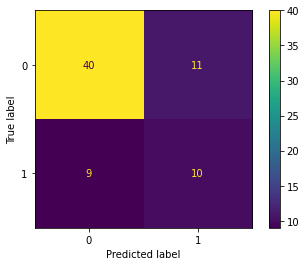

In [33]:
# Asssess the accuracy of your model and explain your key findings
# Generate confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f} %".format(score*100))
print("Weighted ROC AUC accuracy: {:.2f} %".format(roc_auc_score(y_test, y_pred, average='weighted')*100))
print("Confusion matrix:")
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Apply k-fold Cross Validation
# from sklearn.model_selection import cross_val_score
# from numpy import ravel
# accuracies = cross_val_score(estimator = classifier, X = x_train_processed, y = ravel(y_train.values), scoring = 'roc_auc_ovo', cv = 10)
# print("K-fold cross validation results")
# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Visualise the loss and accuracy for each epoch

In [34]:
# list all data in history
print(my_model.model.history.keys())
# summarize history for accuracy
plt.plot(my_model.model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

AttributeError: ignored

In [ ]:
# summarize history for loss
plt.plot(my_model.model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model is approx 65-70% accurate at predicting whether cancer recurrence will occur.**

**Crucially, the proportion of False Negatives is low (<15%). In cancer diagnosis these are the outcomes that we want to minimise. False Positives, whilst undesirable, will likely lead to further diagnostic testing before it is realised that cancer is not present.**

### Unit tests:

###Checking training and test data for null values. This will work for both pd dataframes and np arrays, and ensures no null values exist.

In [ ]:
def test_no_nulls(data):
    """ Assert no null values within pd dataframe or np array """
    
    # if data is numpy array, handle accordingly
    if isinstance(data, (np.ndarray)):
        assert not np.isnan(np.min(data))
    
    # if not np array, assume data is pandas dataframe
    else:
        assert data.isna().sum().sum() == 0

In [ ]:
# run null data unit test on both training and test data
test_no_nulls(x_train_processed)
test_no_nulls(x_test_processed)